In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
import os
import matplotlib.pyplot as plt

In [ ]:
# add and set directory of the repository here
dire = '/home/mongardi/GIS_prior_knowledge'

In [2]:
import sys
sys.path.append(os.path.join(dire, "src"))
from run_experiments import *
from utils.utils import * 
from get_wgis_scores import*

In [3]:
dire = os.path.join(dire,'results/gis_sensitibity_analysis/rounds')
files = os.listdir(dire)
files = [x for x in files if 'rounds' in x]
print(files)
files.sort()
print(files)
print(len(files))

['rounds_acc_mrf4.0.txt', 'rounds_features_METTL8_4.txt', 'rounds_features_METTL8_3.txt', 'rounds_PIK3C2G_1.txt', 'rounds_features_PCBP1_1.txt', 'rounds_NCKAP1_st.txt', 'rounds_mrf4.0.txt', 'rounds_acc_mrf5.0.txt', 'rounds_PCBP1_4.txt', 'rounds_features_PIK3C2G_3.txt', 'rounds_PCBP1_3.txt', 'rounds_MT1F_2.txt', 'rounds_features_PIK3C2G_4.txt', 'rounds_features_NCKAP1_2.txt', 'rounds_NCKAP1_1.txt', 'rounds_mrf5.0.txt', 'rounds_METTL8_st.txt', 'rounds_features_MT1F_1.txt', 'rounds_METTL8_1.txt', 'rounds_n_mrf4.0.txt', 'rounds_MT1F_st.txt', 'rounds_features_METTL8_2.txt', 'rounds_features_PCBP1_st.txt', 'rounds_features_PIK3C2G_st.txt', 'rounds_n_mrf5.0.txt', 'rounds_features_NCKAP1_4.txt', 'rounds_features_NCKAP1_3.txt', 'rounds_MT1F_3.txt', 'rounds_PCBP1_2.txt', 'rounds_MT1F_4.txt', 'rounds_features_PIK3C2G_2.txt', 'rounds_NCKAP1_3.txt', 'rounds_n_mrf2.0.txt', 'rounds_NCKAP1_4.txt', 'rounds_features_NCKAP1_st.txt', 'rounds_features_PIK3C2G_1.txt', 'rounds_PCBP1_1.txt', 'rounds_features_

In [17]:
dire_results =  os.path.join(dire,'results/gis_sensitibity_analysis')
dire_1 = os.path.join(dire,'/data/prior_knowledge/genes_and_ids_all_red.csv')
dire_2 = os.path.join(dire,'/data/prior_knowledge/gene_scores_norm_go.csv')

# Case 1

In [4]:
notin = [x for x in files if 'features' in x or 'mrf' in x]
files_1 = [x for x in files if x not in notin]
'''files_1 = [ 'rounds_CDH19_st.txt',
 'rounds_CDH19_1.txt',
 'rounds_CDH19_2.txt',
 'rounds_CDH19_3.txt',
 'rounds_CDH19_4.txt',
 'rounds_HIVEP1_st.txt',
 'rounds_HIVEP1_1.txt',
 'rounds_HIVEP1_2.txt',
 'rounds_HIVEP1_3.txt',
 'rounds_HIVEP1_4.txt',
 'rounds_MT1F_st.txt',
 'rounds_MT1F_1.txt',
 'rounds_MT1F_2.txt',
 'rounds_MT1F_3.txt',
 'rounds_MT1F_4.txt',
 'rounds_PIK3C2G_st.txt',
 'rounds_PIK3C2G_1.txt',
 'rounds_PIK3C2G_2.txt',
 'rounds_PIK3C2G_3.txt',
 'rounds_PIK3C2G_4.txt',
 'rounds_TRMT10C_st.txt',
 'rounds_TRMT10C_1.txt',
 'rounds_TRMT10C_2.txt',
 'rounds_TRMT10C_3.txt',
 'rounds_TRMT10C_4.txt']'''
files_1 = ['rounds_METTL8_st.txt',
           'rounds_METTL8_1.txt',
            'rounds_METTL8_2.txt', 
            'rounds_METTL8_3.txt',
            'rounds_METTL8_4.txt',
            'rounds_MT1F_st.txt', 
            'rounds_MT1F_1.txt',
            'rounds_MT1F_2.txt', 
            'rounds_MT1F_3.txt', 
            'rounds_MT1F_4.txt', 
            'rounds_NCKAP1_st.txt',
            'rounds_NCKAP1_1.txt',
            'rounds_NCKAP1_2.txt', 
            'rounds_NCKAP1_3.txt', 
            'rounds_NCKAP1_4.txt', 
            'rounds_PCBP1_st.txt', 
            'rounds_PCBP1_1.txt',
            'rounds_PCBP1_2.txt', 
            'rounds_PCBP1_3.txt', 
            'rounds_PCBP1_4.txt', 
            'rounds_PIK3C2G_st.txt',
            'rounds_PIK3C2G_1.txt', 
            'rounds_PIK3C2G_2.txt', 
            'rounds_PIK3C2G_3.txt', 
            'rounds_PIK3C2G_4.txt']


In [5]:
n_run = 100
n_lambdas = 4
n_copies = 11
def get_counts(files, n_run, n_lambdas, n_copies):

    all_counts = np.zeros((len(files), n_copies, n_lambdas))
    for f, file in enumerate(files):
        print(file)
        dct = load_dictionary(os.path.join(dire, file))
        
        counts = []
        for i, d in enumerate(dct):
            #print(len(dct[d])), 400
            counts.append([1.0 if abs(x) > 0 else 0 for x in dct[d]])
            #print(len(counts[i]))
            for j in range(n_lambdas):
                s = 0
                for k in range(0, n_lambdas*n_run, n_lambdas):
                    s += counts[i][j+k]
                
                all_counts[f][i][j] = s
    
    return all_counts

In [6]:
all_counts = get_counts(files_1, n_run, n_lambdas, n_copies)

rounds_METTL8_st.txt
rounds_METTL8_1.txt
rounds_METTL8_2.txt
rounds_METTL8_3.txt
rounds_METTL8_4.txt
rounds_MT1F_st.txt
rounds_MT1F_1.txt
rounds_MT1F_2.txt
rounds_MT1F_3.txt
rounds_MT1F_4.txt
rounds_NCKAP1_st.txt
rounds_NCKAP1_1.txt
rounds_NCKAP1_2.txt
rounds_NCKAP1_3.txt
rounds_NCKAP1_4.txt
rounds_PCBP1_st.txt
rounds_PCBP1_1.txt
rounds_PCBP1_2.txt
rounds_PCBP1_3.txt
rounds_PCBP1_4.txt
rounds_PIK3C2G_st.txt
rounds_PIK3C2G_1.txt
rounds_PIK3C2G_2.txt
rounds_PIK3C2G_3.txt
rounds_PIK3C2G_4.txt


In [7]:
all_counts.shape

(25, 11, 4)

In [8]:
# info
files_info = [x for x in files if 'features' in x]
'''files_info = [ 'rounds_features_CDH19_st.txt',
 'rounds_features_CDH19_1.txt',
 'rounds_features_CDH19_2.txt',
 'rounds_features_CDH19_3.txt',
 'rounds_features_CDH19_4.txt',
 'rounds_features_HIVEP1_st.txt',
 'rounds_features_HIVEP1_1.txt',
 'rounds_features_HIVEP1_2.txt',
 'rounds_features_HIVEP1_3.txt',
 'rounds_features_HIVEP1_4.txt',
 'rounds_features_MT1F_st.txt',
 'rounds_features_MT1F_1.txt',
 'rounds_features_MT1F_2.txt',
 'rounds_features_MT1F_3.txt',
 'rounds_features_MT1F_4.txt',
 'rounds_features_PIK3C2G_st.txt',
 'rounds_features_PIK3C2G_1.txt',
 'rounds_features_PIK3C2G_2.txt',
 'rounds_features_PIK3C2G_3.txt',
 'rounds_features_PIK3C2G_4.txt',
 'rounds_features_TRMT10C_st.txt',
 'rounds_features_TRMT10C_1.txt',
 'rounds_features_TRMT10C_2.txt',
 'rounds_features_TRMT10C_3.txt',
 'rounds_features_TRMT10C_4.txt']'''
files_info = ['rounds_features_METTL8_st.txt',
           'rounds_features_METTL8_1.txt',
            'rounds_features_METTL8_2.txt', 
            'rounds_features_METTL8_3.txt',
            'rounds_features_METTL8_4.txt',
            'rounds_features_MT1F_st.txt', 
            'rounds_features_MT1F_1.txt',
            'rounds_features_MT1F_2.txt', 
            'rounds_features_MT1F_3.txt', 
            'rounds_features_MT1F_4.txt', 
            'rounds_features_NCKAP1_st.txt',
            'rounds_features_NCKAP1_1.txt',
            'rounds_features_NCKAP1_2.txt', 
            'rounds_features_NCKAP1_3.txt', 
            'rounds_features_NCKAP1_4.txt', 
            'rounds_features_PCBP1_st.txt', 
            'rounds_features_PCBP1_1.txt',
            'rounds_features_PCBP1_2.txt', 
            'rounds_features_PCBP1_3.txt', 
            'rounds_features_PCBP1_4.txt',  
            'rounds_features_PIK3C2G_st.txt',
            'rounds_features_PIK3C2G_1.txt', 
            'rounds_features_PIK3C2G_2.txt', 
            'rounds_features_PIK3C2G_3.txt', 
            'rounds_features_PIK3C2G_4.txt']

In [9]:
n_run = 100
n_lambdas = 4
def get_stats(files, n_run, n_lambdas):

    all_counts_f = pd.DataFrame(np.zeros((100, 8)))
    all_counts_f.columns = ['Feature', 'GIS', 'lambda', 'mean', 'std', 'median', 'max', 'min']
    all_counts_c = pd.DataFrame(np.zeros((100, 8)))
    all_counts_c.columns = ['Feature', 'GIS', 'lambda', 'mean', 'std', 'median', 'max', 'min']
    exps = ['NO GIS', 'GIS 1', 'GIS 2', 'GIS 3', 'GIS 4']
    lambdas = ['0.2', '0.25', '0.5', '1.0'] 
    
    for f, file in enumerate(files):
        print(file)
        dct = load_dictionary(os.path.join(dire, file))
        name = file.split('_')[2]
        
        counts = []
        for i, d in enumerate(dct):
            
            for j in range(n_lambdas):
                s = []
                for k in range(0, n_lambdas*n_run, n_lambdas):
                    s.append(dct[d][j+k])

                    if i == 0:
                        all_counts_f.iloc[f*4 + j] = [name, exps[int(f%5)], lambdas[j], np.mean(s), np.std(s), 
                                                      np.median(s), np.max(s), np.min(s)]

             
                    elif i == 1:
                        all_counts_c.iloc[f*4 + j] = [name, exps[int(f%5)], lambdas[j], np.mean(s), np.std(s), 
                                                      np.median(s), np.max(s), np.min(s)]

    return all_counts_f, all_counts_c

In [10]:
df_f, df_c = get_stats(files_info, n_run, n_lambdas)

rounds_features_METTL8_st.txt
rounds_features_METTL8_1.txt
rounds_features_METTL8_2.txt
rounds_features_METTL8_3.txt
rounds_features_METTL8_4.txt
rounds_features_MT1F_st.txt
rounds_features_MT1F_1.txt
rounds_features_MT1F_2.txt
rounds_features_MT1F_3.txt
rounds_features_MT1F_4.txt
rounds_features_NCKAP1_st.txt
rounds_features_NCKAP1_1.txt
rounds_features_NCKAP1_2.txt
rounds_features_NCKAP1_3.txt
rounds_features_NCKAP1_4.txt
rounds_features_PCBP1_st.txt
rounds_features_PCBP1_1.txt
rounds_features_PCBP1_2.txt
rounds_features_PCBP1_3.txt
rounds_features_PCBP1_4.txt
rounds_features_PIK3C2G_st.txt
rounds_features_PIK3C2G_1.txt
rounds_features_PIK3C2G_2.txt
rounds_features_PIK3C2G_3.txt
rounds_features_PIK3C2G_4.txt


In [12]:
df_c.head(50)

,Feature,GIS,lambda,mean,std,median,max,min
0,METTL8,NO GIS,0.2,0.00,0.000000,0.0,0.0,0.0
1,METTL8,NO GIS,0.25,0.00,0.000000,0.0,0.0,0.0
2,METTL8,NO GIS,0.5,0.00,0.000000,0.0,0.0,0.0
3,METTL8,NO GIS,1.0,0.00,0.000000,0.0,0.0,0.0
4,METTL8,GIS 1,0.2,0.00,0.000000,0.0,0.0,0.0
5,METTL8,GIS 1,0.25,0.00,0.000000,0.0,0.0,0.0
6,METTL8,GIS 1,0.5,0.00,0.000000,0.0,0.0,0.0
7,METTL8,GIS 1,1.0,0.00,0.000000,0.0,0.0,0.0
8,METTL8,GIS 2,0.2,0.00,0.000000,0.0,0.0,0.0
9,METTL8,GIS 2,0.25,0.00,0.000000,0.0,0.0,0.0


In [13]:
df_c.tail(50)

,Feature,GIS,lambda,mean,std,median,max,min
50,NCKAP1,GIS 2,0.5,0.00,0.000000,0.0,0.0,0.0
51,NCKAP1,GIS 2,1.0,0.00,0.000000,0.0,0.0,0.0
52,NCKAP1,GIS 3,0.2,0.93,0.255147,1.0,1.0,0.0
53,NCKAP1,GIS 3,0.25,0.00,0.000000,0.0,0.0,0.0
54,NCKAP1,GIS 3,0.5,0.00,0.000000,0.0,0.0,0.0
55,NCKAP1,GIS 3,1.0,0.00,0.000000,0.0,0.0,0.0
56,NCKAP1,GIS 4,0.2,4.00,0.000000,4.0,4.0,4.0
57,NCKAP1,GIS 4,0.25,3.12,0.324962,3.0,4.0,3.0
58,NCKAP1,GIS 4,0.5,2.00,0.000000,2.0,2.0,2.0
59,NCKAP1,GIS 4,1.0,1.01,0.099499,1.0,2.0,1.0


---------------------- λ = 0.2 ----------------------
---------------------- λ = 0.25 ----------------------
---------------------- λ = 0.5 ----------------------
---------------------- λ = 1.0 ----------------------
---------------------- λ = 0.2 ----------------------
---------------------- λ = 0.25 ----------------------
---------------------- λ = 0.5 ----------------------
---------------------- λ = 1.0 ----------------------
---------------------- λ = 0.2 ----------------------
---------------------- λ = 0.25 ----------------------
---------------------- λ = 0.5 ----------------------
---------------------- λ = 1.0 ----------------------
---------------------- λ = 0.2 ----------------------
---------------------- λ = 0.25 ----------------------
---------------------- λ = 0.5 ----------------------
---------------------- λ = 1.0 ----------------------
---------------------- λ = 0.2 ----------------------
---------------------- λ = 0.25 ----------------------
---------------------- 

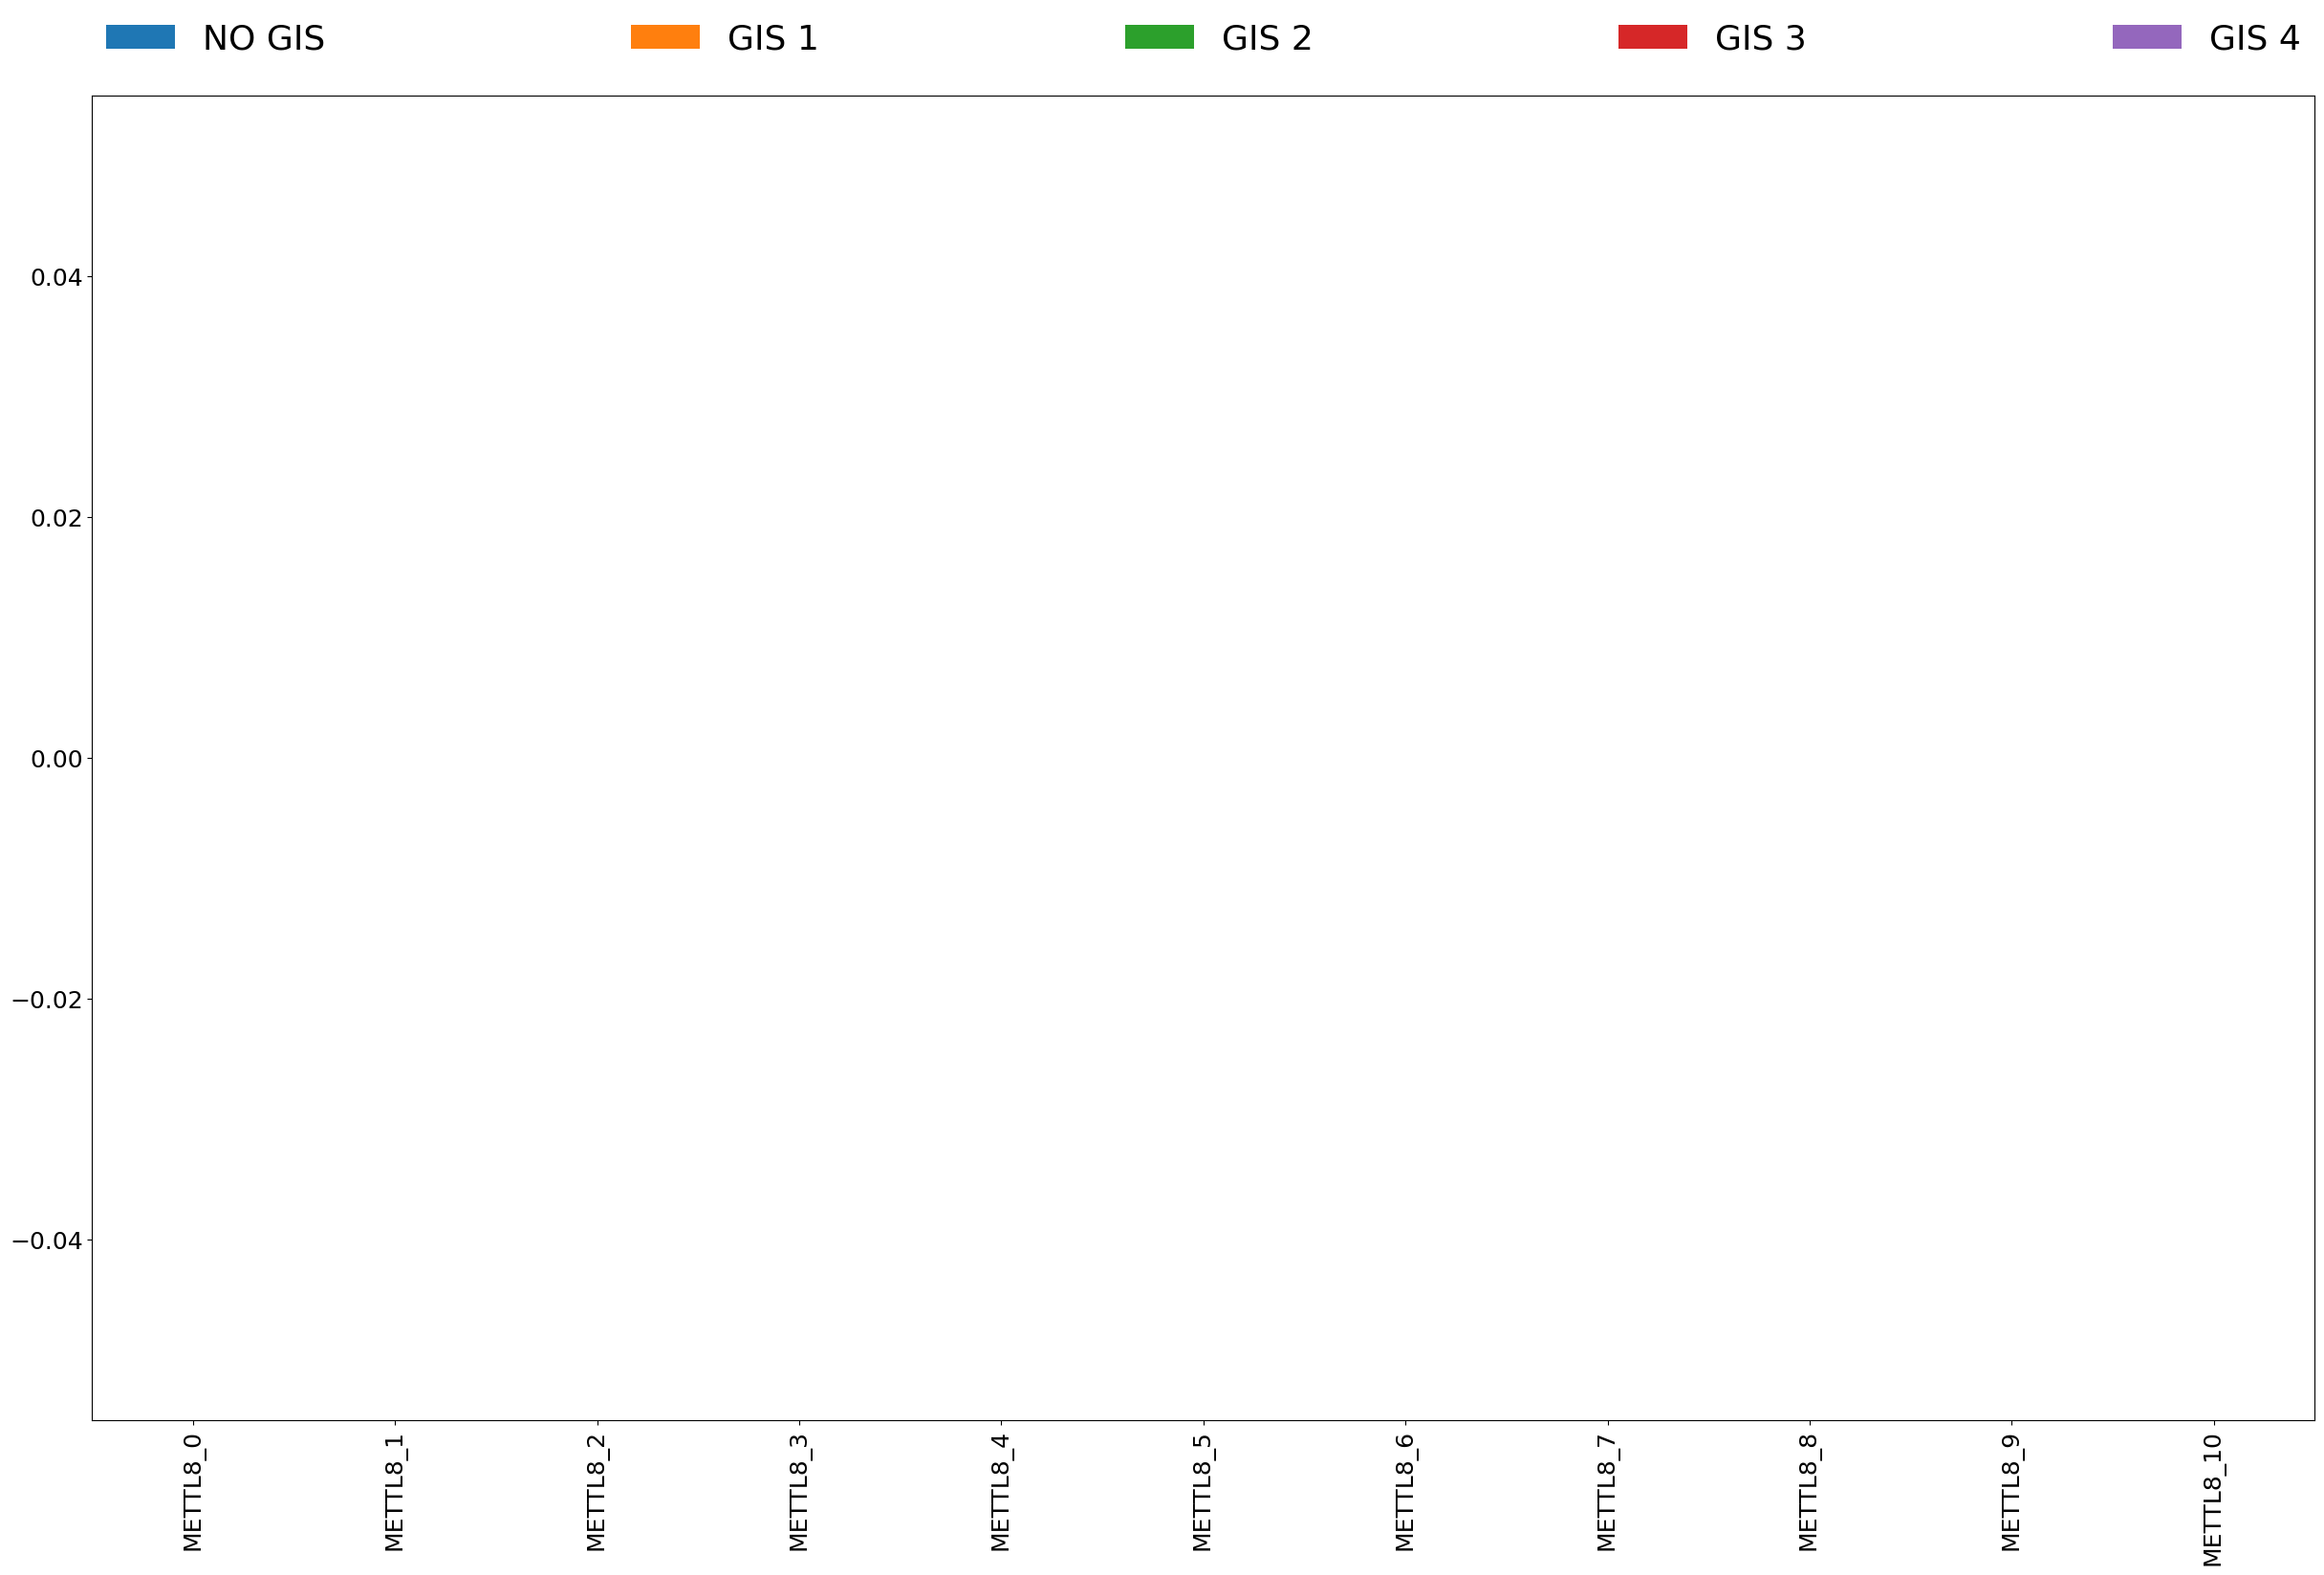

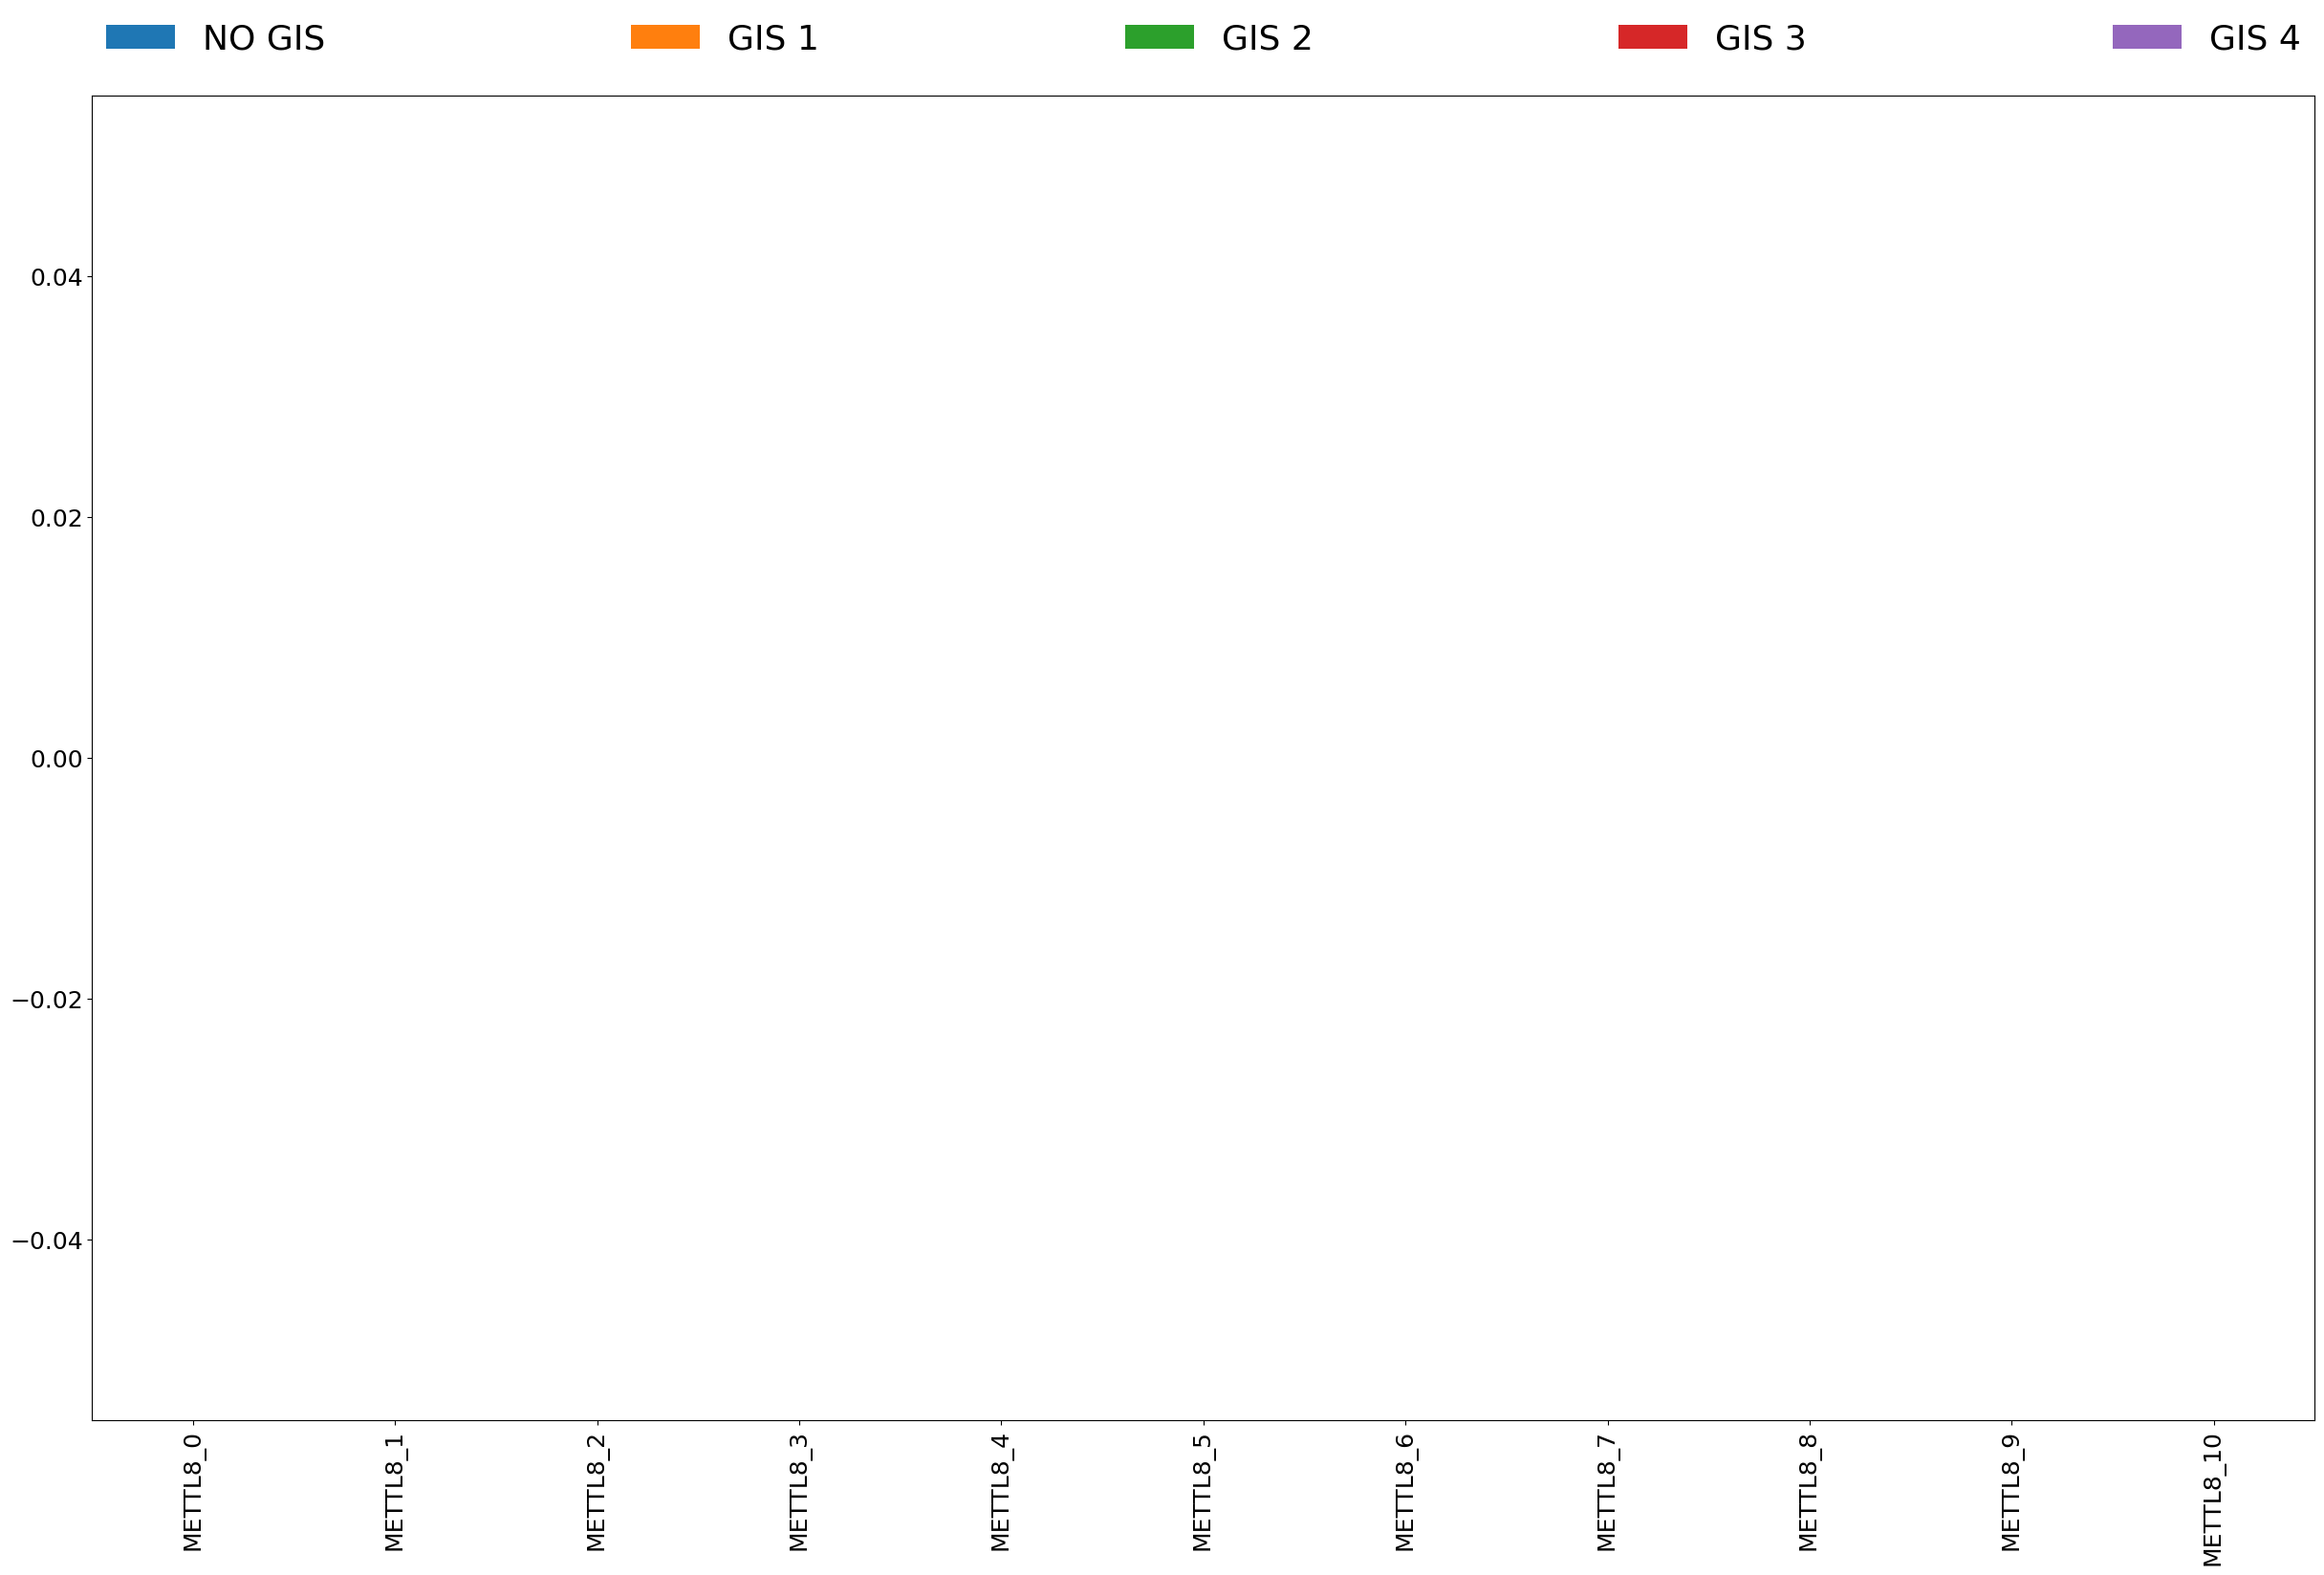

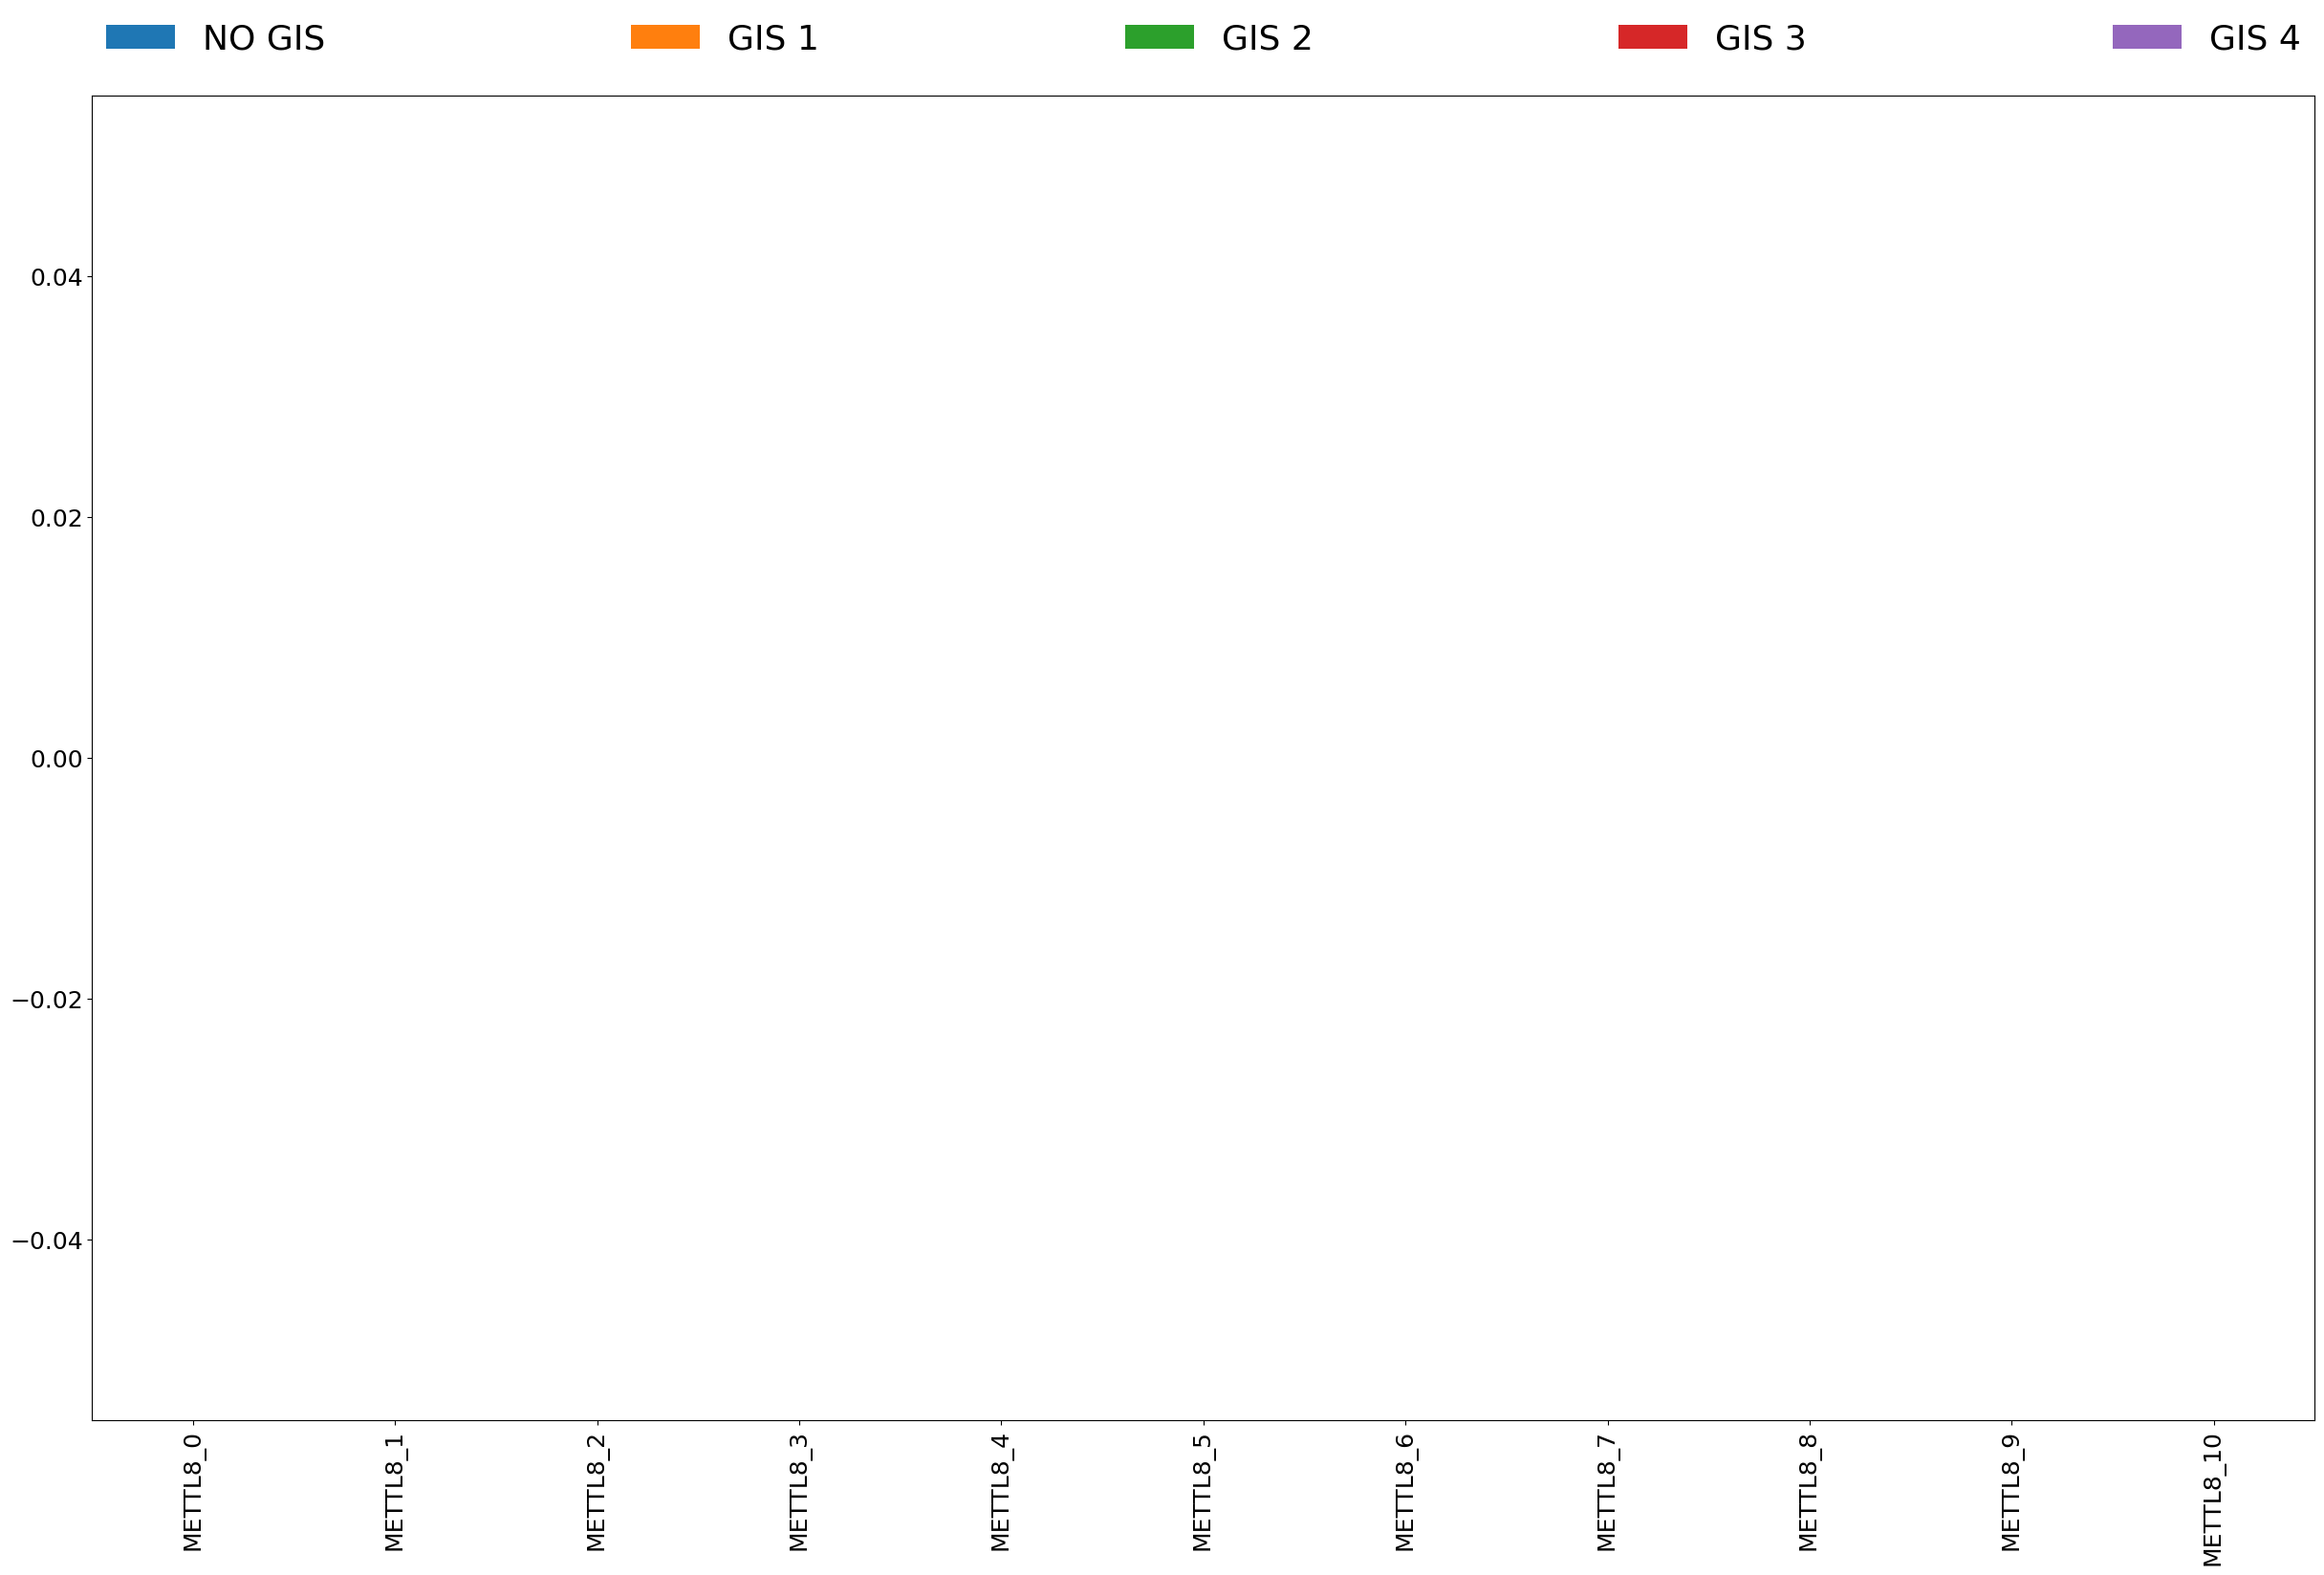

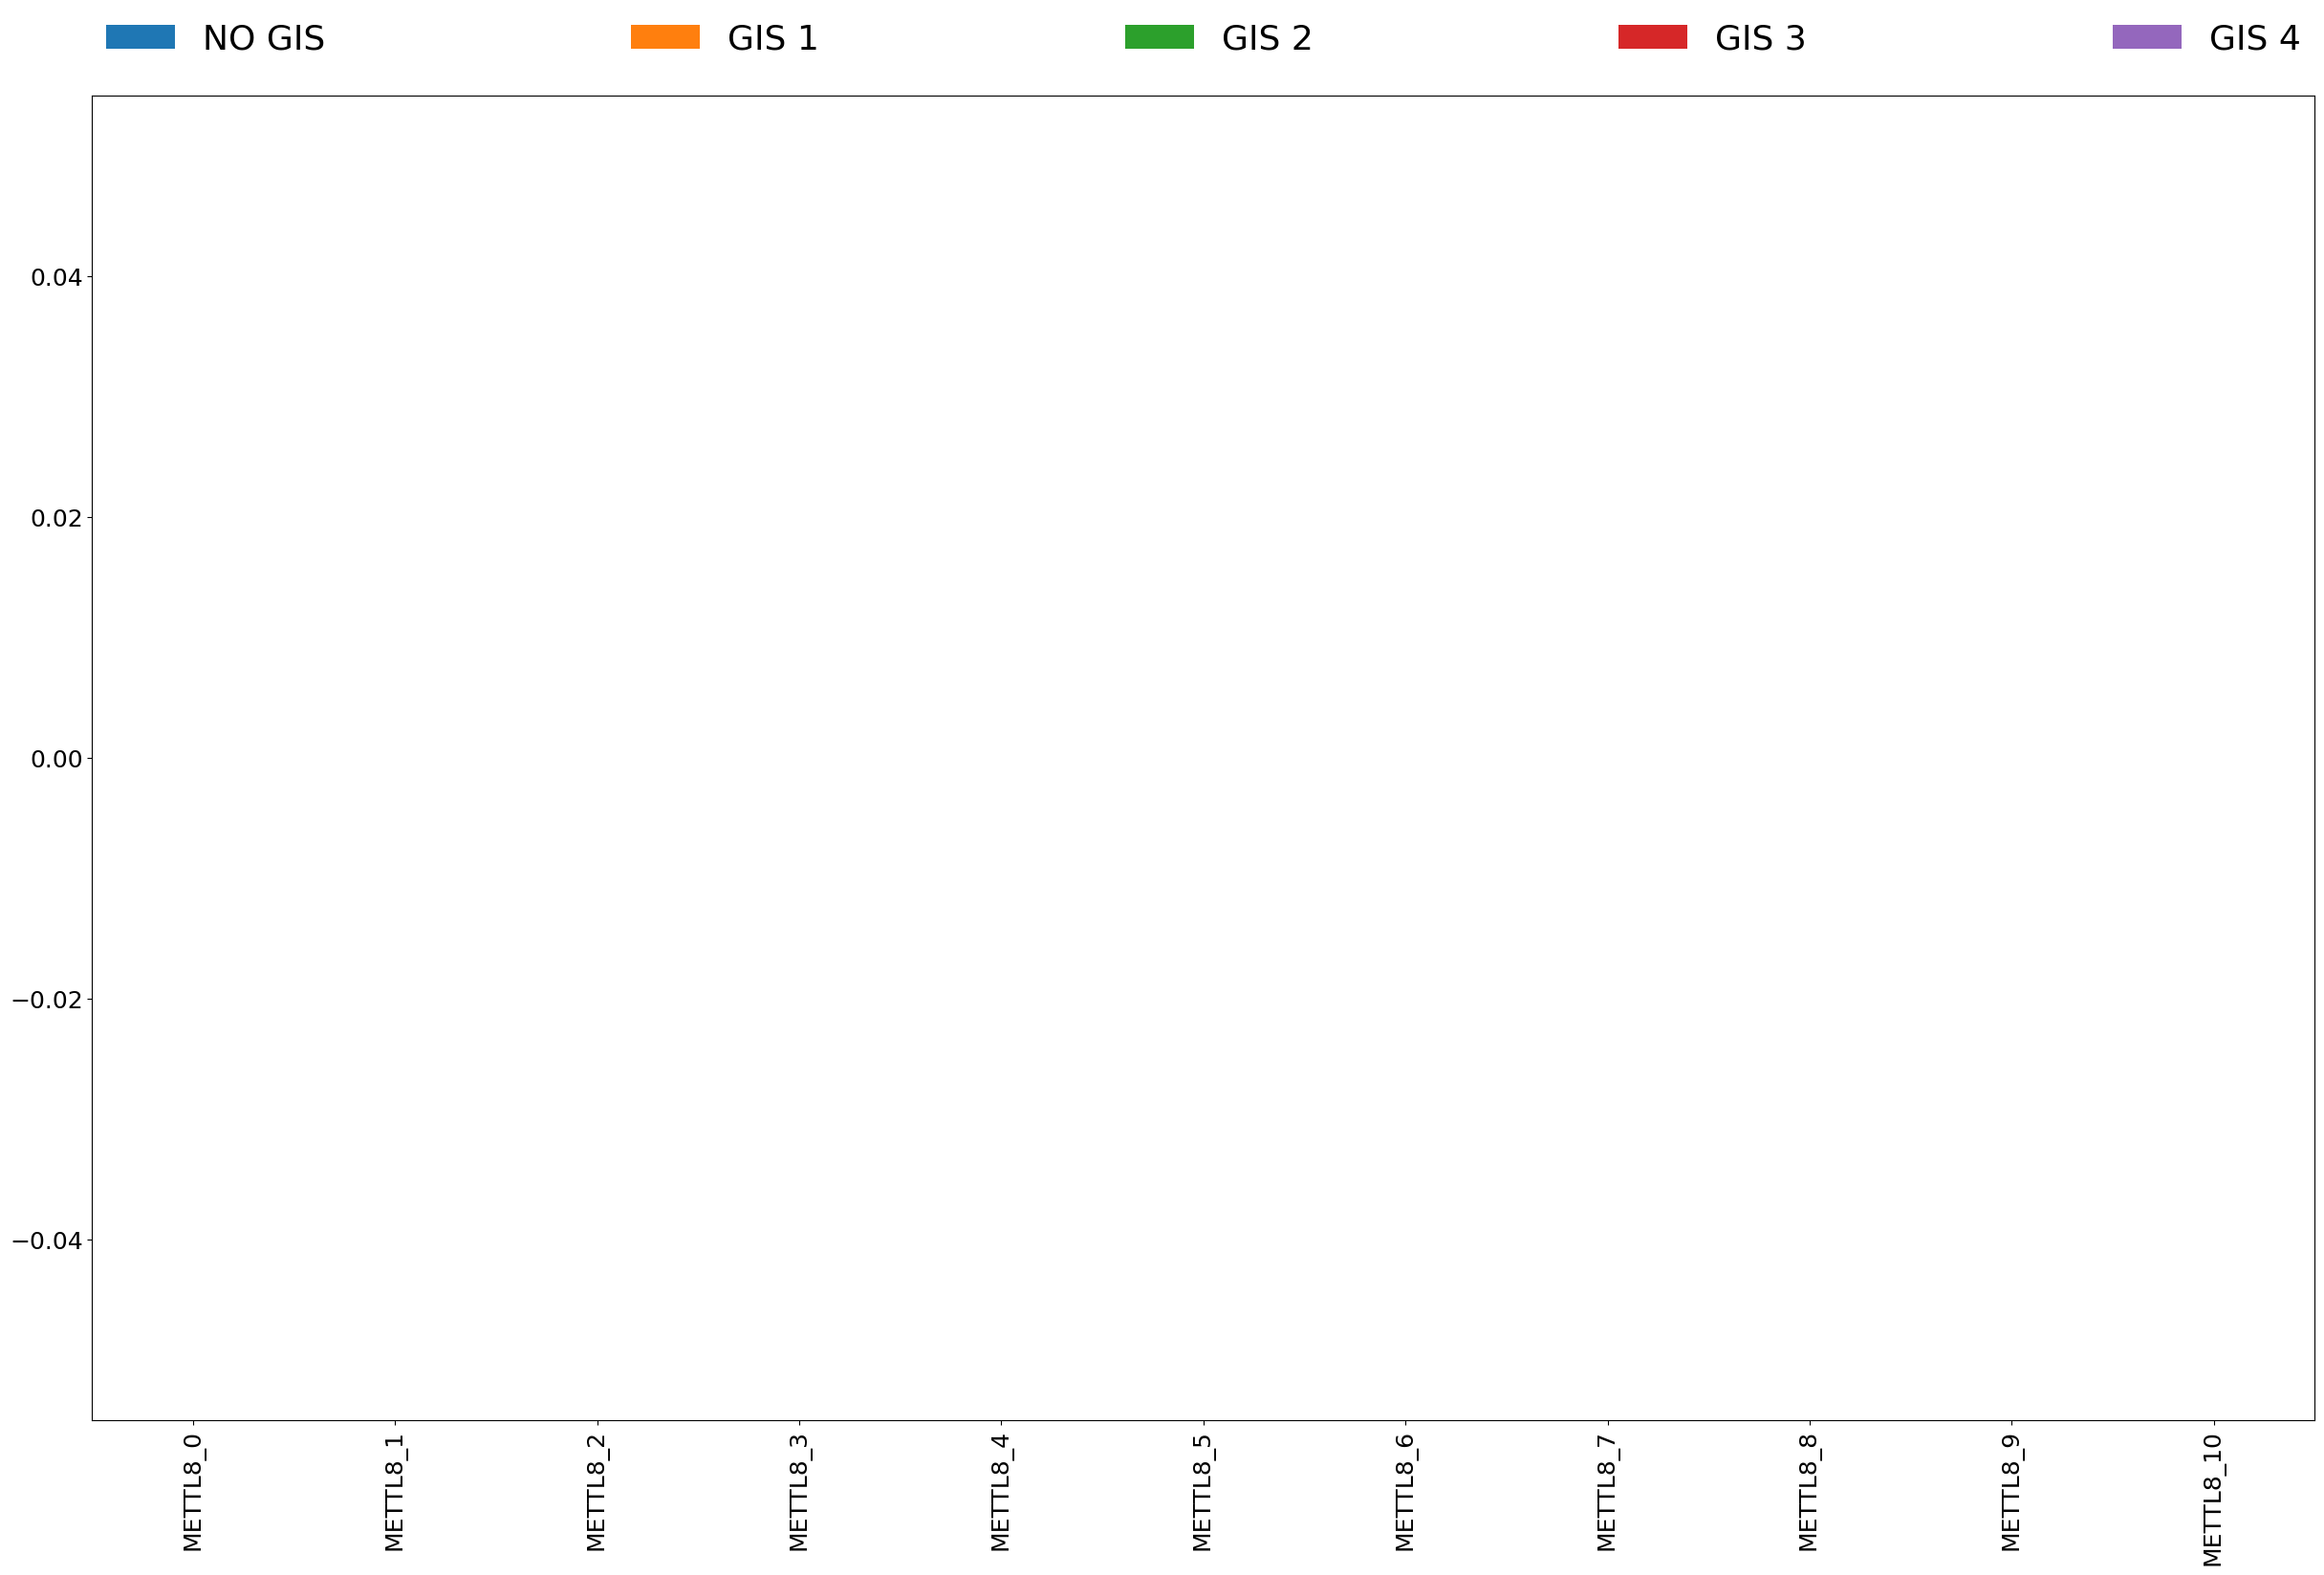

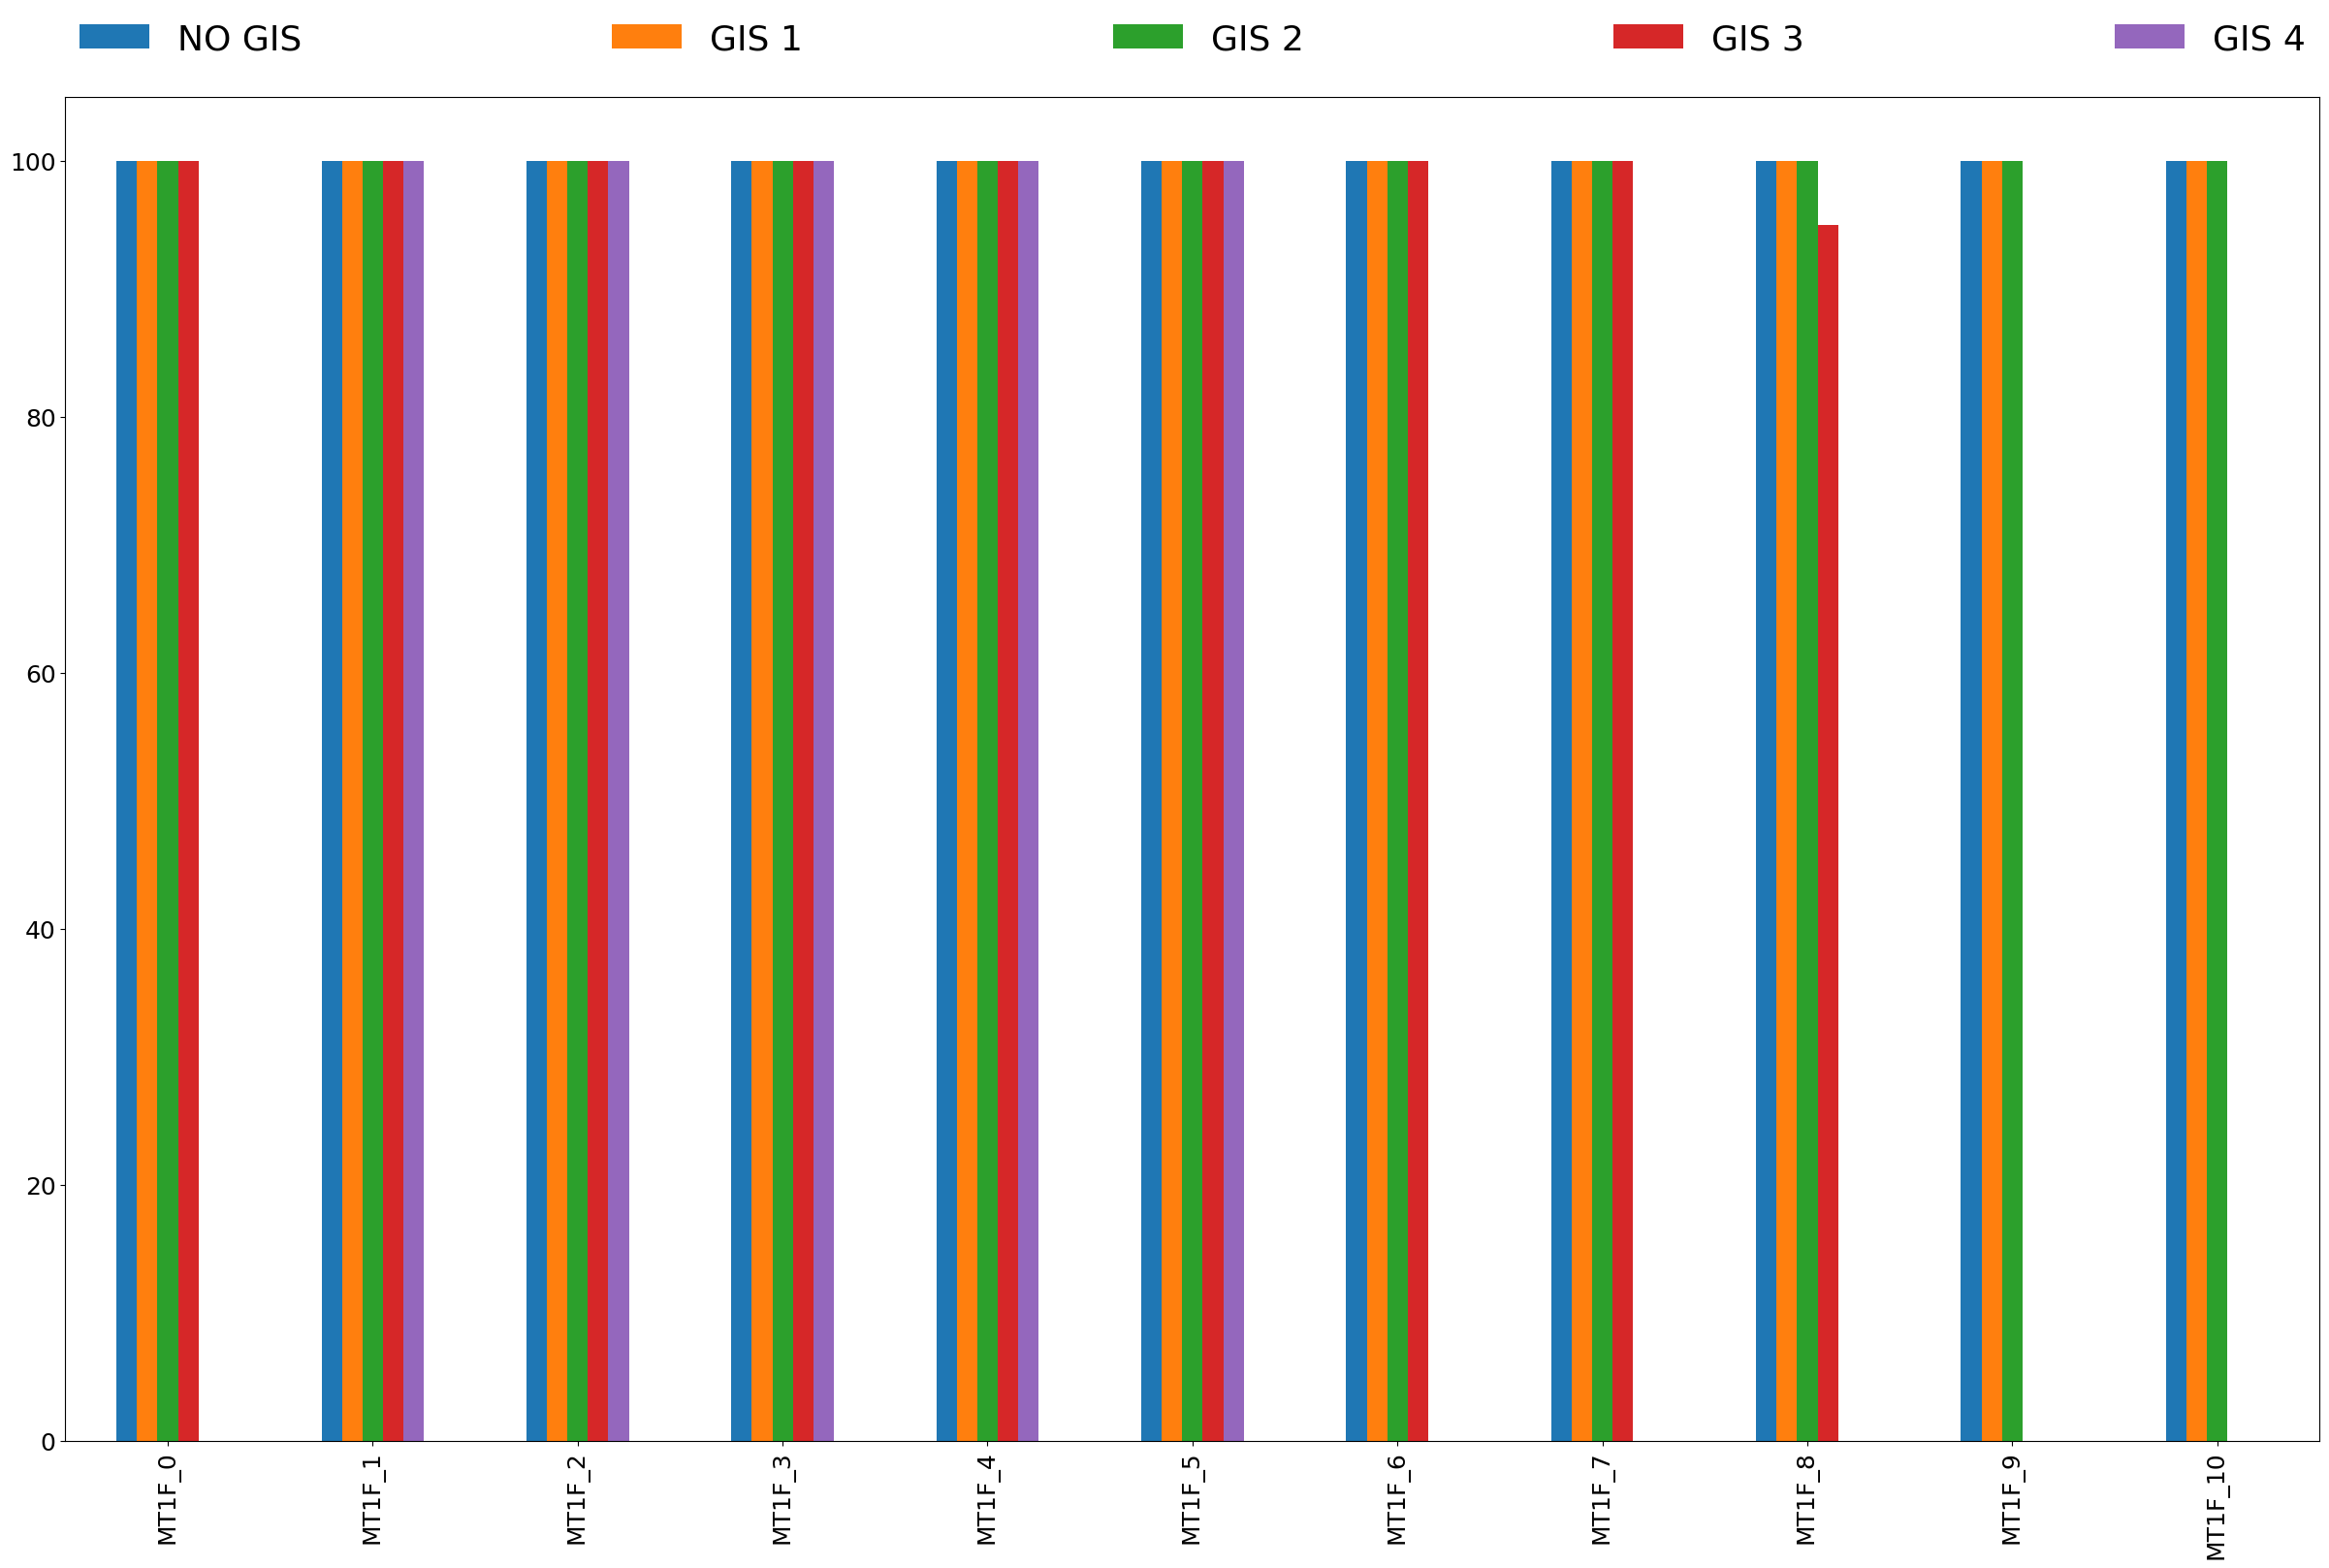

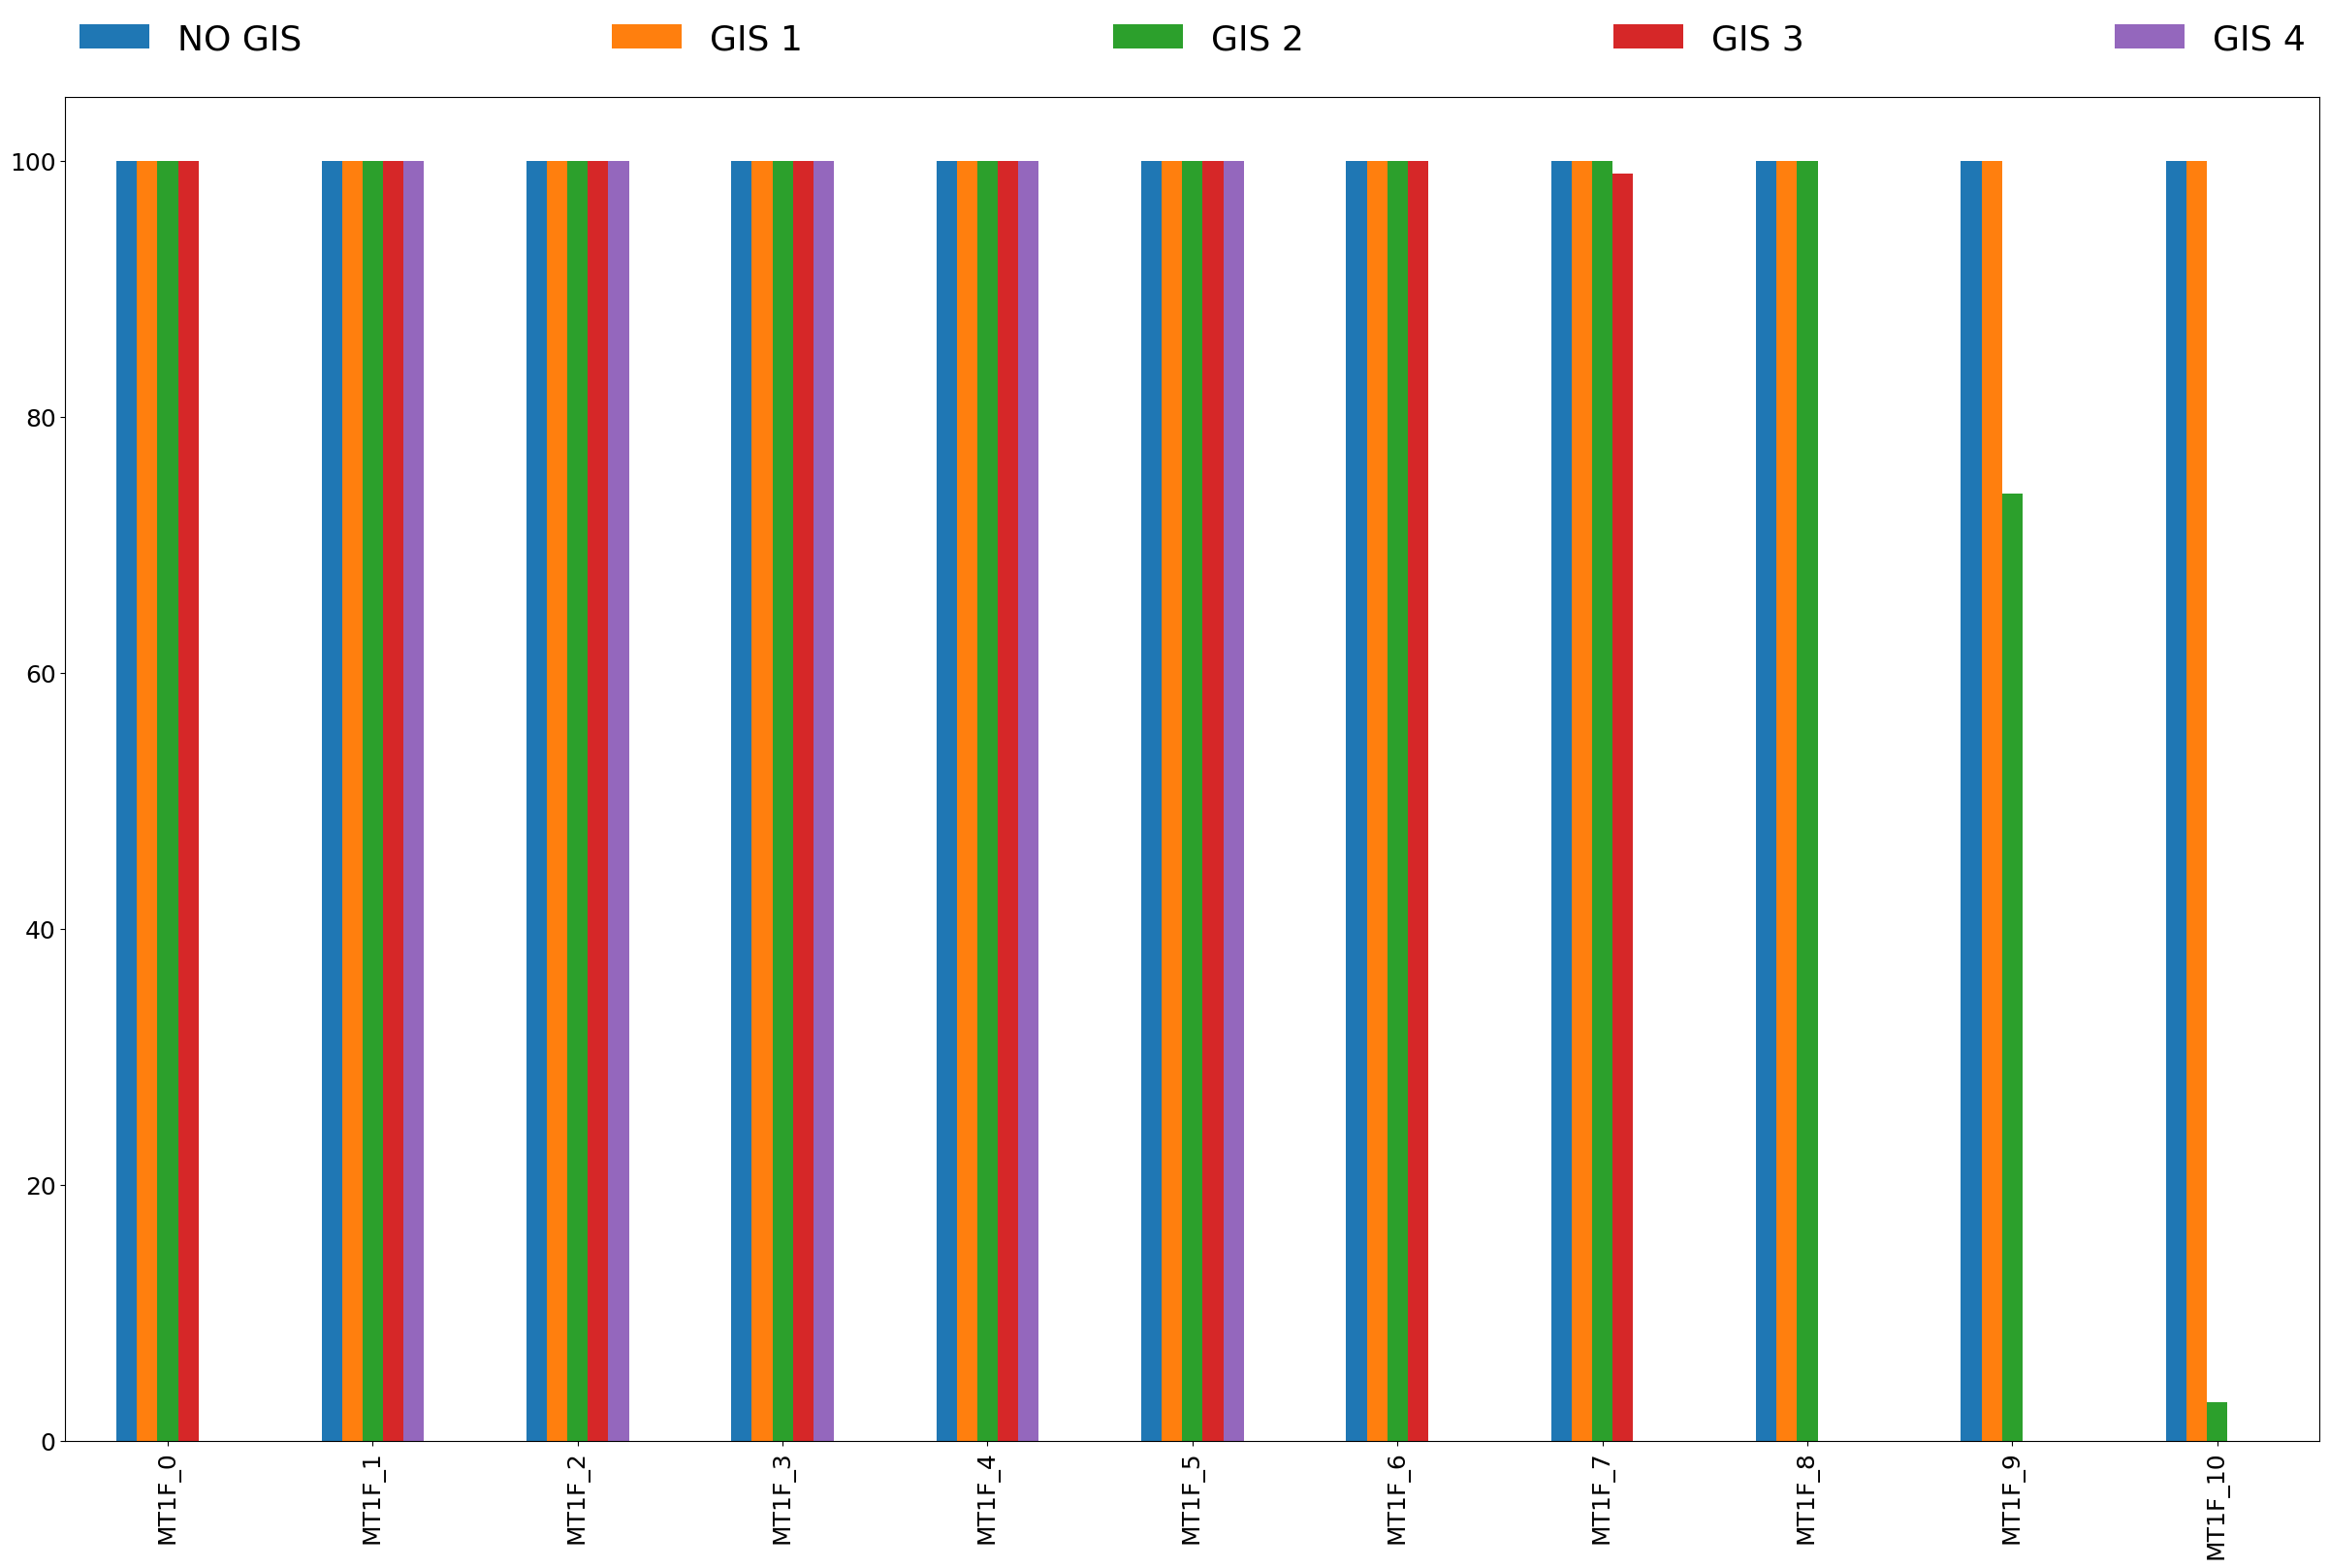

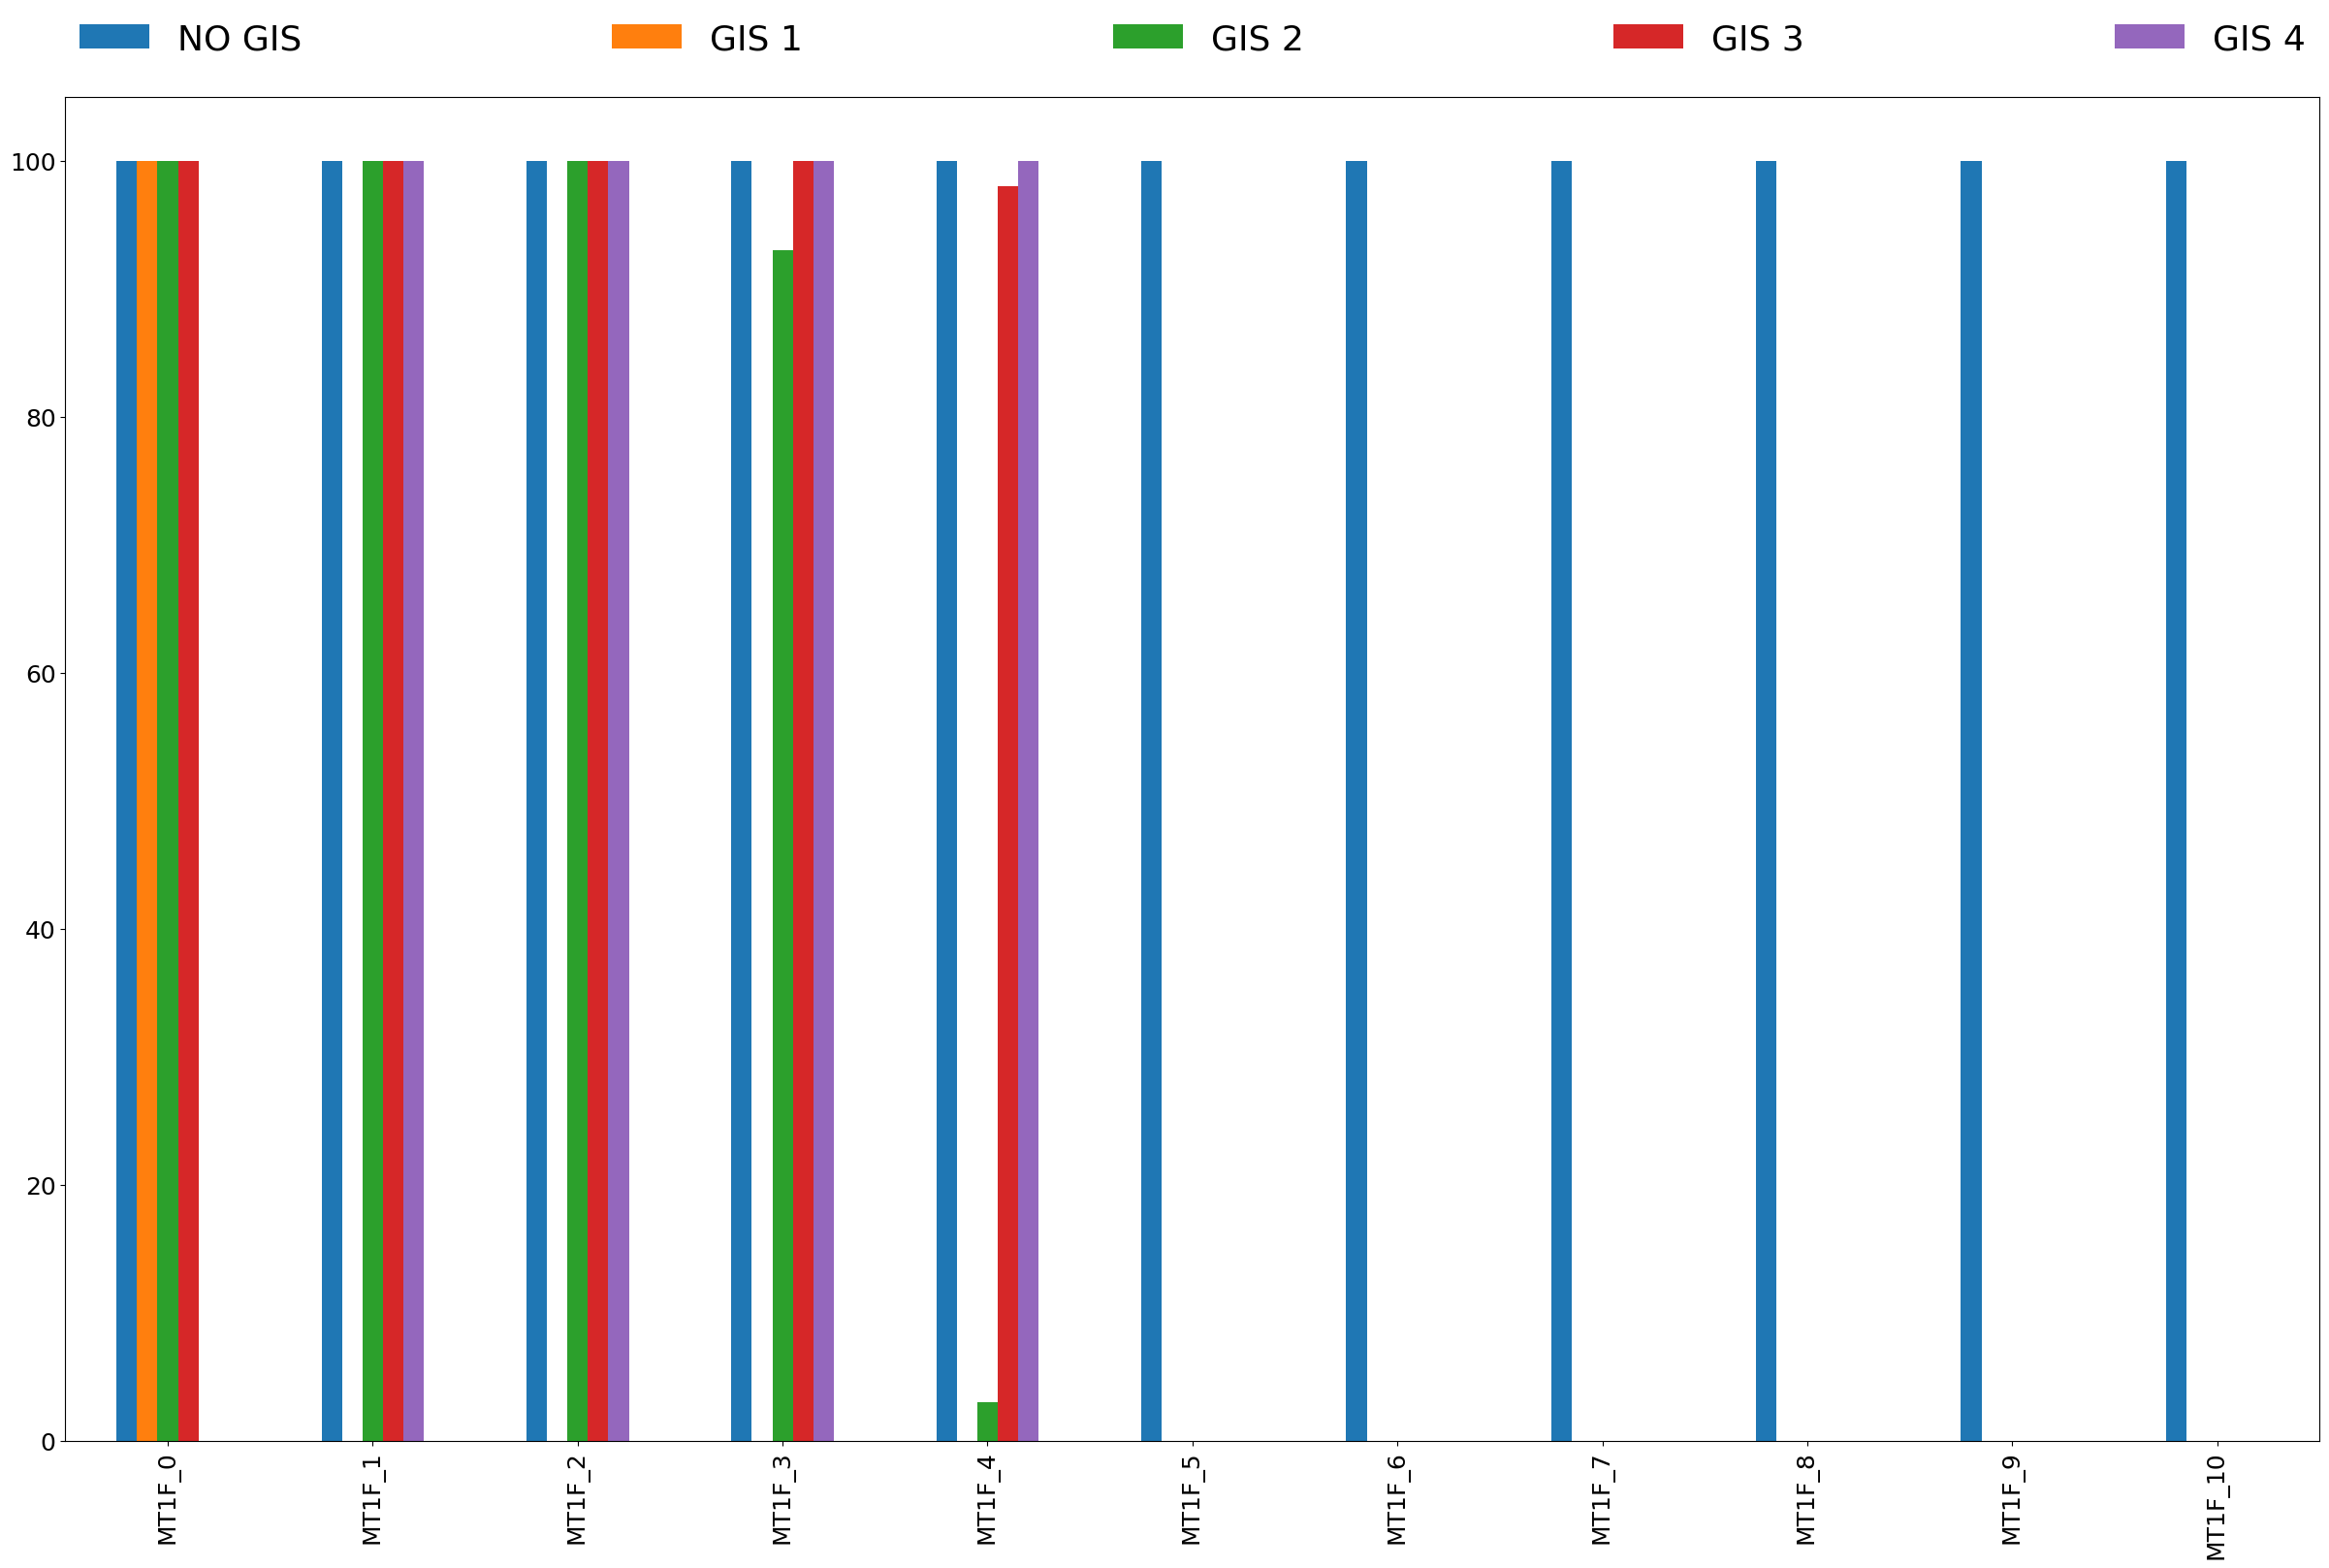

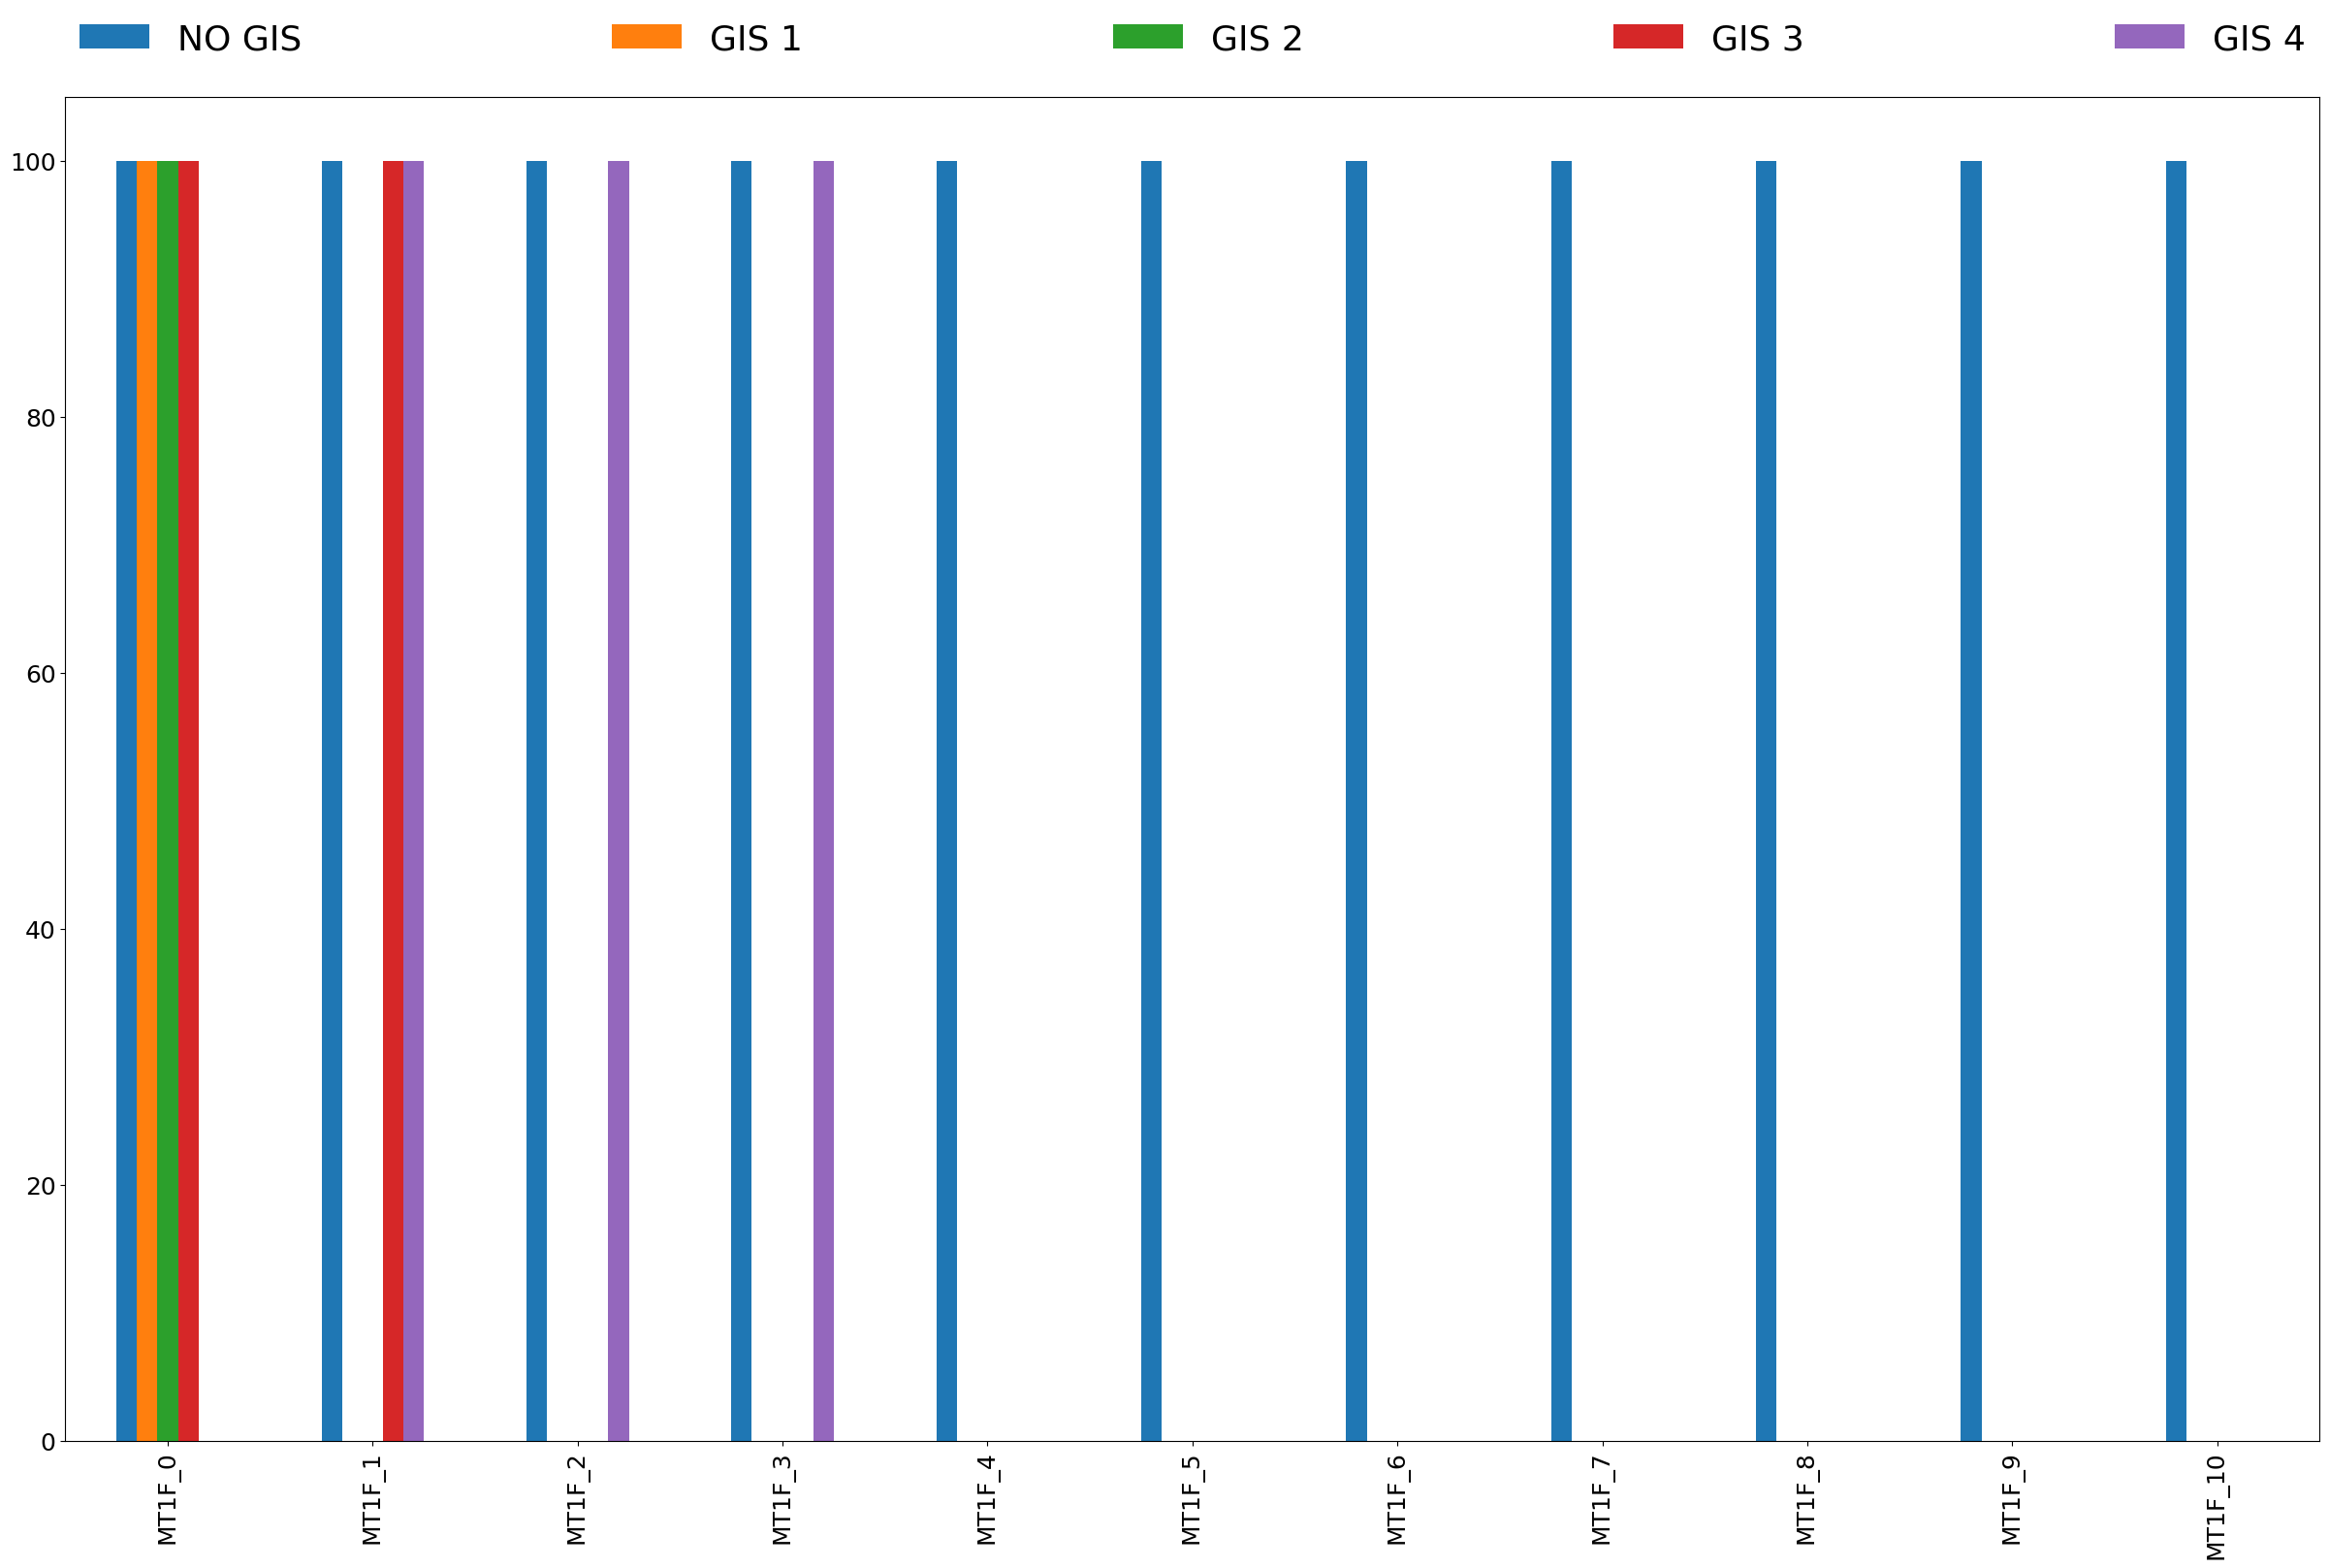

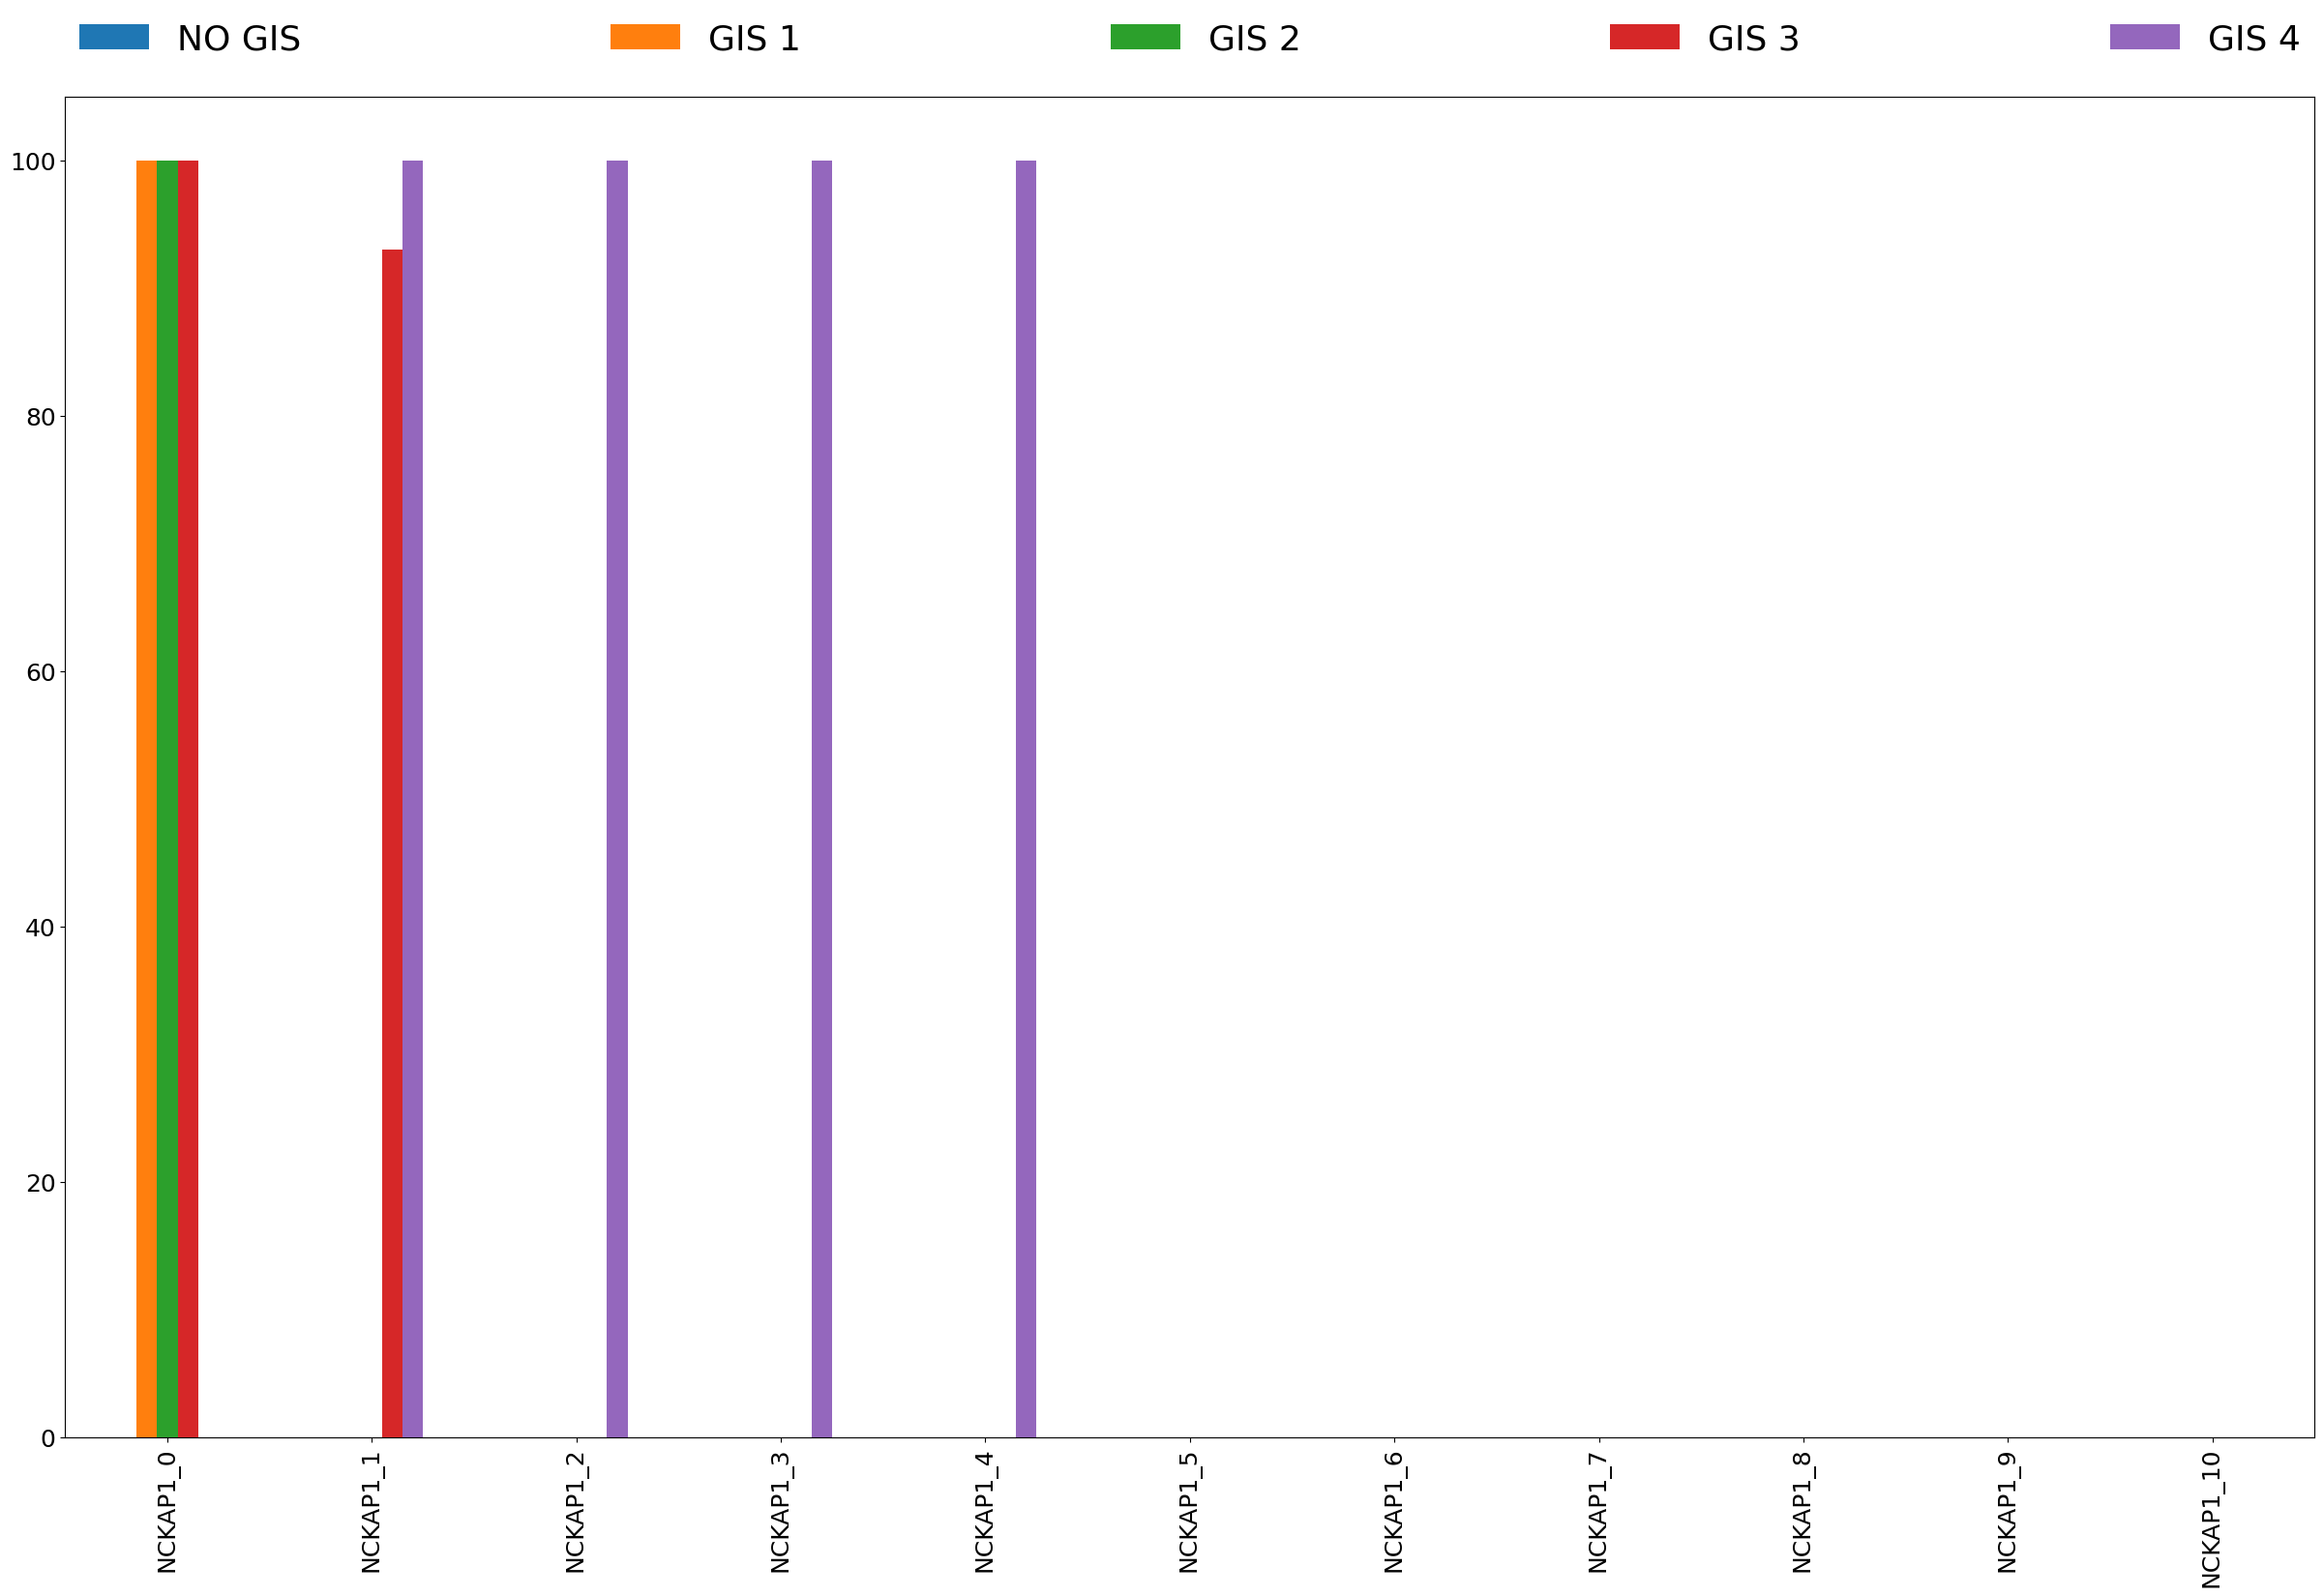

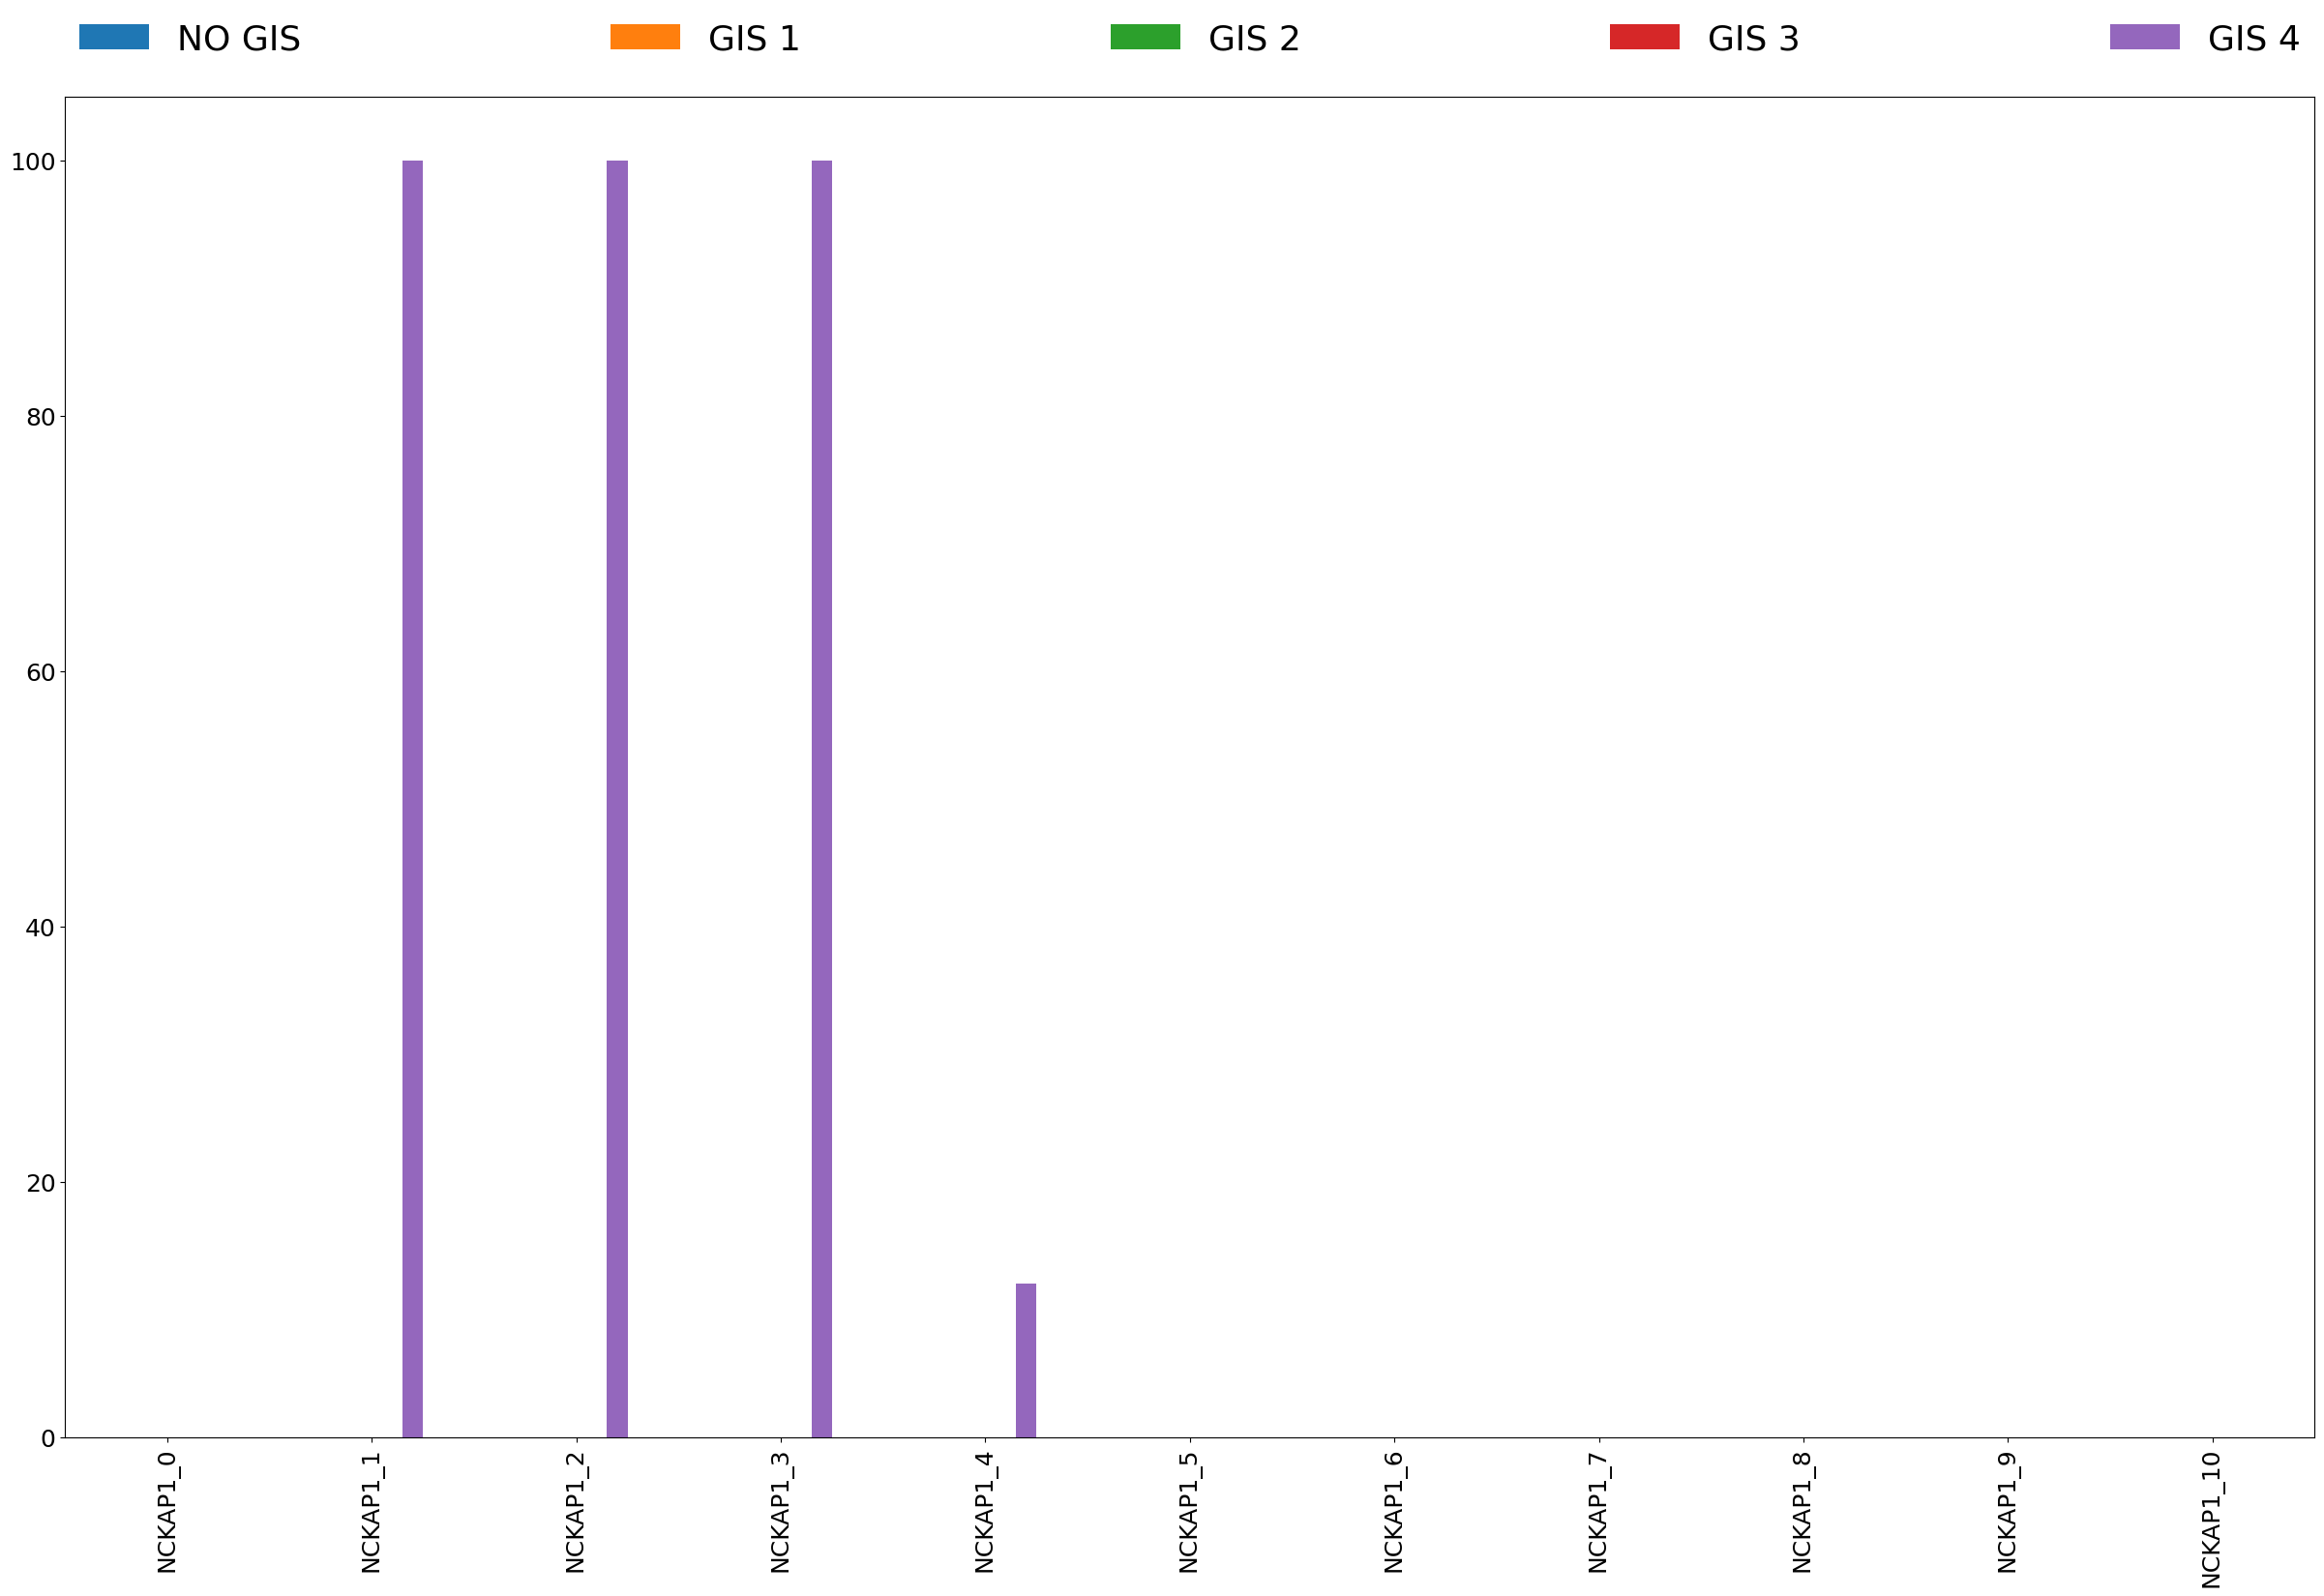

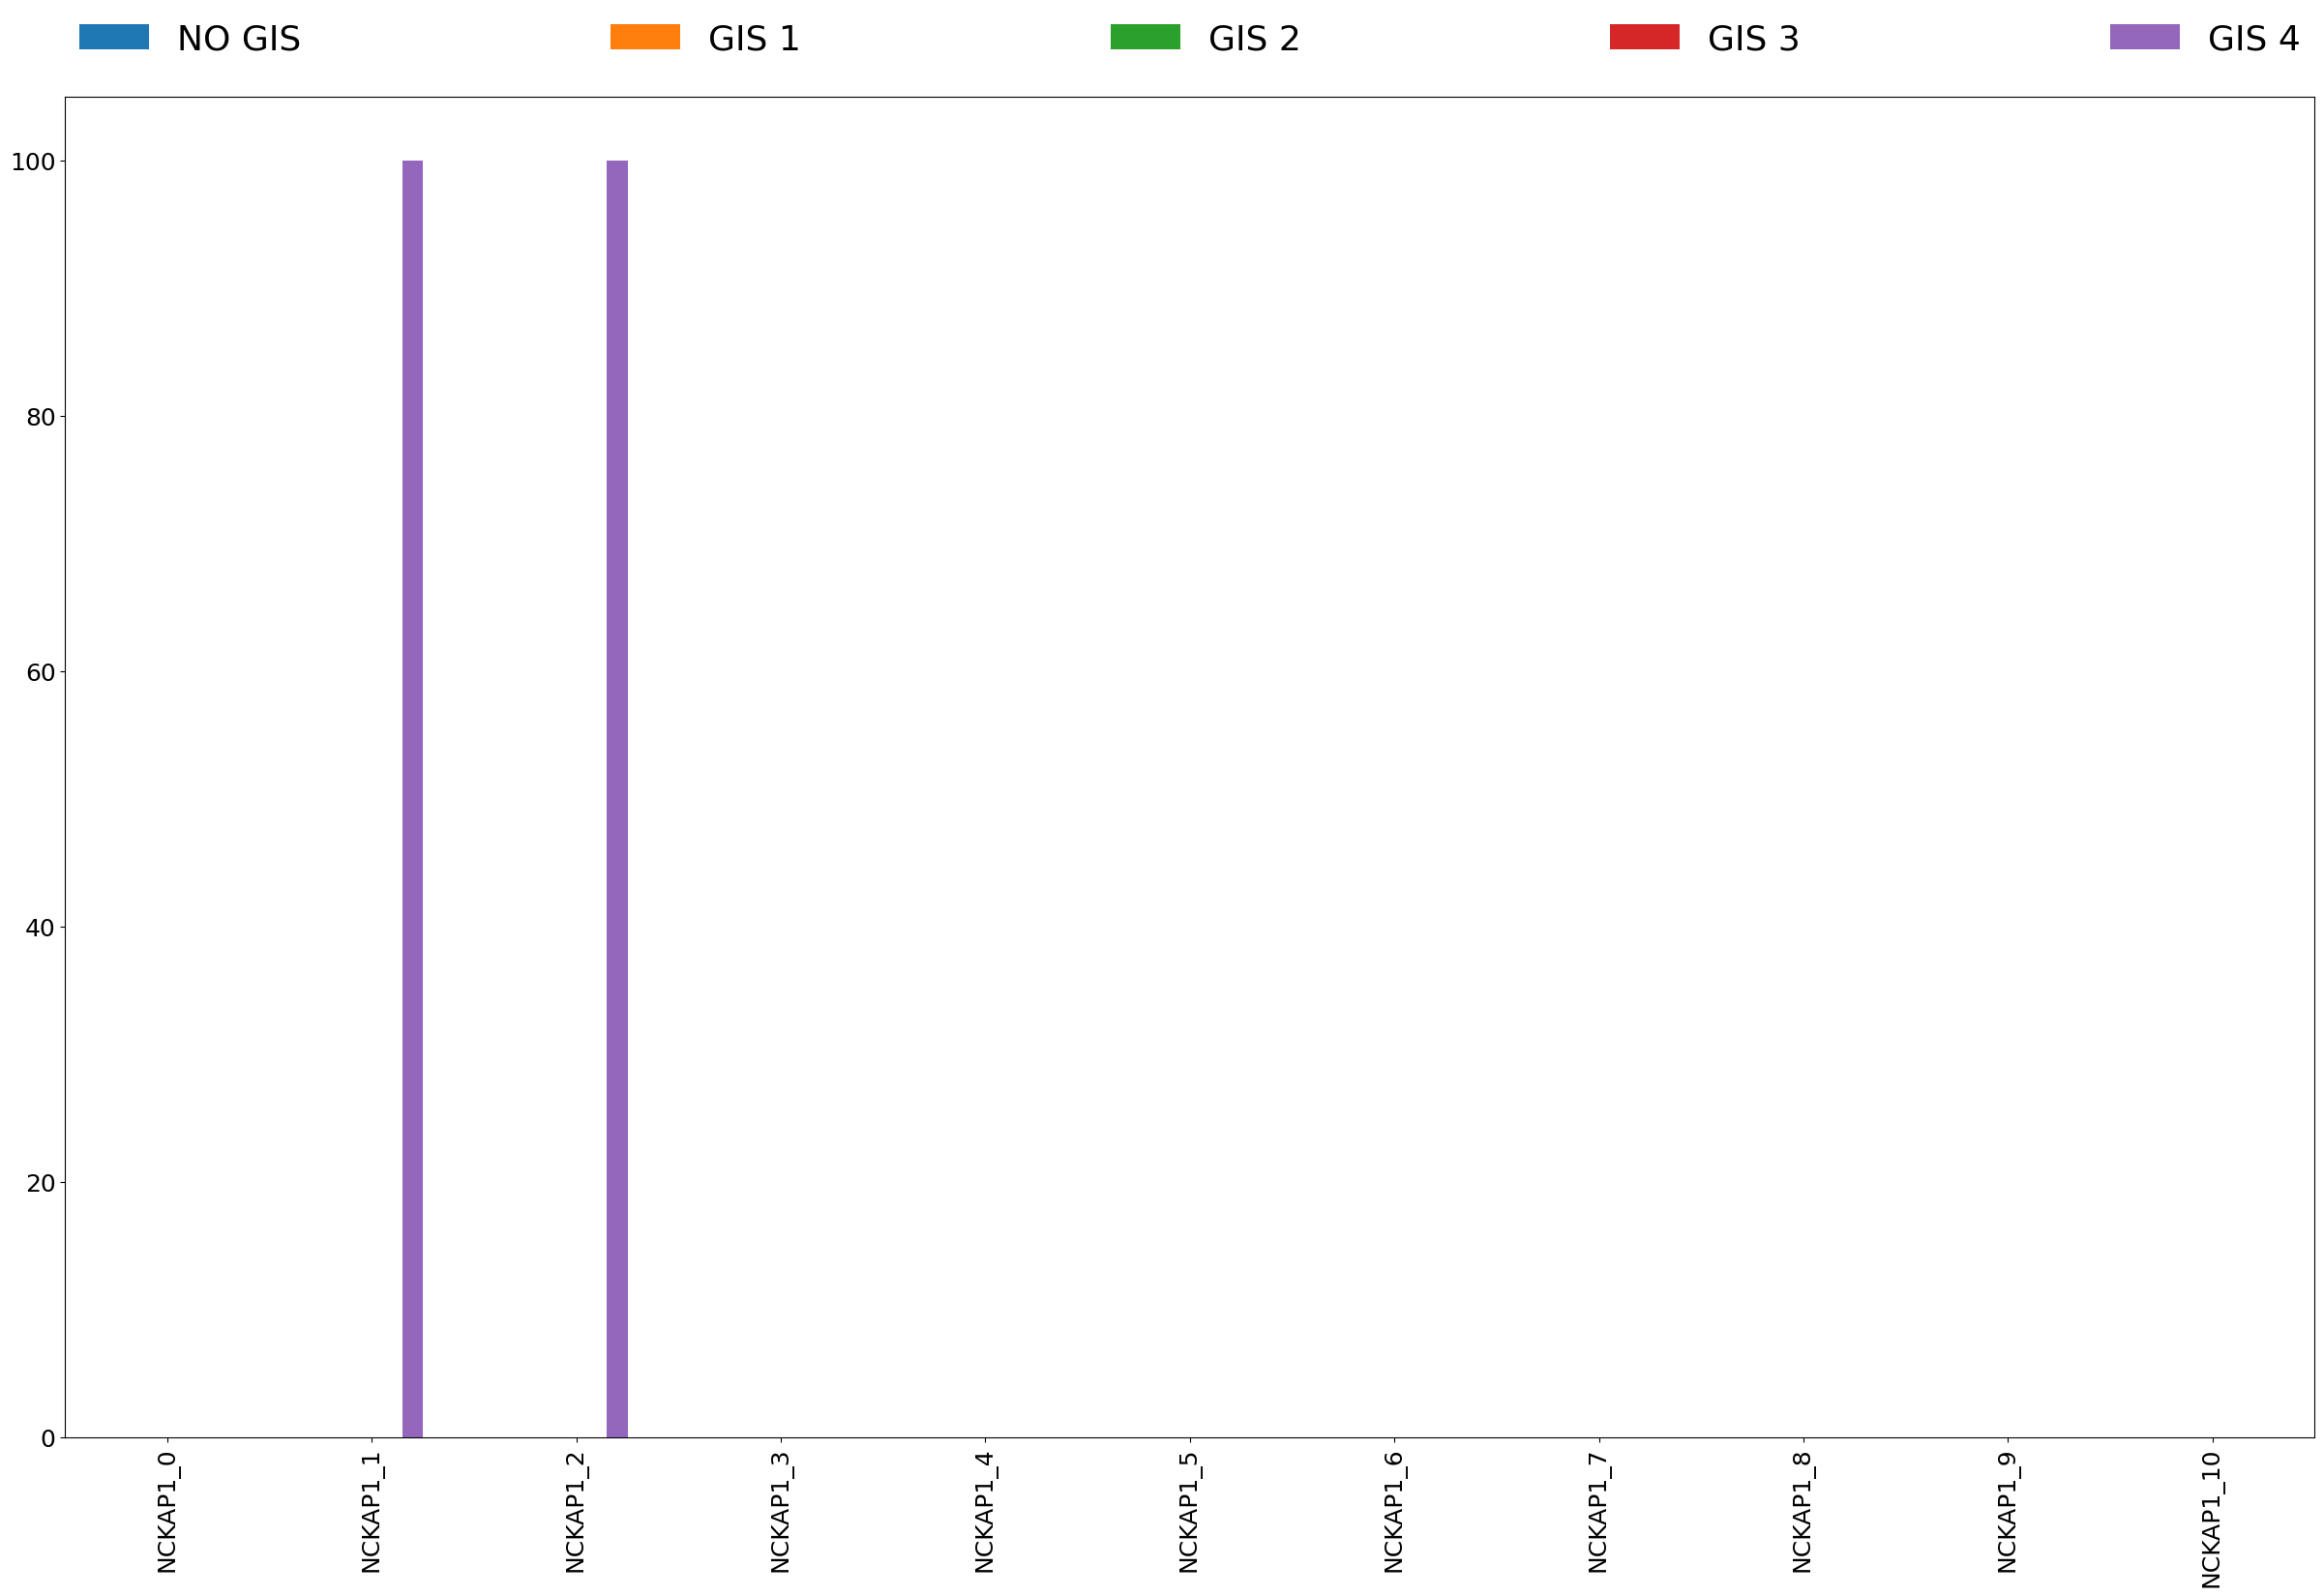

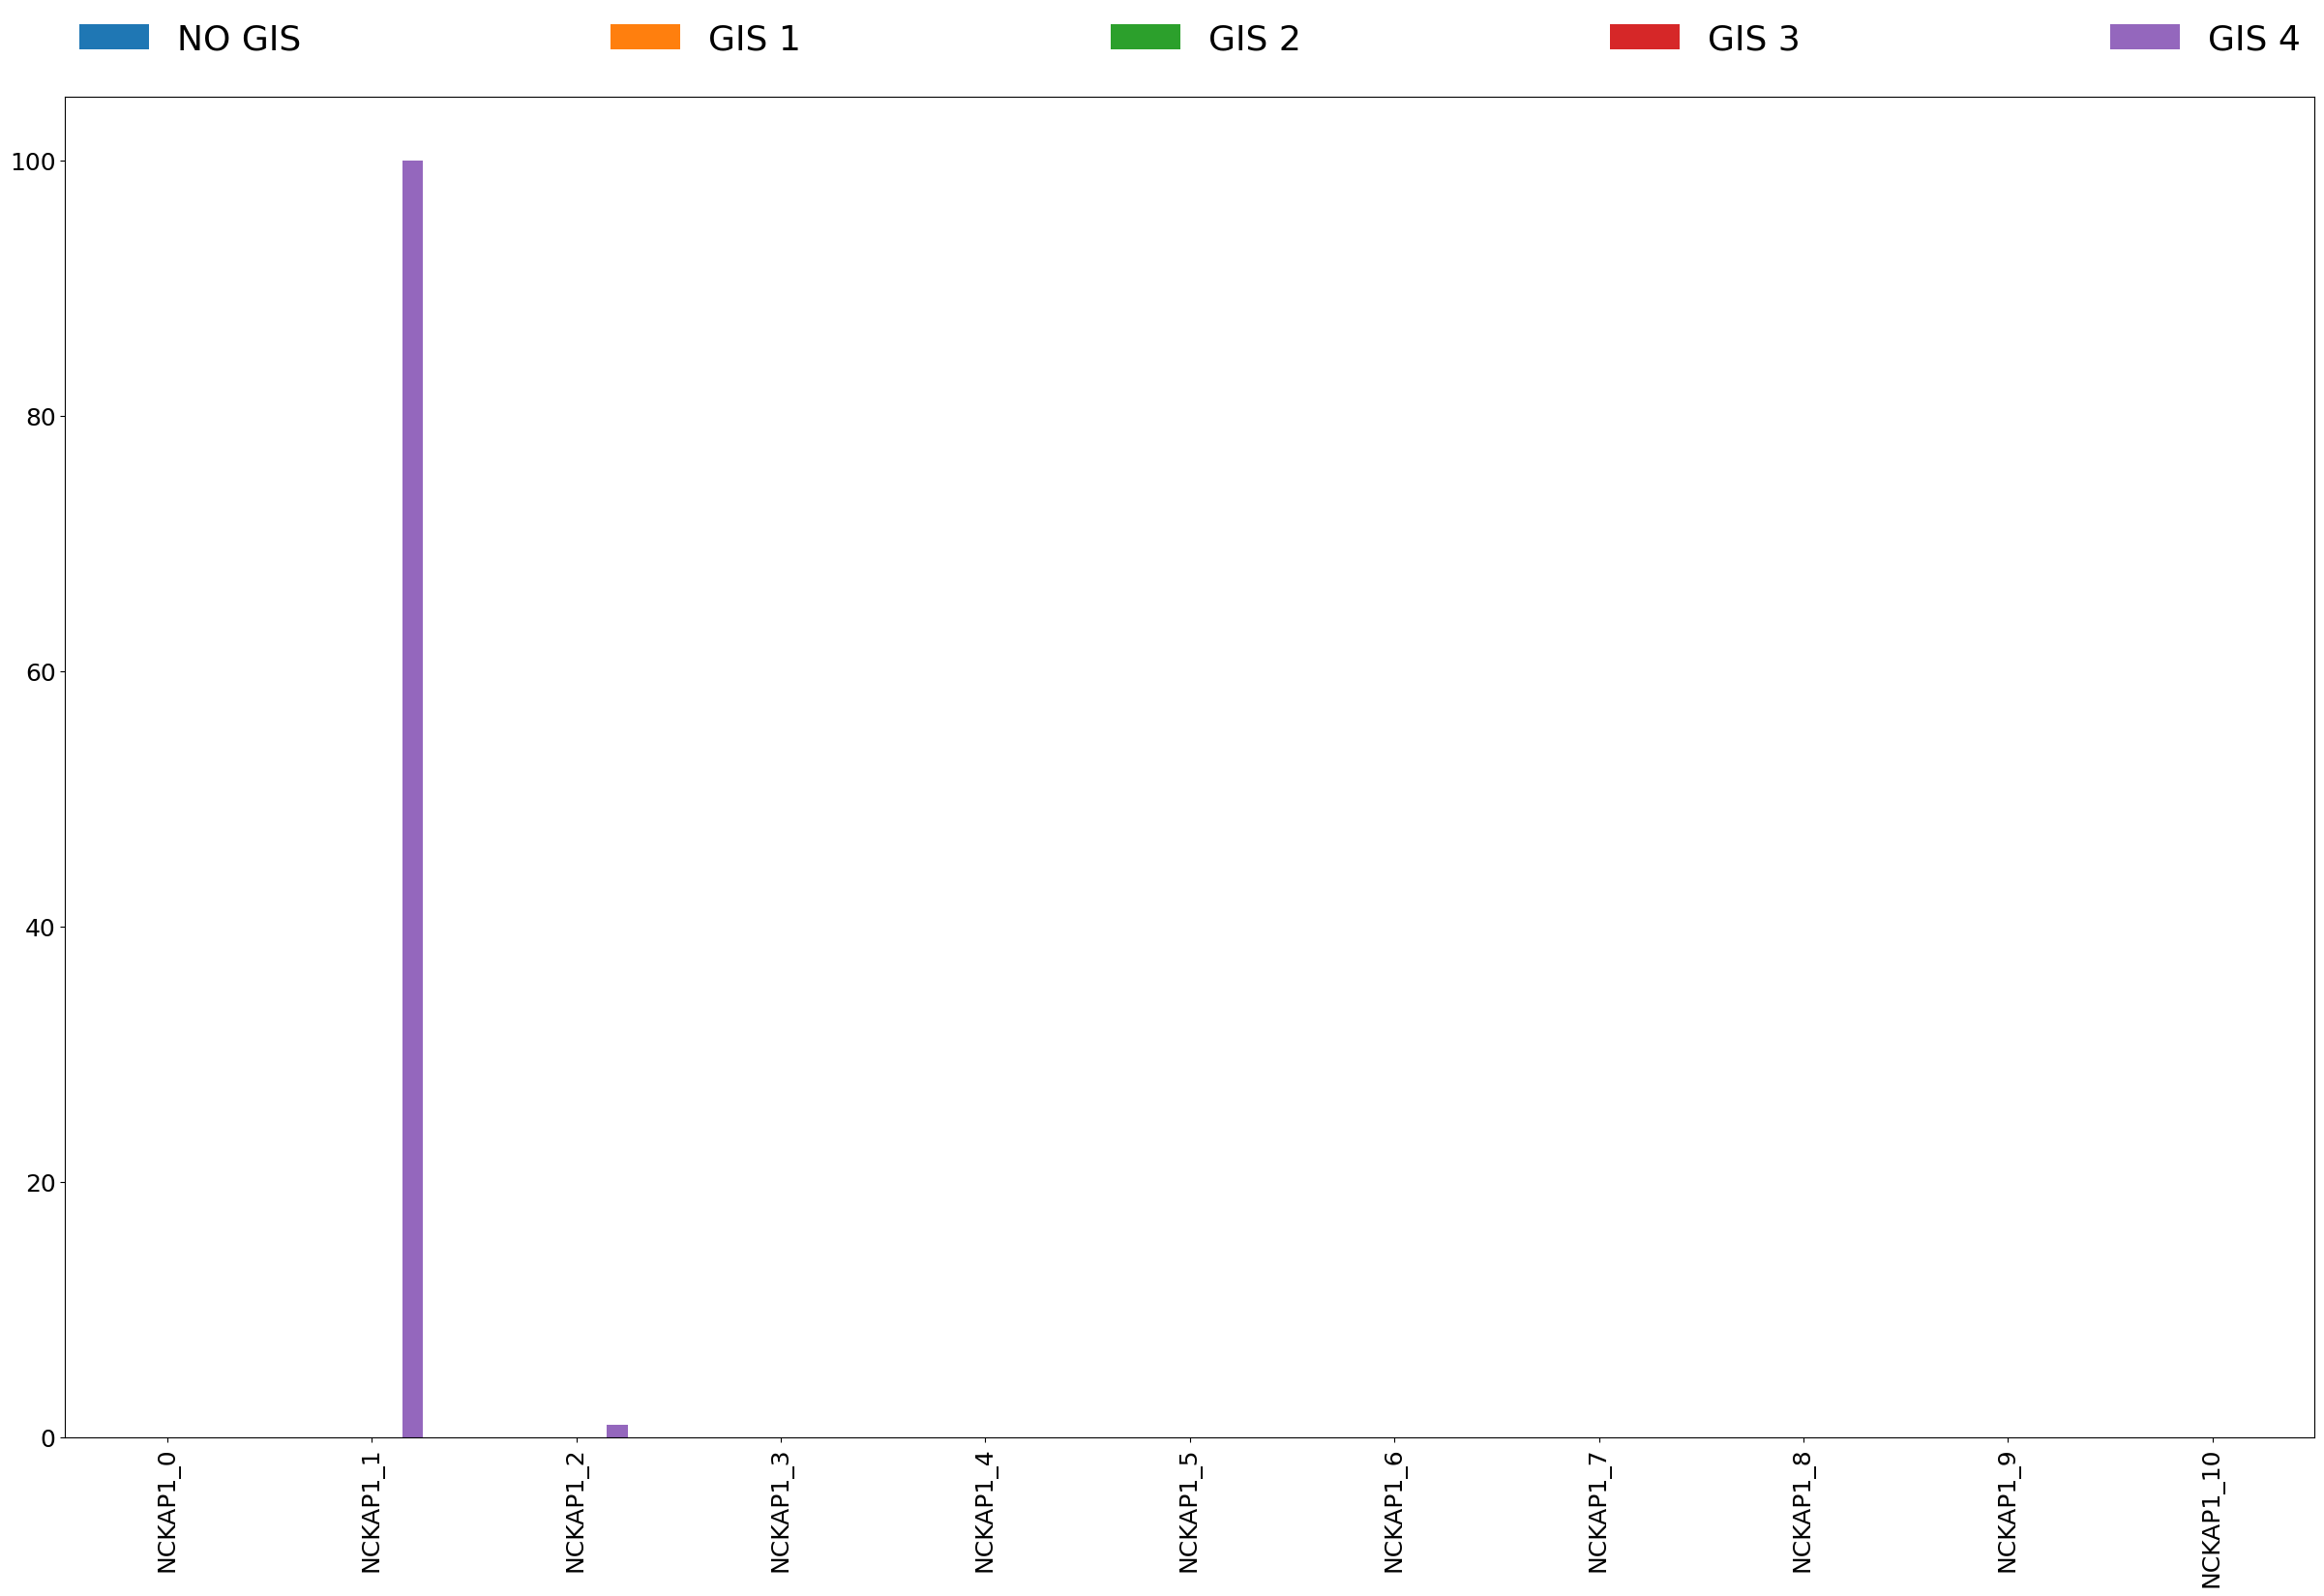

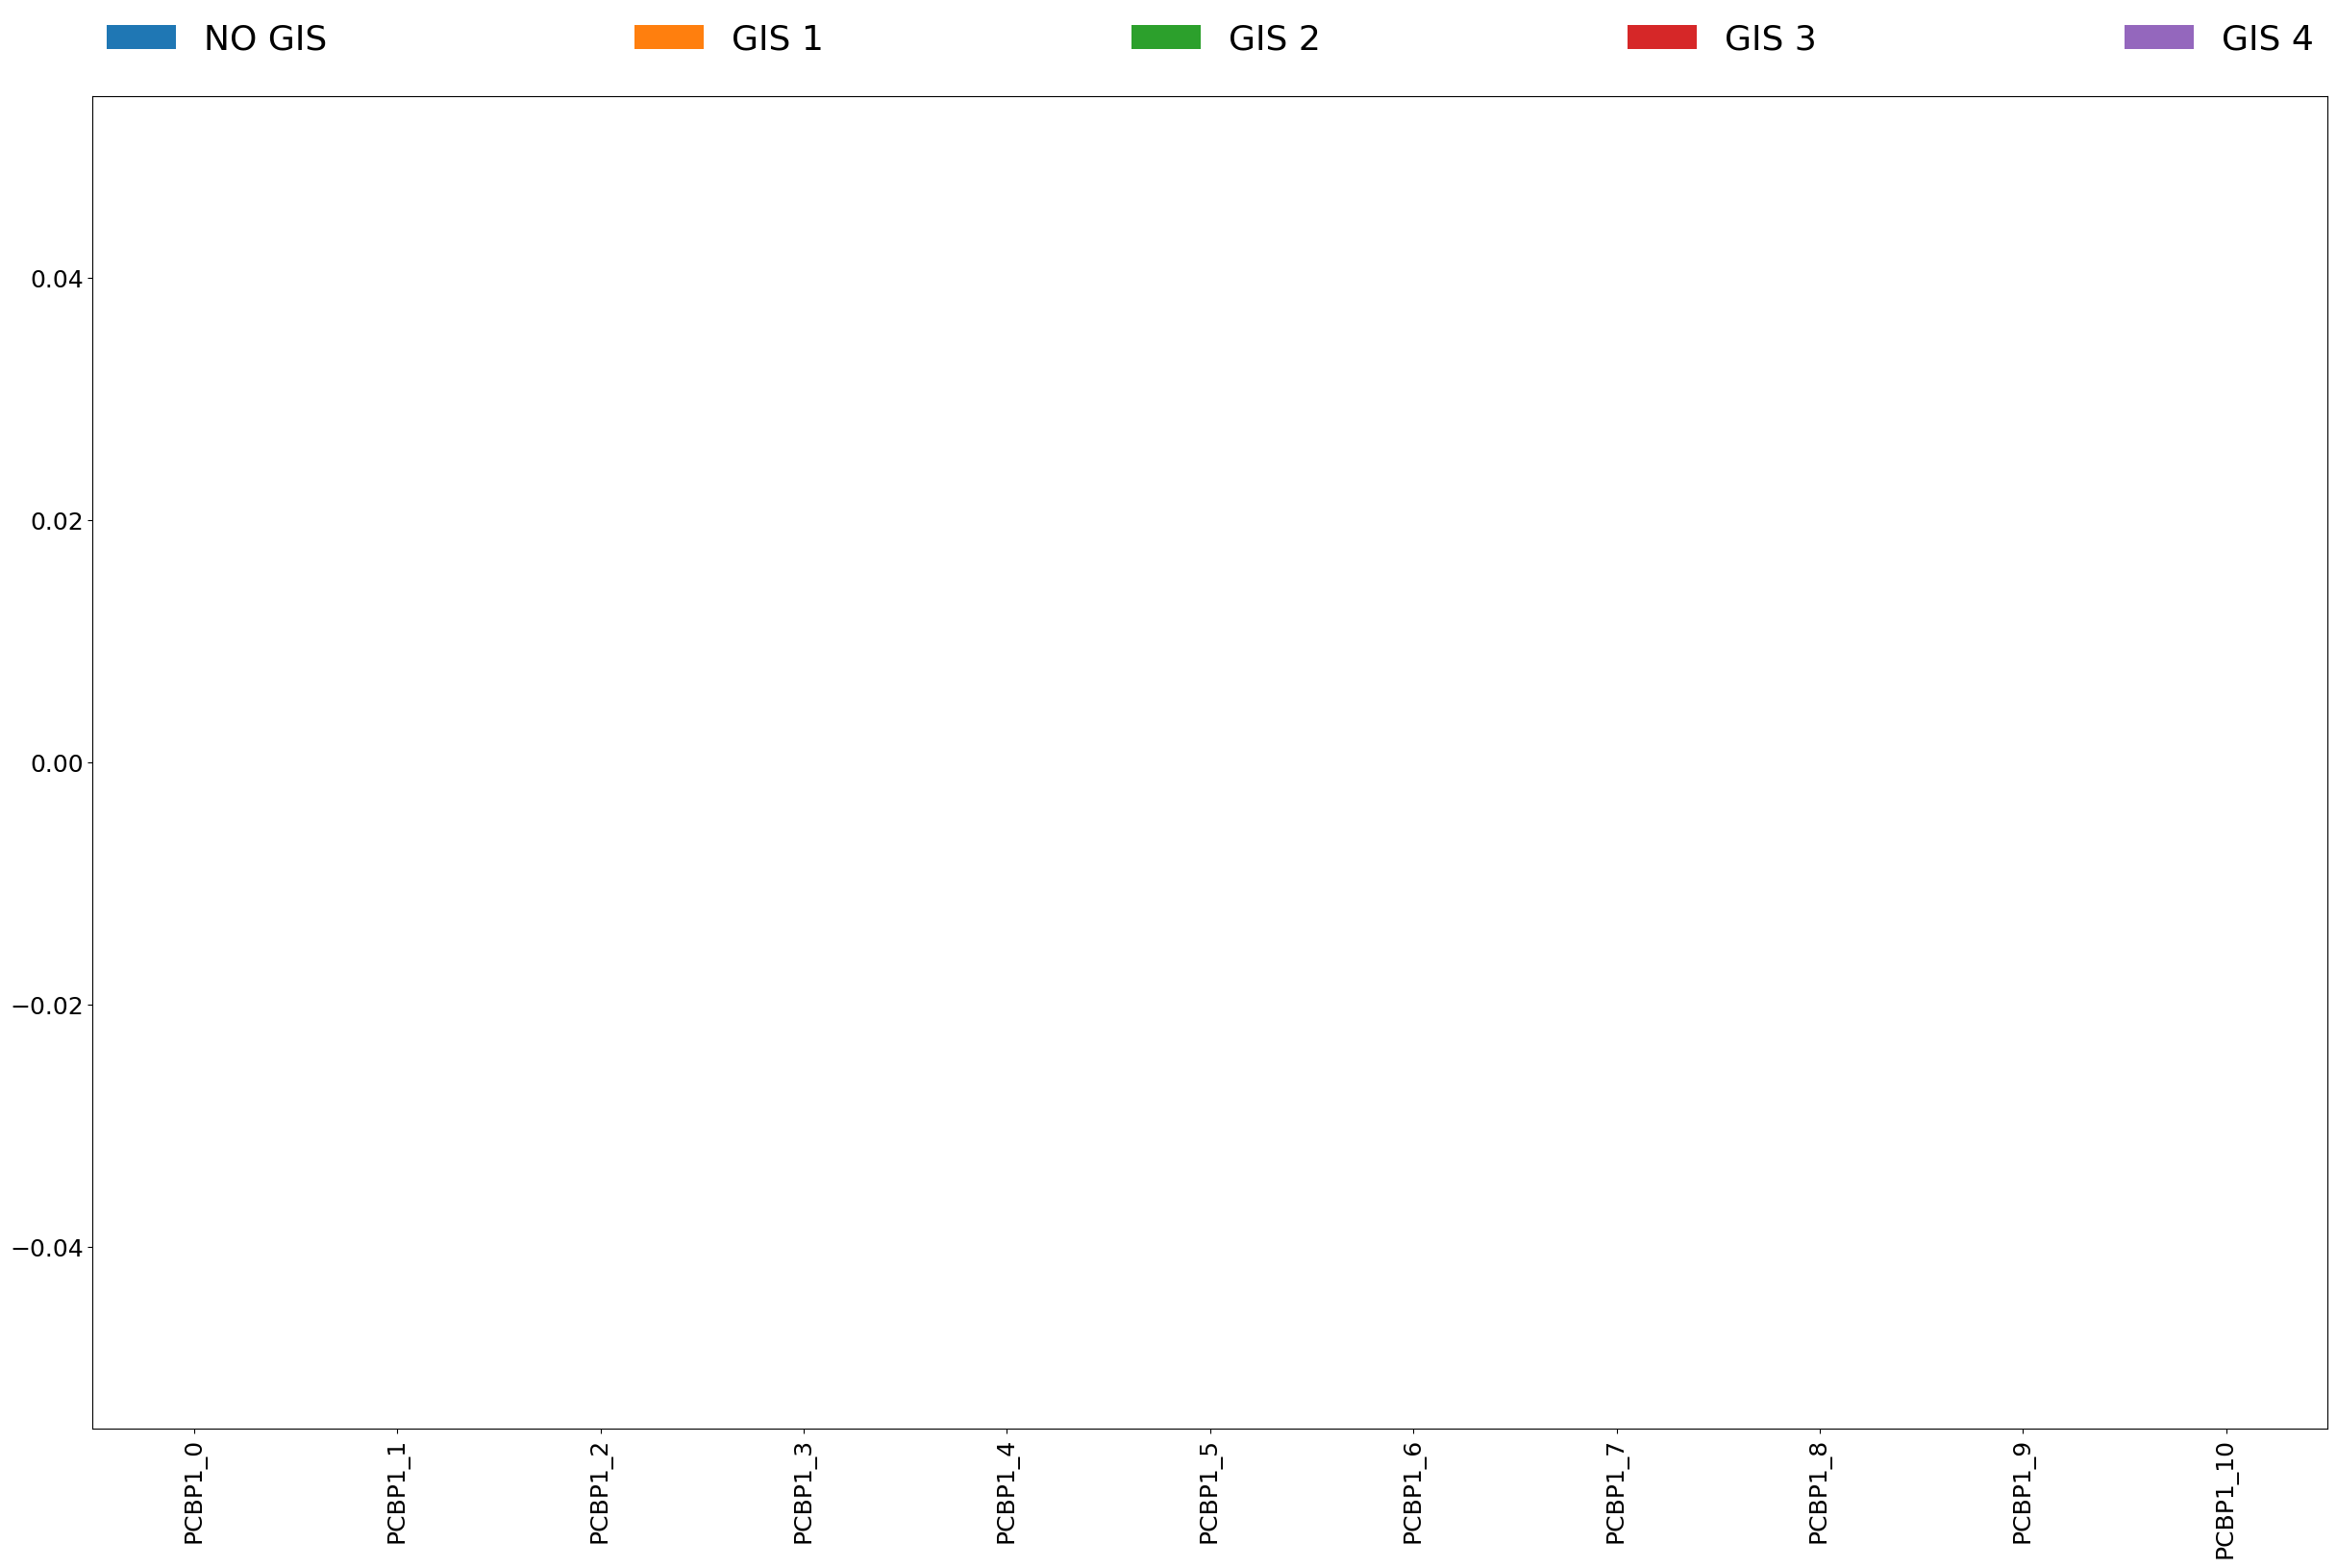

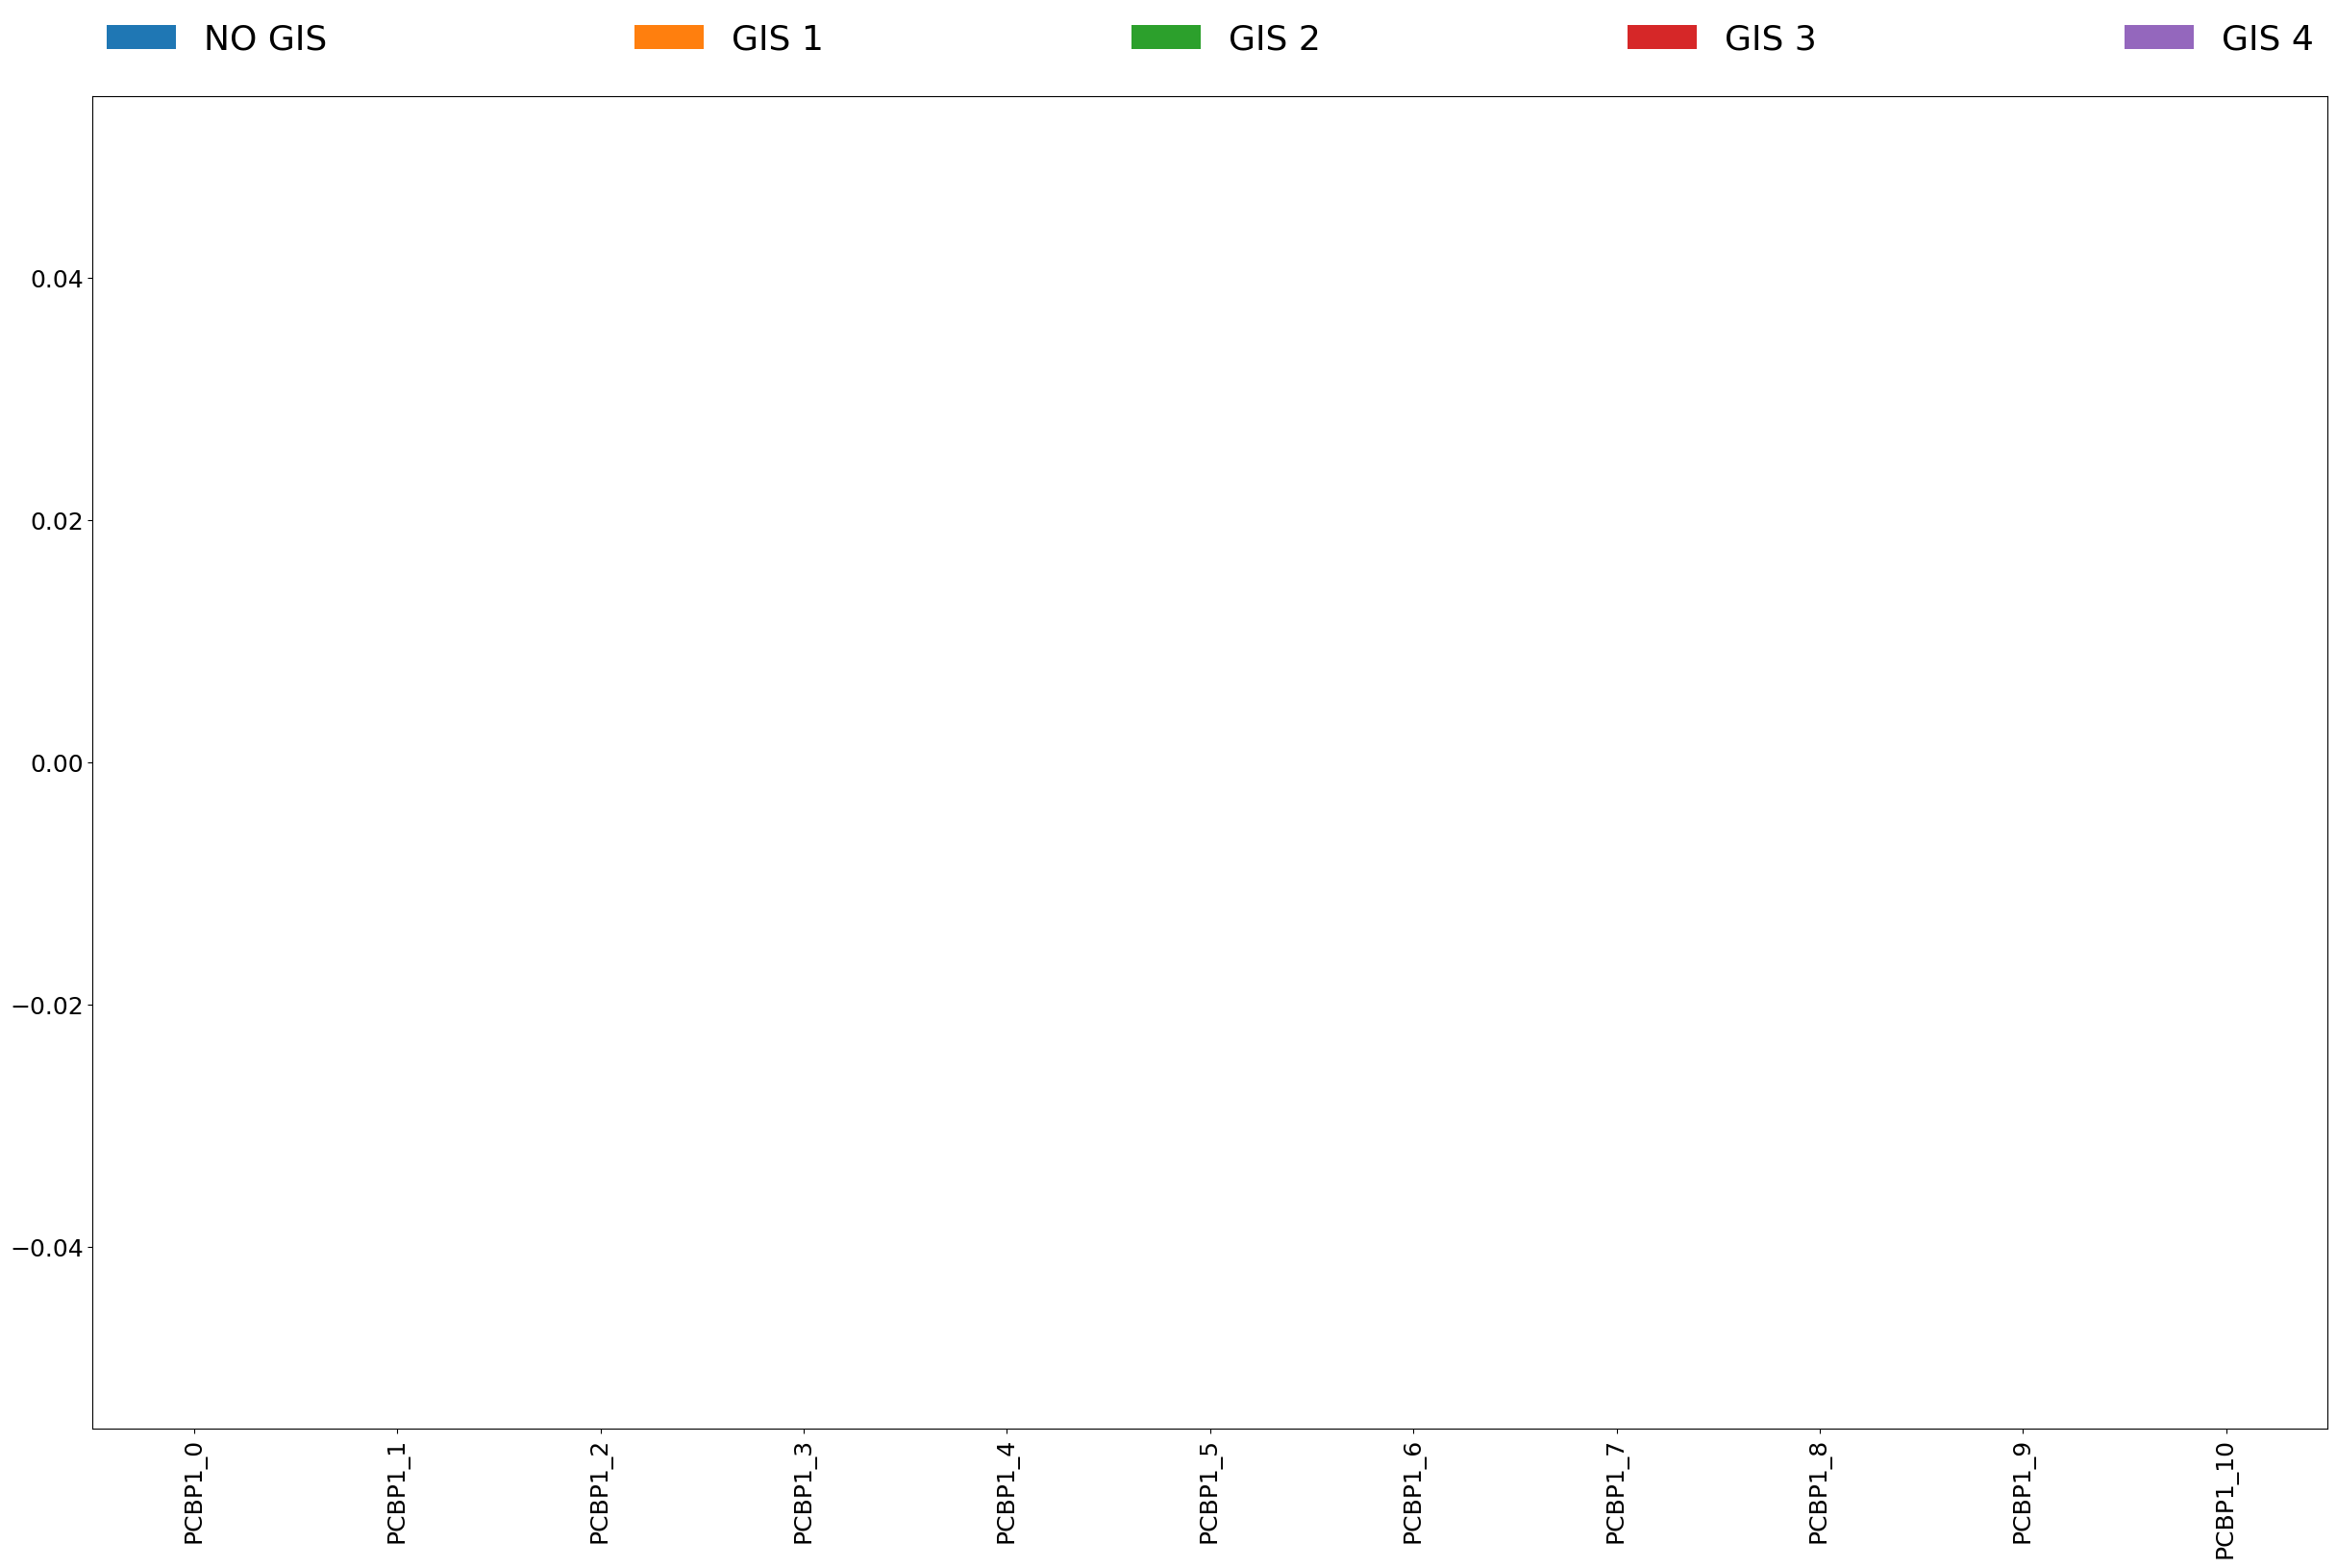

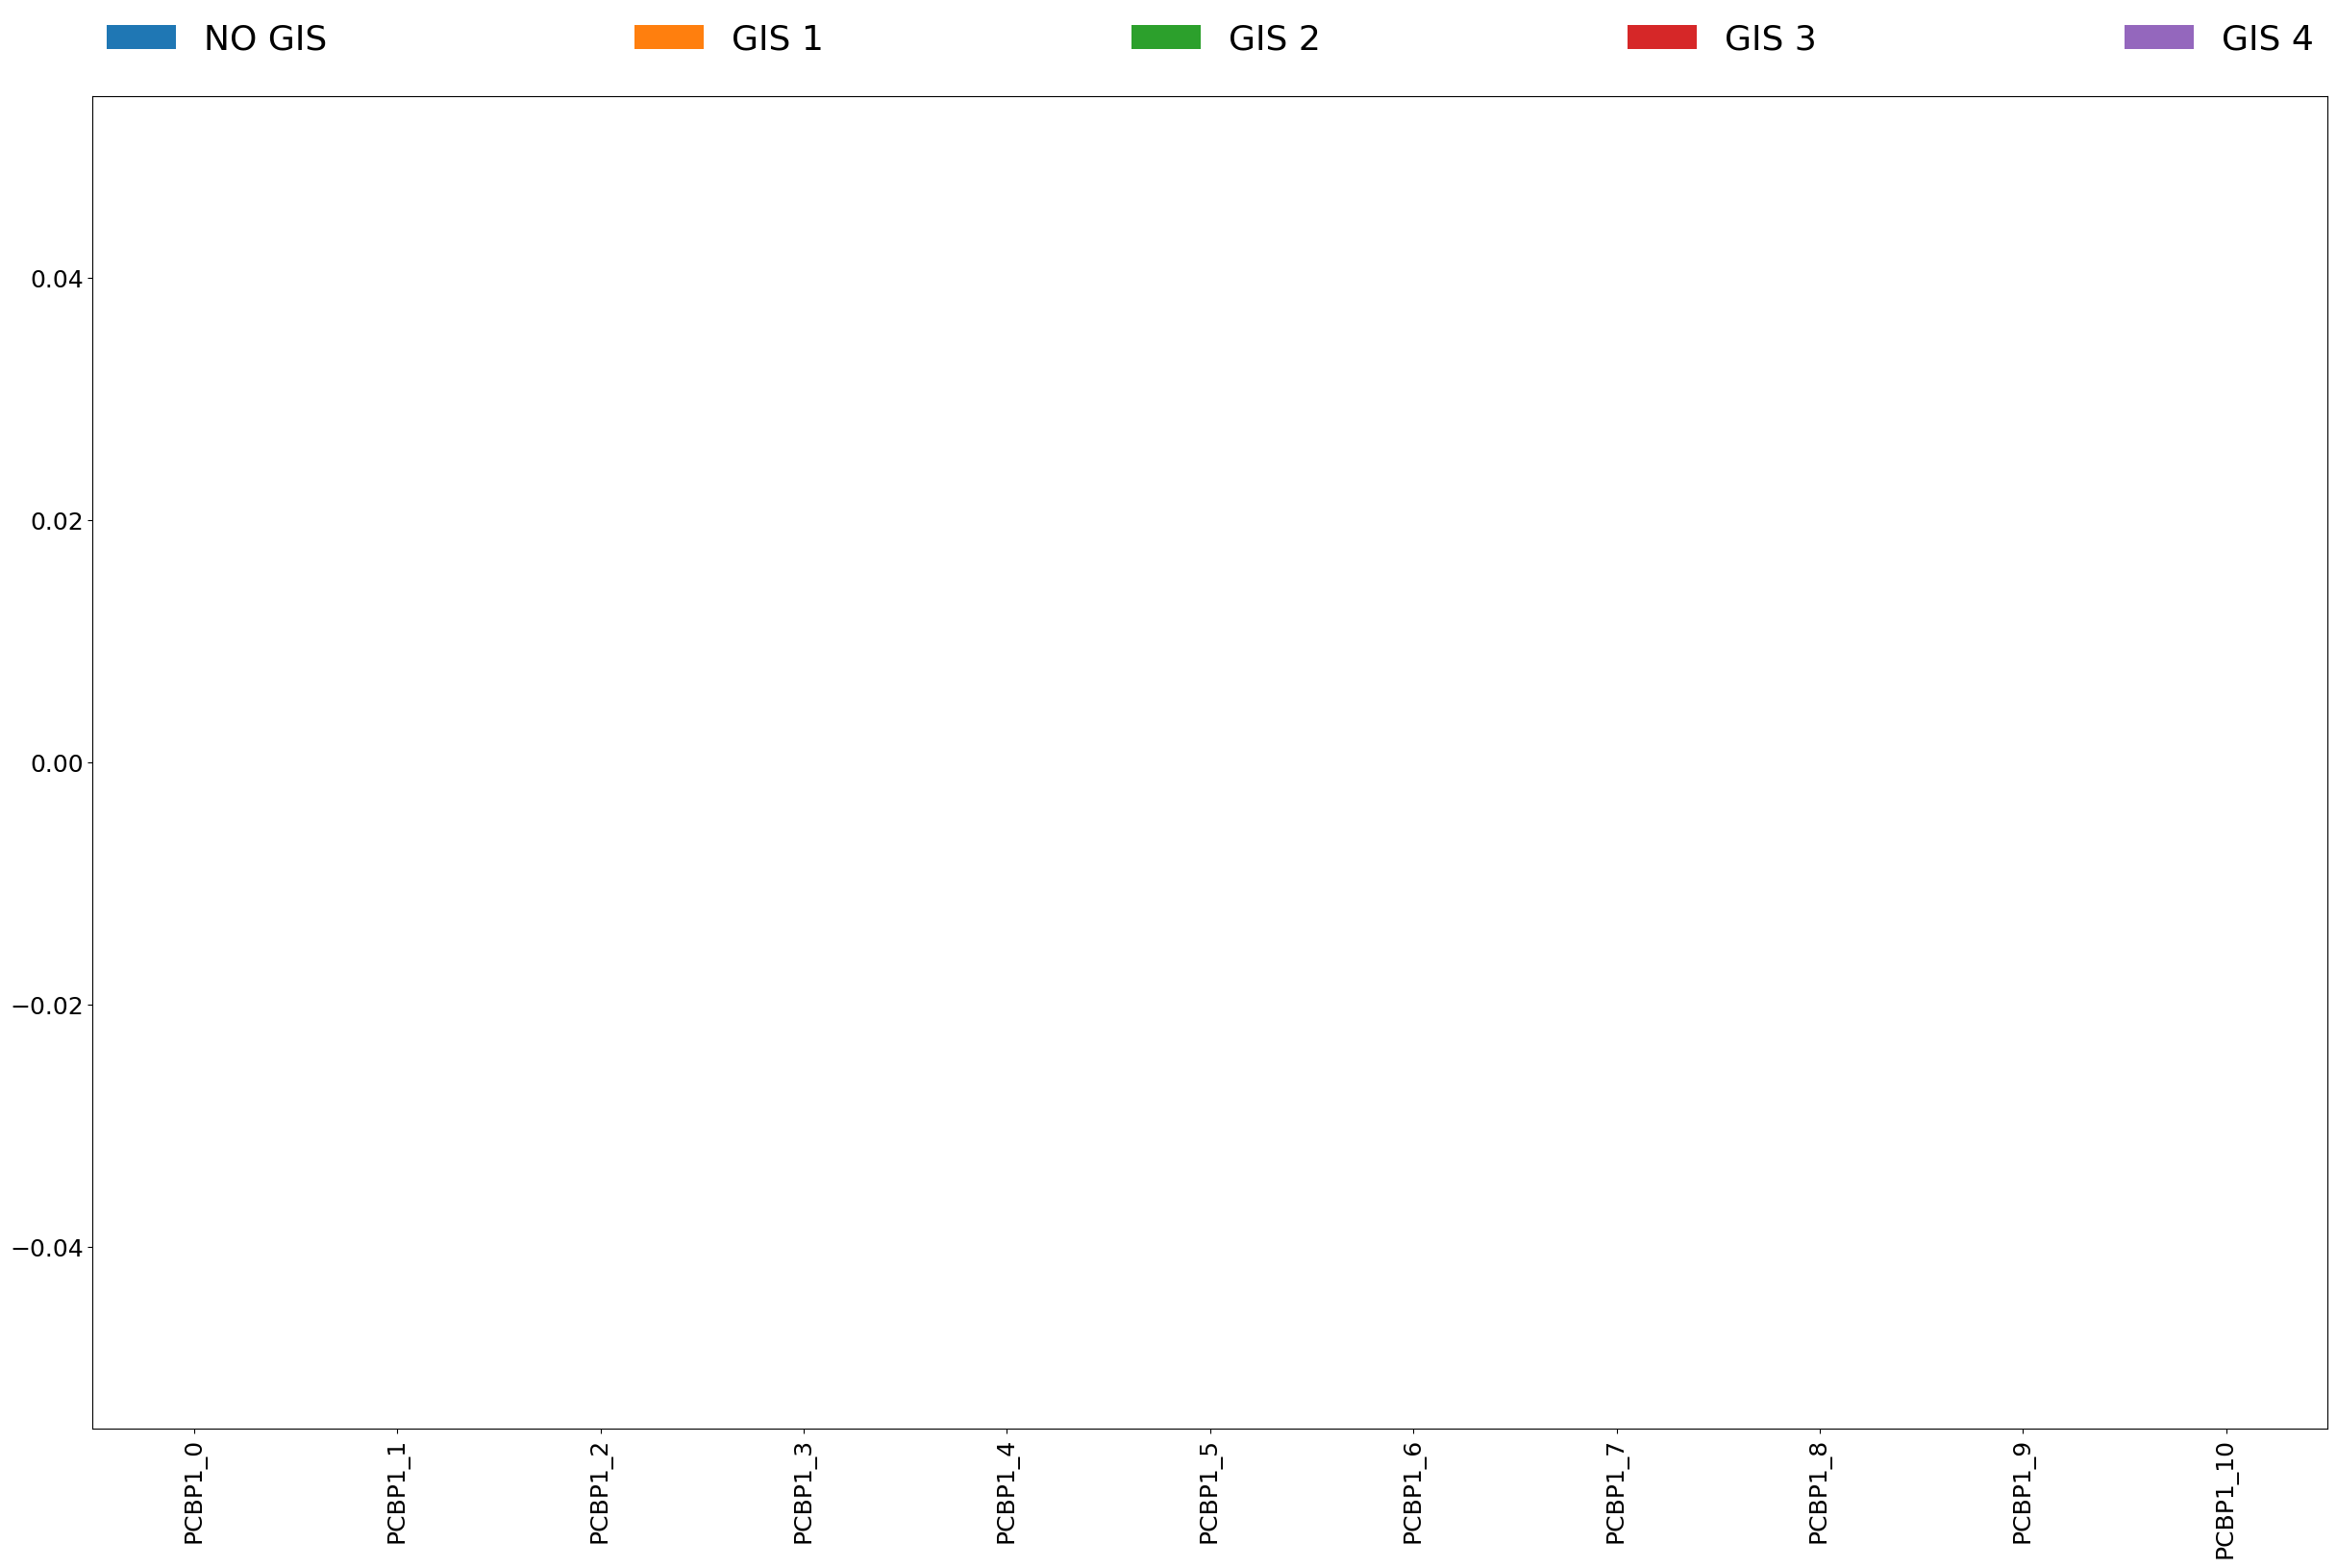

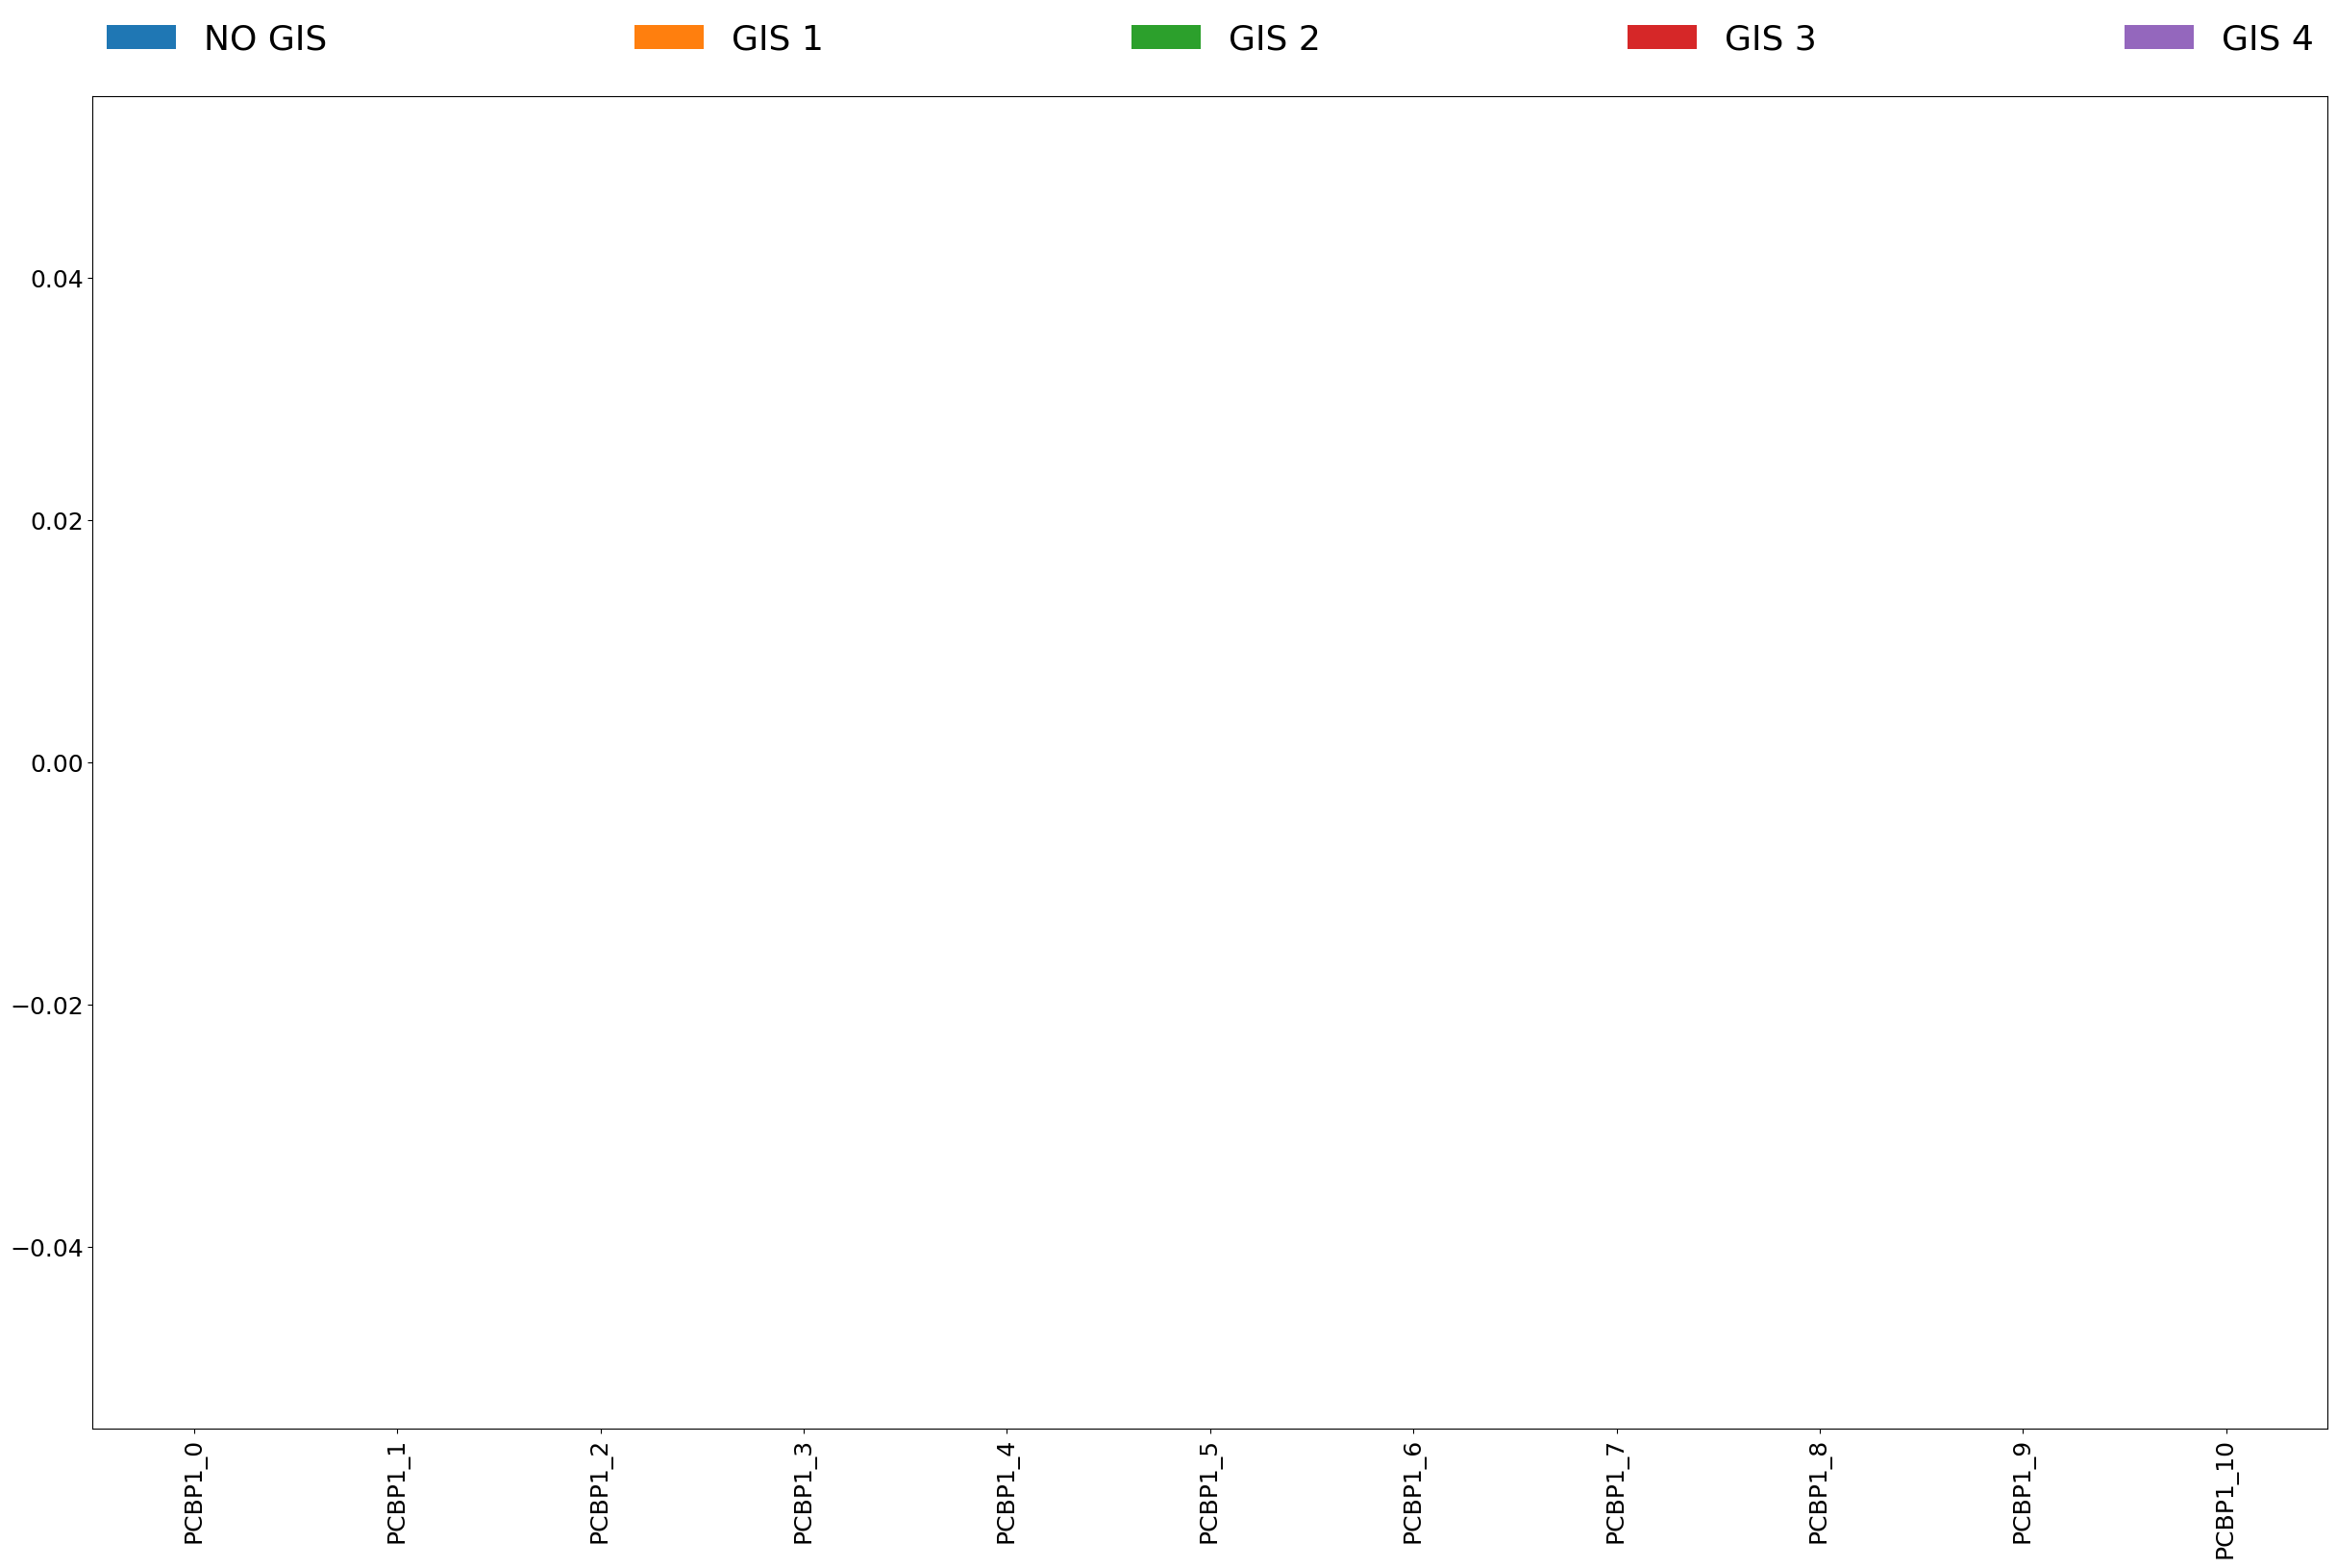

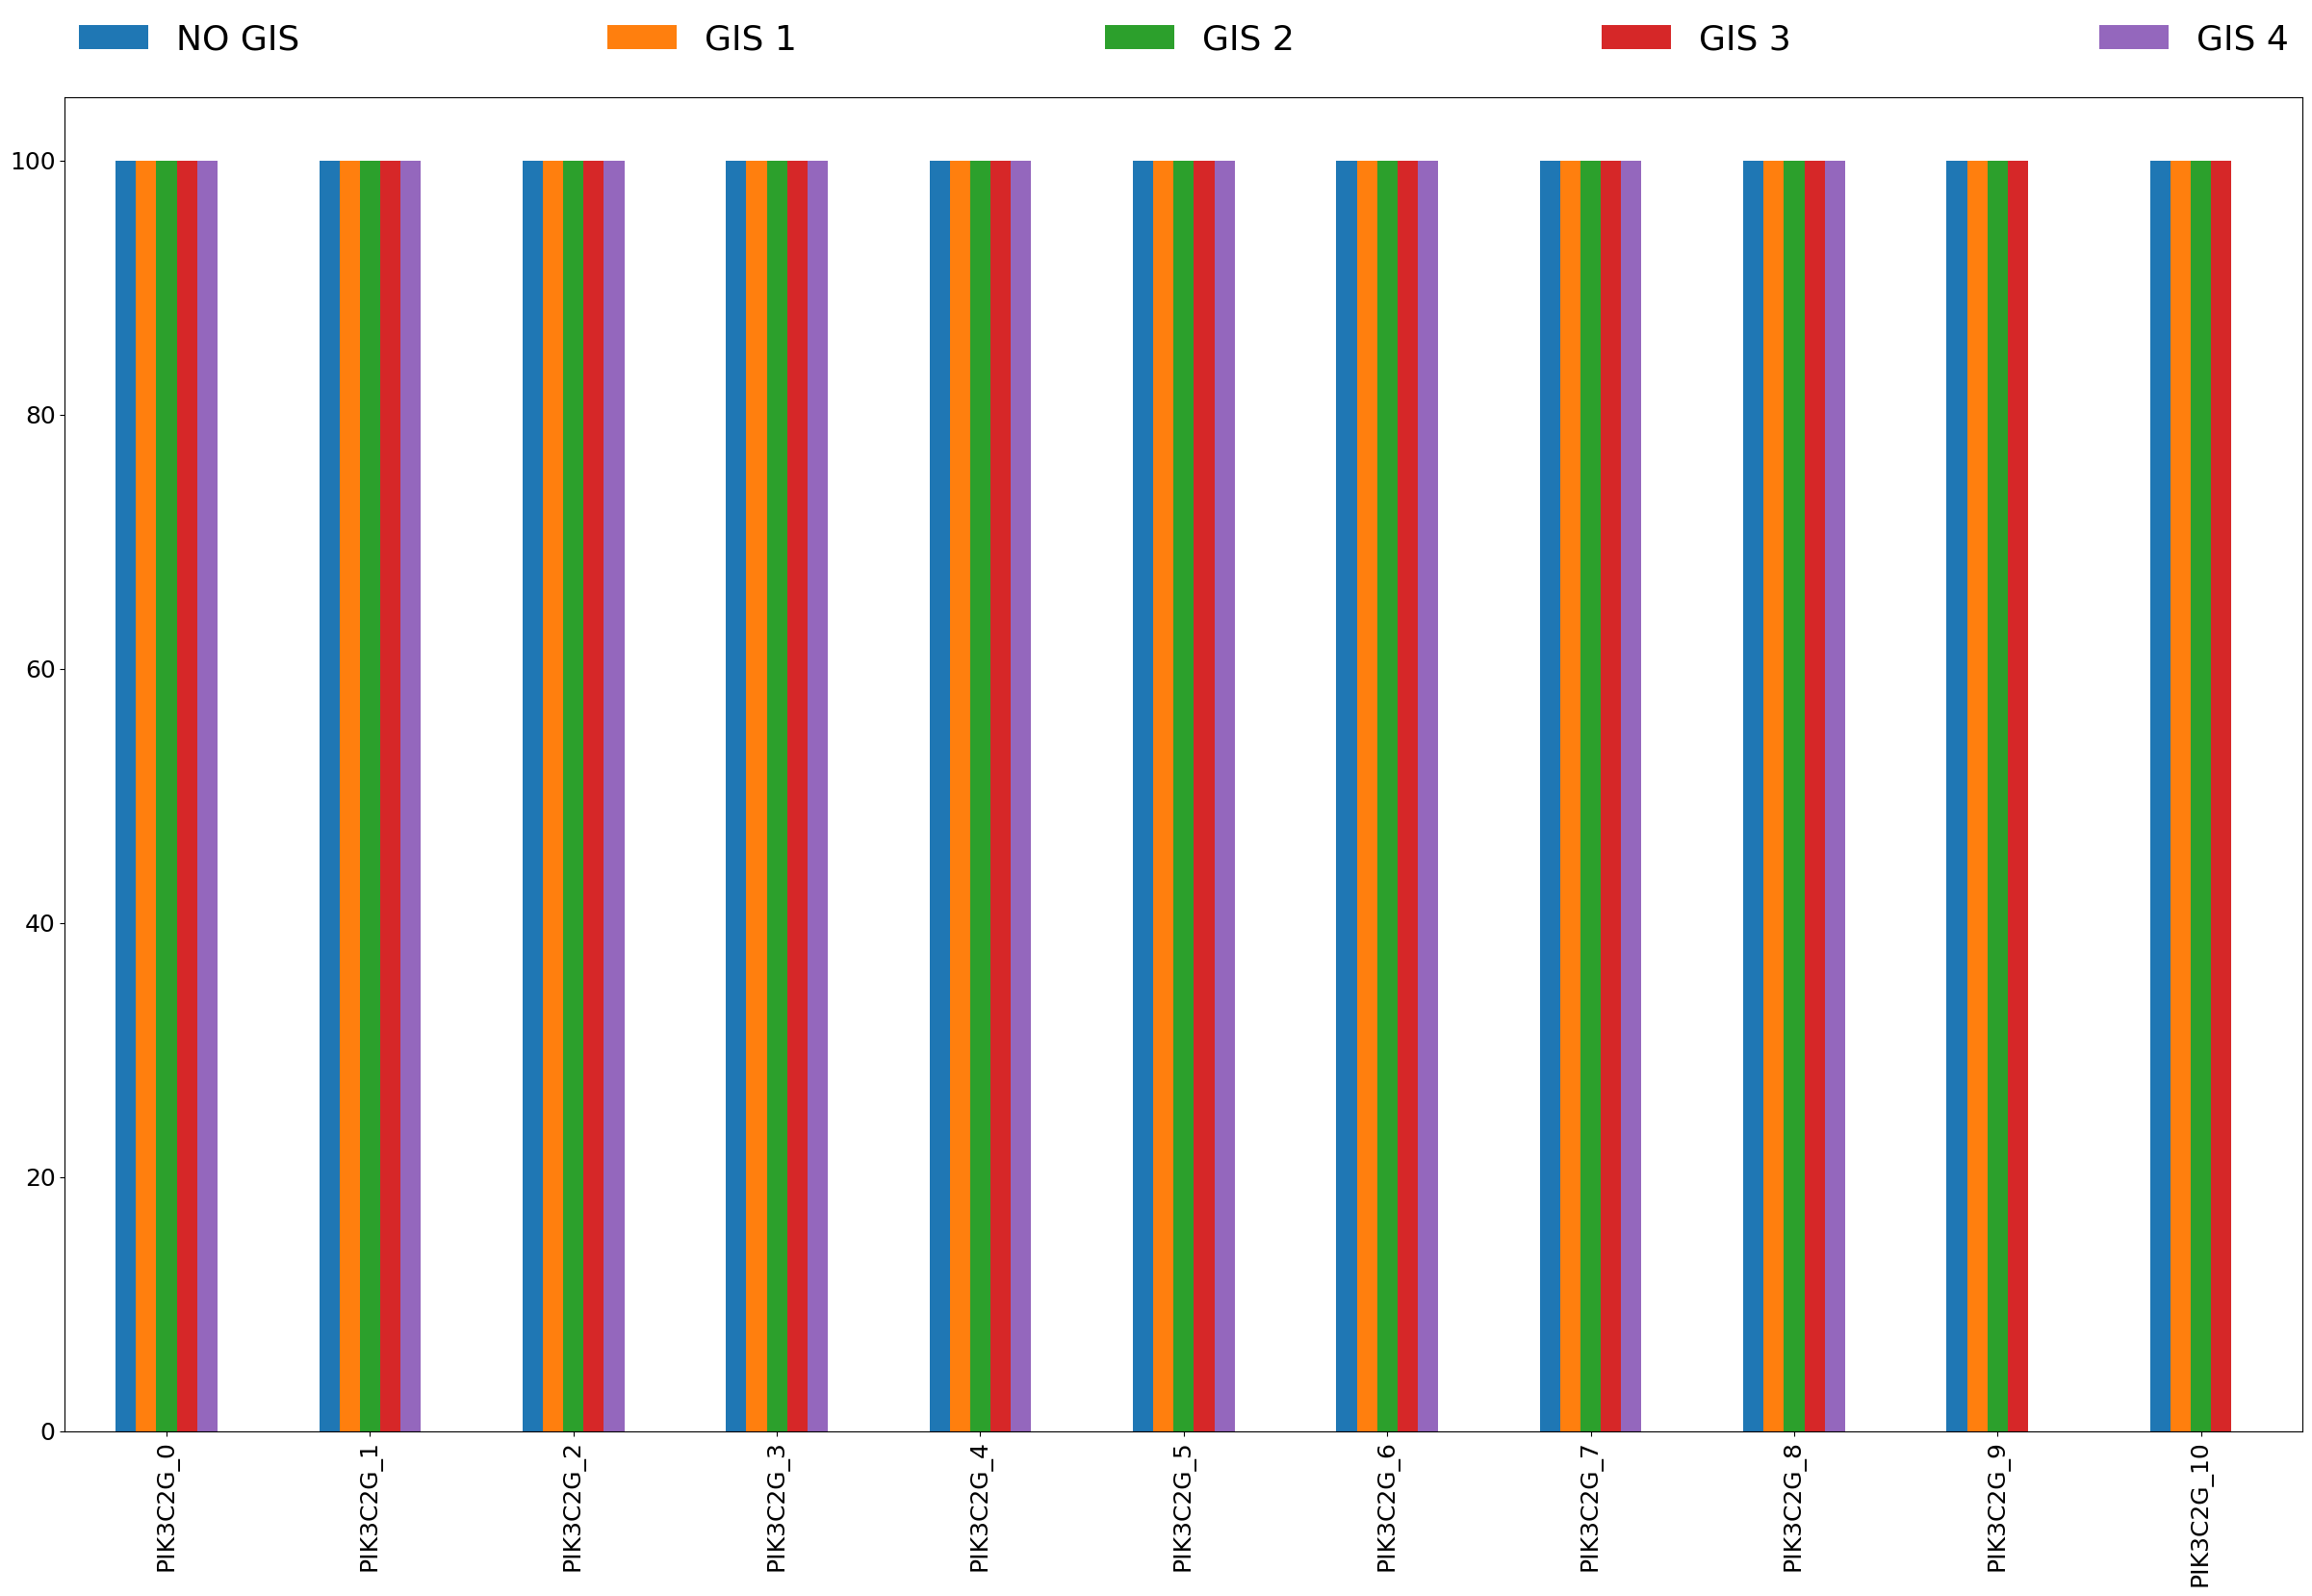

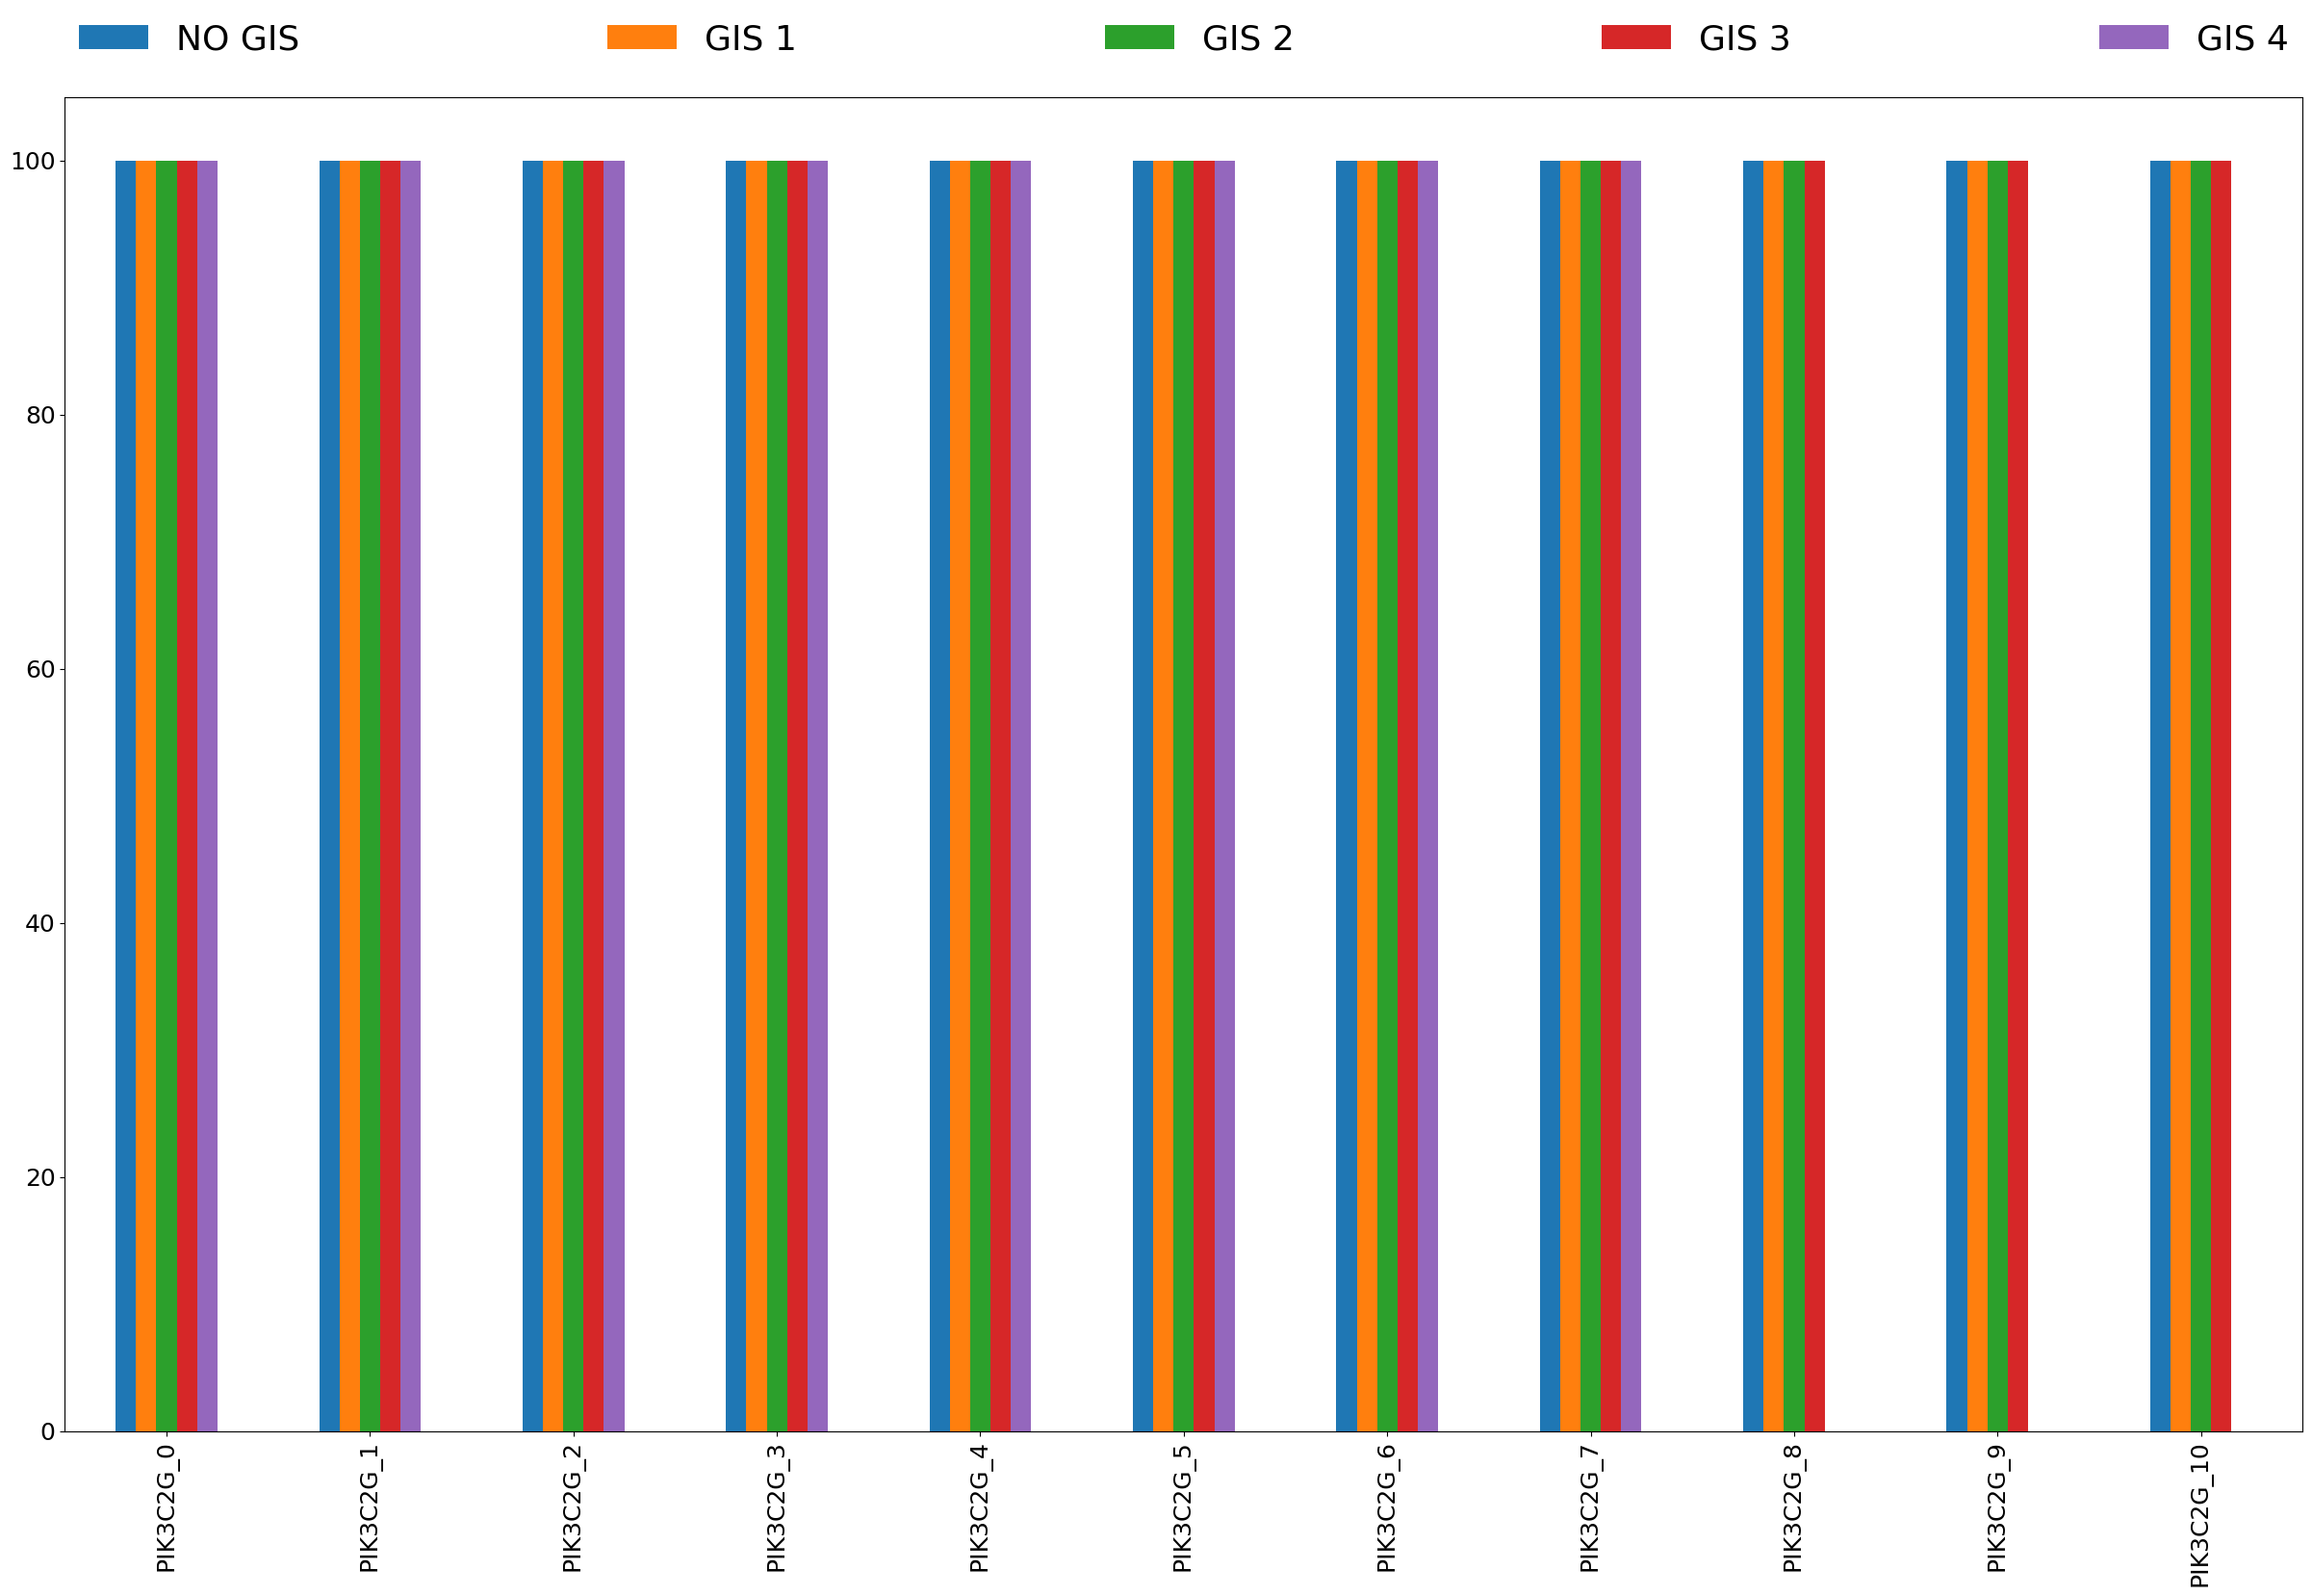

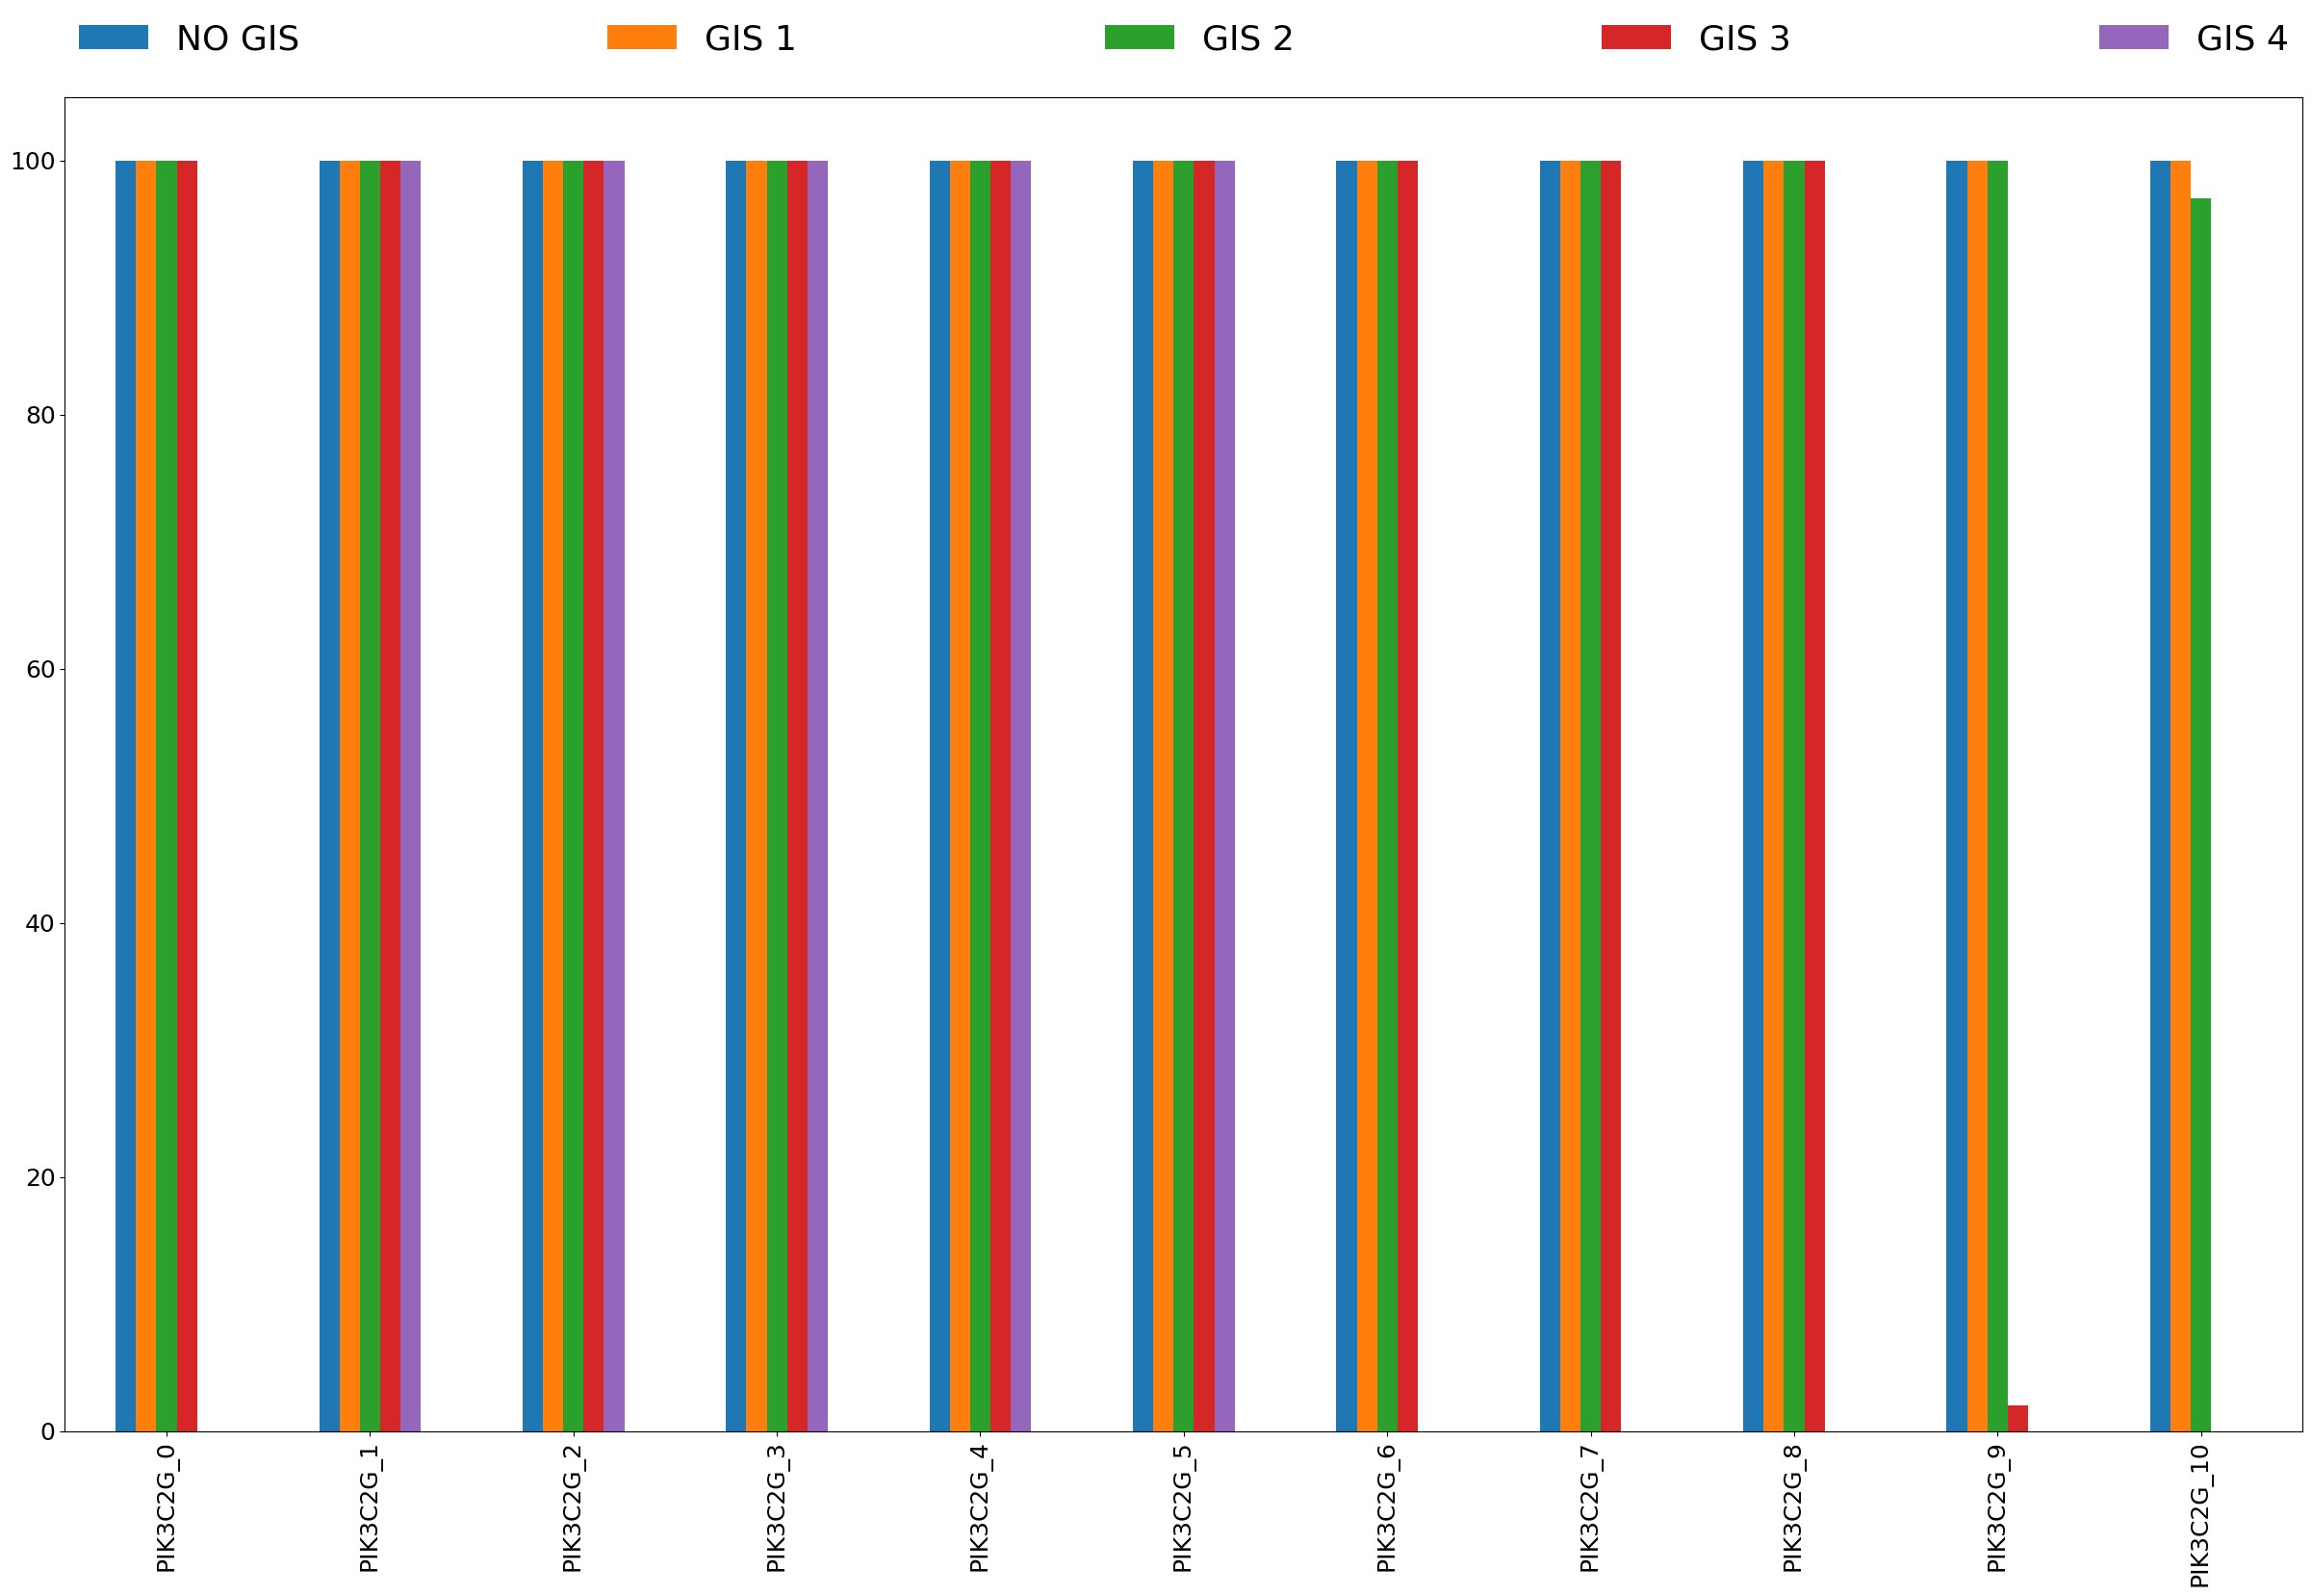

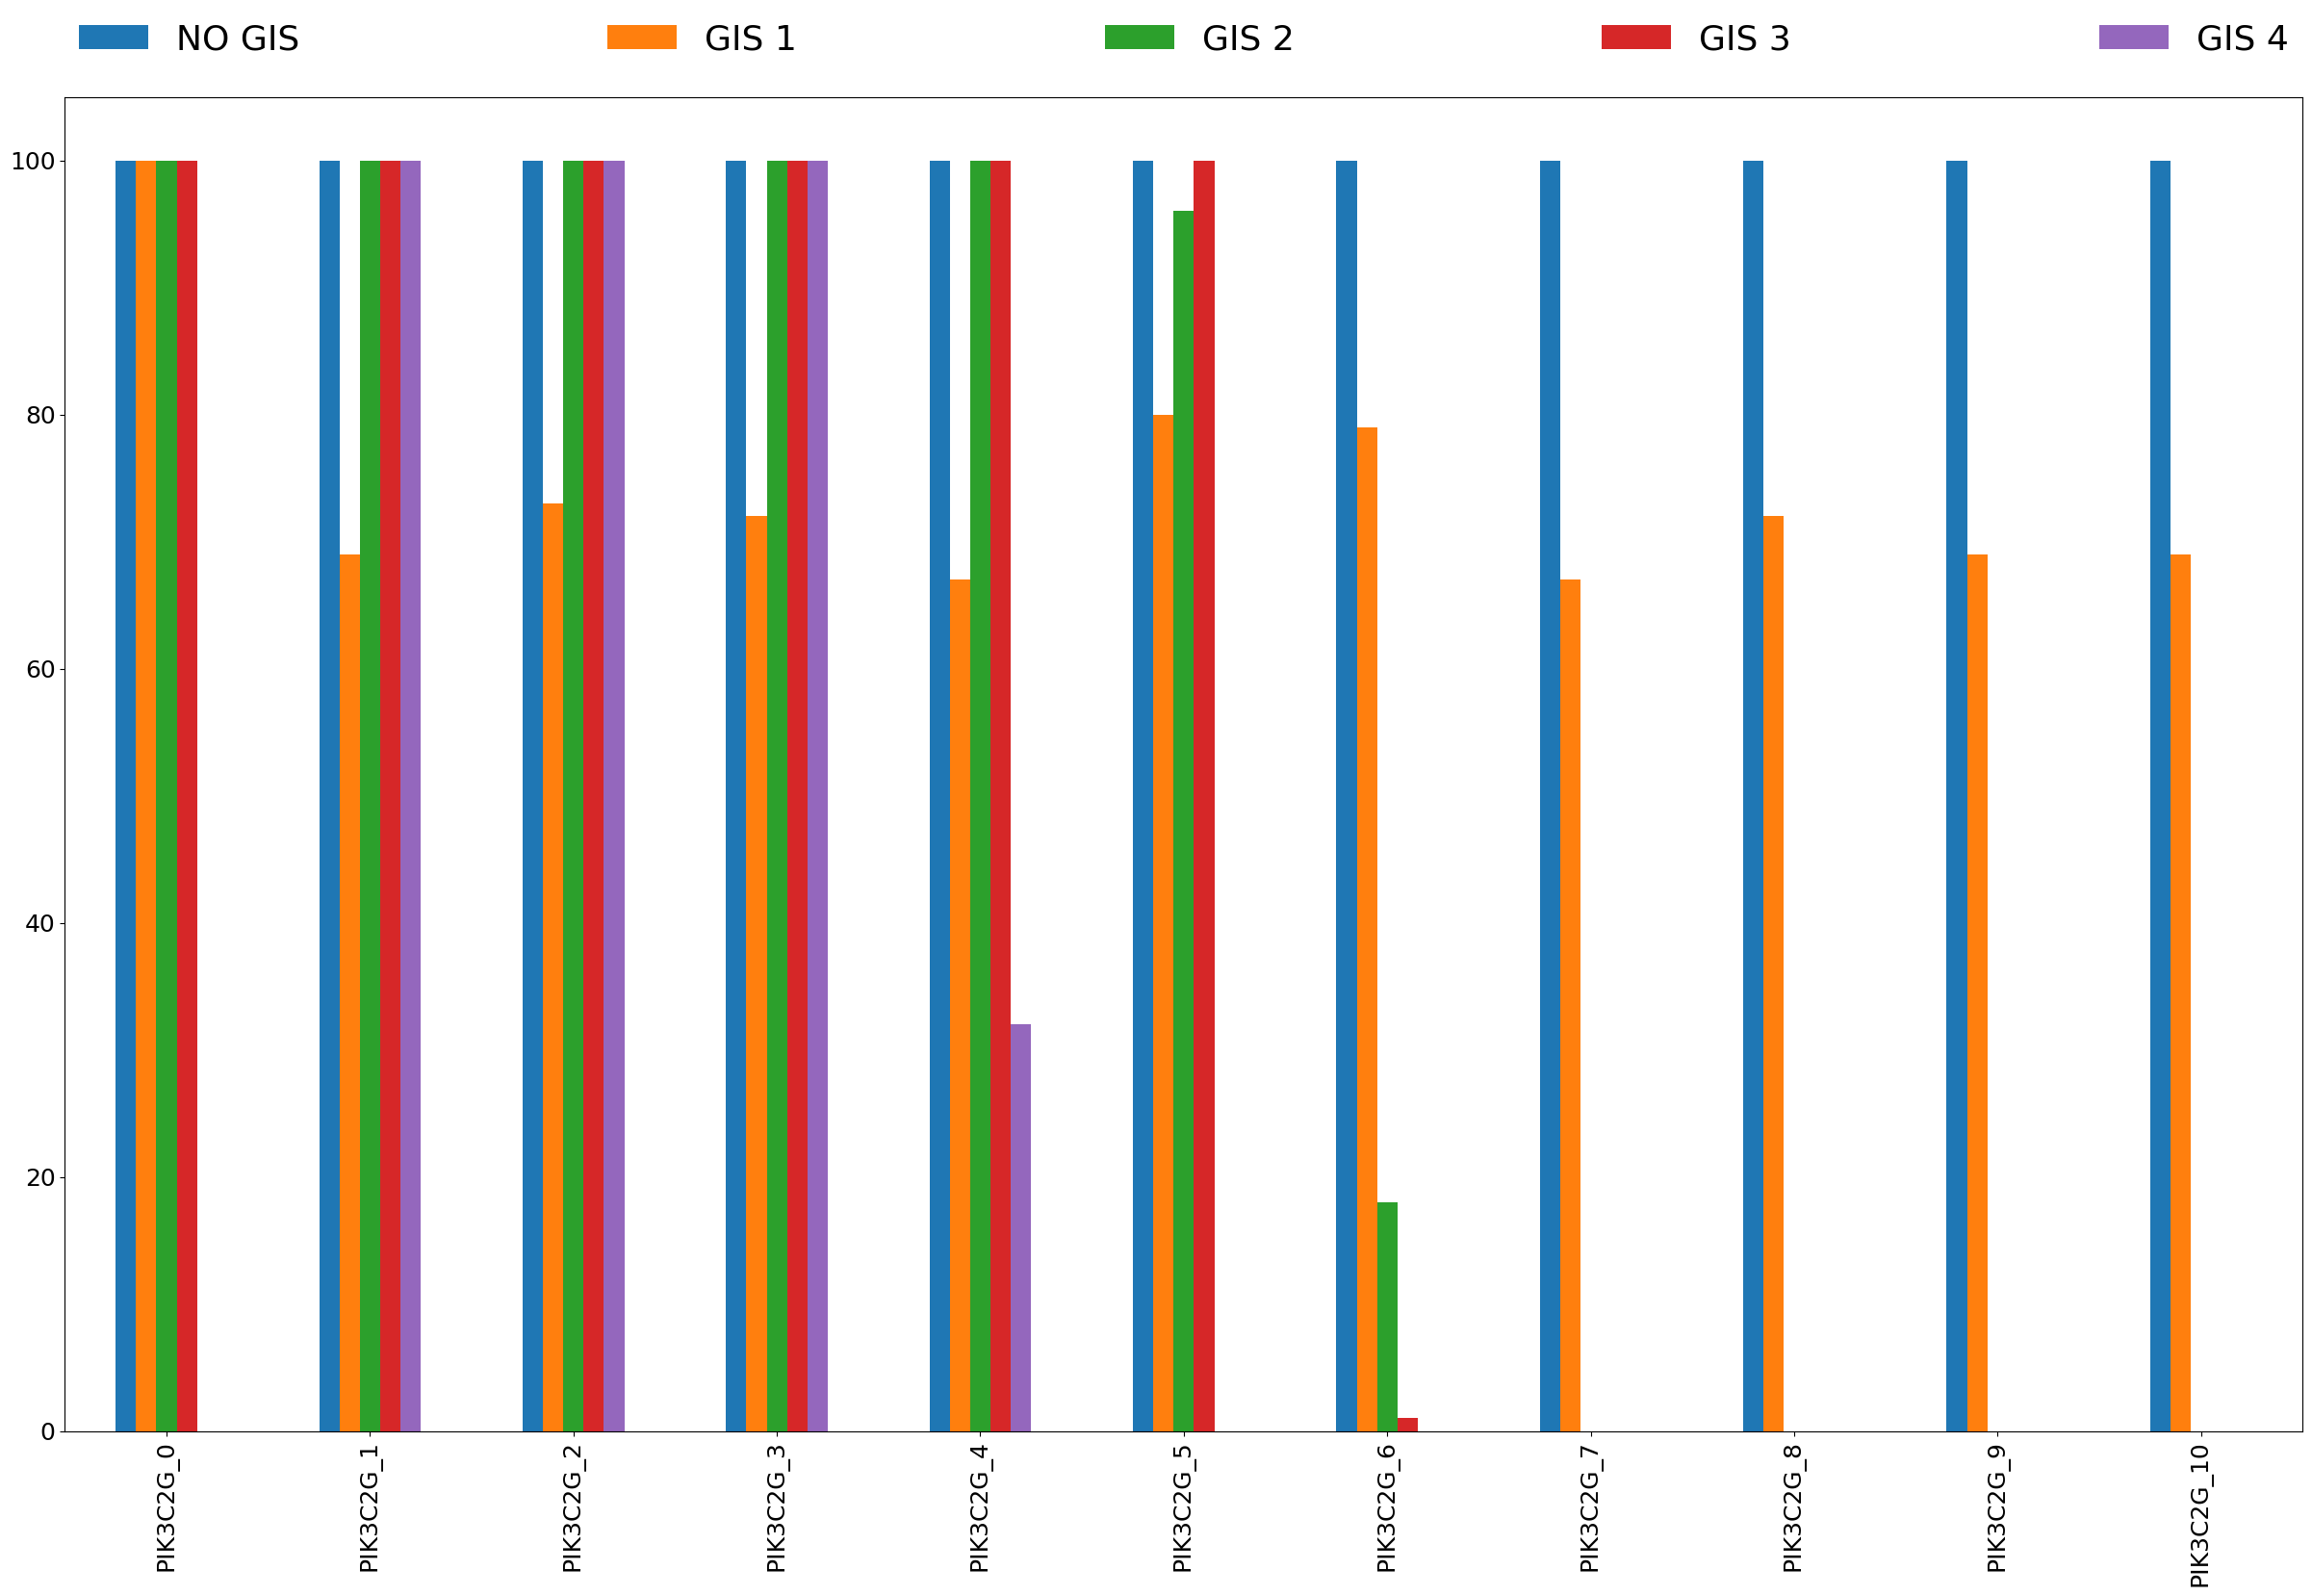

In [14]:
#genes = ['CDH19', 'HIVEP1', 'MT1F', 'PIK3C2G', 'TRMT10C']
genes =  [ 'METTL8', 'MT1F', 'NCKAP1', 'PCBP1', 'PIK3C2G']
for i, gene in enumerate(genes):

    sets = all_counts[i*5: (i*5)+5]
    names = [gene + '_' + str(x) for x in range(n_copies)]
    #lambdas = ['C = 5.0', 'C = 4.0', 'C = 2.0', 'C = 1.0'] 
    lambdas = ['λ = 0.2', 'λ = 0.25', 'λ = 0.5', 'λ = 1.0'] 
    exps = ['NO GIS', 'GIS 1', 'GIS 2', 'GIS 3', 'GIS 4']
    #set_names = [k + ', ' + j for k, j in zip(sorted(lambdas*4, reverse=True), exps*4)]


    for k, lam in enumerate(lambdas):
        dct_plot = {'Feature': names}
        print('----------------------', lam, '----------------------')
        for e, exp in enumerate(exps):

            dct_plot[exp] =  sets[e, :, k]

        df = pd.DataFrame(dct_plot)
        #print(df)
        plt_l = df.plot(x='Feature', y = exps, kind='bar', figsize=(30, 18))
        #plt_l.set_title(lam)
        #plt_l.text(3, , 'Student Marks', fontsize = 18, color = 'g') 
        plt_l.set_xlabel([]).set_visible(False)
        plt_l.tick_params(axis='both', which='major', labelsize=18)
        plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode="expand", borderaxespad=0, ncol=5, fontsize=26).get_frame().set_alpha(0)
        plt_l.figure.savefig(os.path.join(dire_results, 'plots/'+gene + '_'+ lam+ '.png'), bbox_inches='tight',pad_inches = 0)

# Case 2

In [15]:
files = ['rounds_mrf5.0.txt',
        'rounds_mrf4.0.txt', 
        'rounds_mrf2.0.txt',
        'rounds_mrf1.0.txt']

In [16]:
values = np.linspace(0.5, 1.0, 50)


<class 'numpy.int64'>
<class 'numpy.int64'>


100%|██████████| 5/5 [00:00<00:00, 138.81it/s]

Number of genes with no GO annotations:  0
['METTL8', 'PCBP1', 'NCKAP1', 'MT1F', 'PIK3C2G'] [0.8544733758634416, 0.8740662663576136, 0.8452480564943613, 0.8886291863585036, 0.8568378011179323]


<class 'numpy.int64'>
<class 'numpy.int64'>


100%|██████████| 5/5 [00:00<00:00, 245.84it/s]

Number of genes with no GO annotations:  0
['METTL8', 'PCBP1', 'NCKAP1', 'MT1F', 'PIK3C2G'] [0.8544733758634416, 0.8740662663576136, 0.8452480564943613, 0.8886291863585036, 0.8568378011179323]


<class 'numpy.int64'>
<class 'numpy.int64'>


100%|██████████| 5/5 [00:00<00:00, 267.35it/s]

Number of genes with no GO annotations:  0
['METTL8', 'PCBP1', 'NCKAP1', 'MT1F', 'PIK3C2G'] [0.8544733758634416, 0.8740662663576136, 0.8452480564943613, 0.8886291863585036, 0.8568378011179323]


<class 'numpy.int64'>
<class 'numpy.int64'>


100%|██████████| 5/5 [00:00<00:00, 145.19it/s]

Number of genes with no GO annotations:  0
['METTL8', 'PCBP1', 'NCKAP1', 'MT1F', 'PIK3C2G'] [0.8544733758634416, 0.8740662663576136, 0.8452480564943613, 0.8886291863585036, 0.8568378011179323]


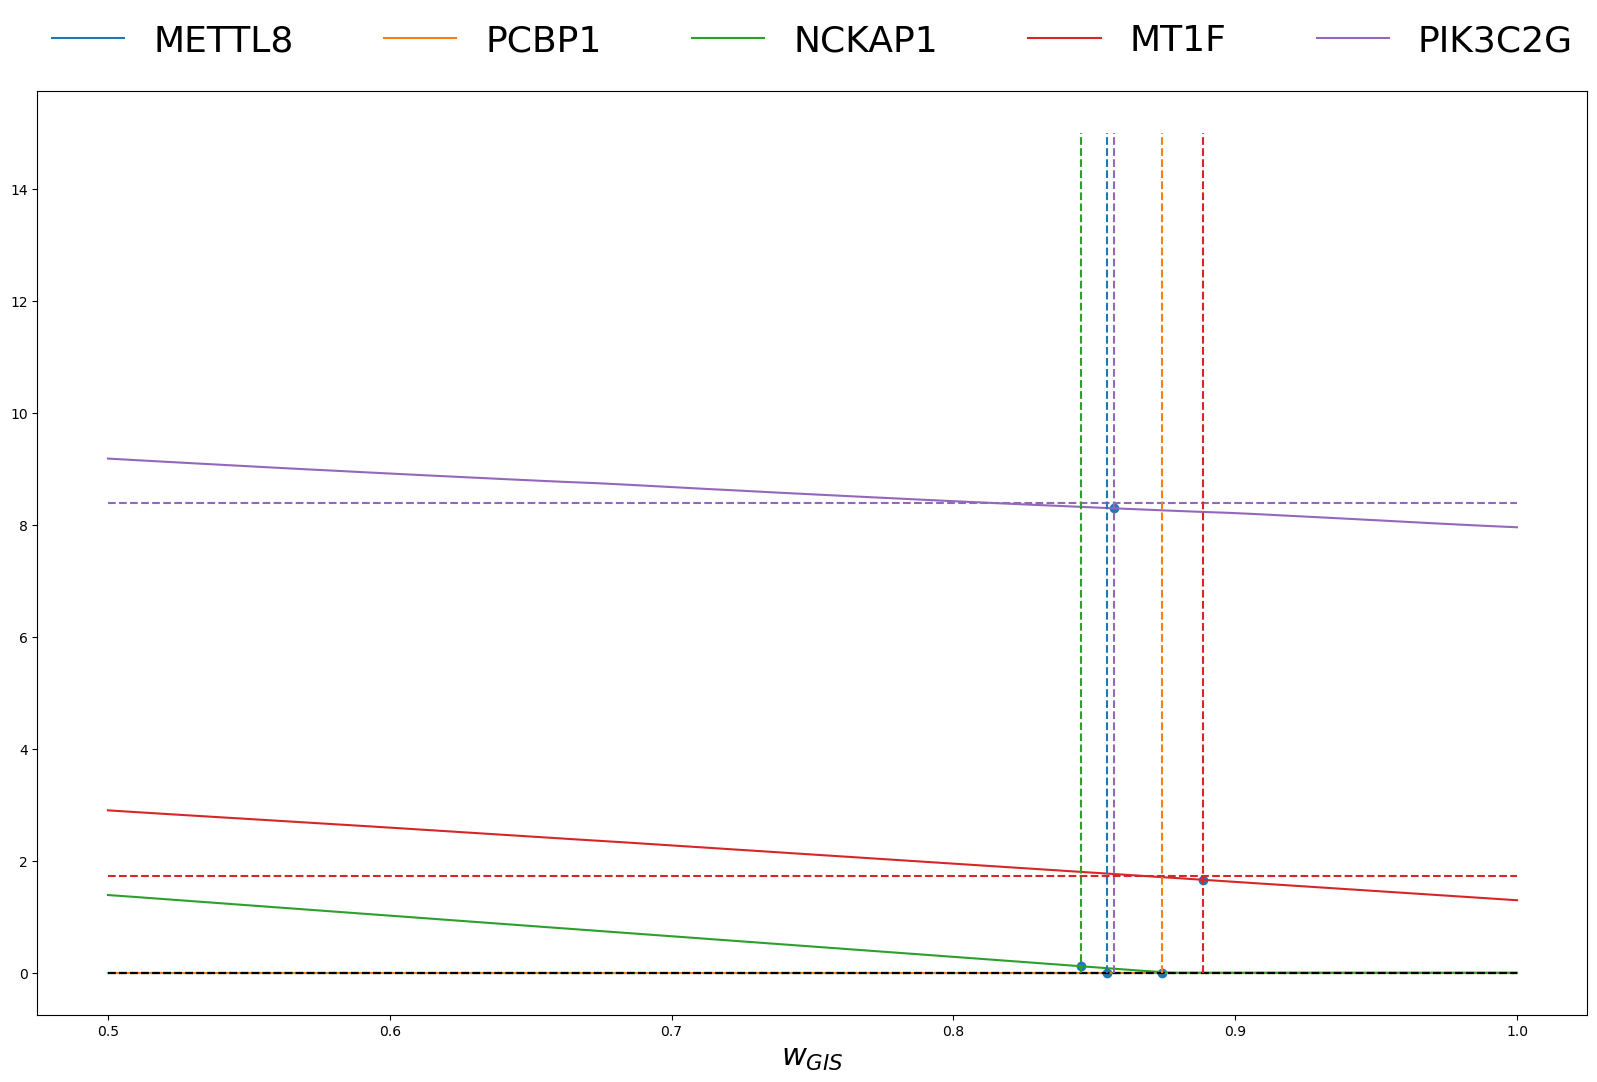

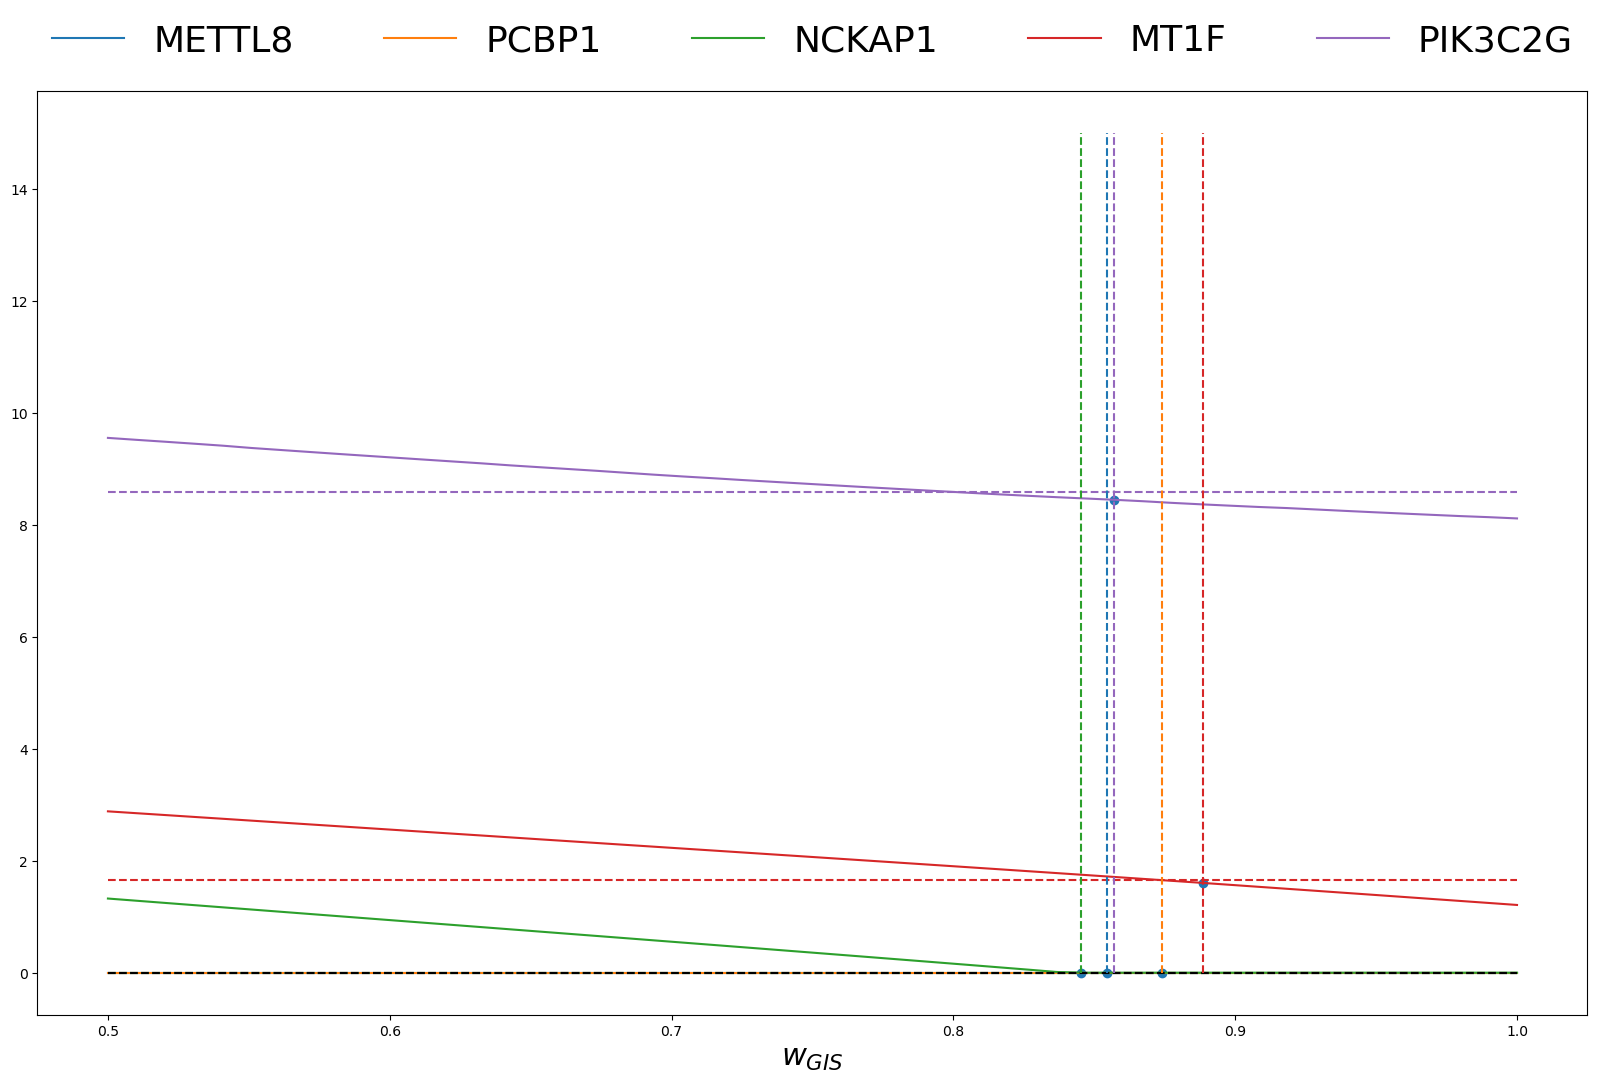

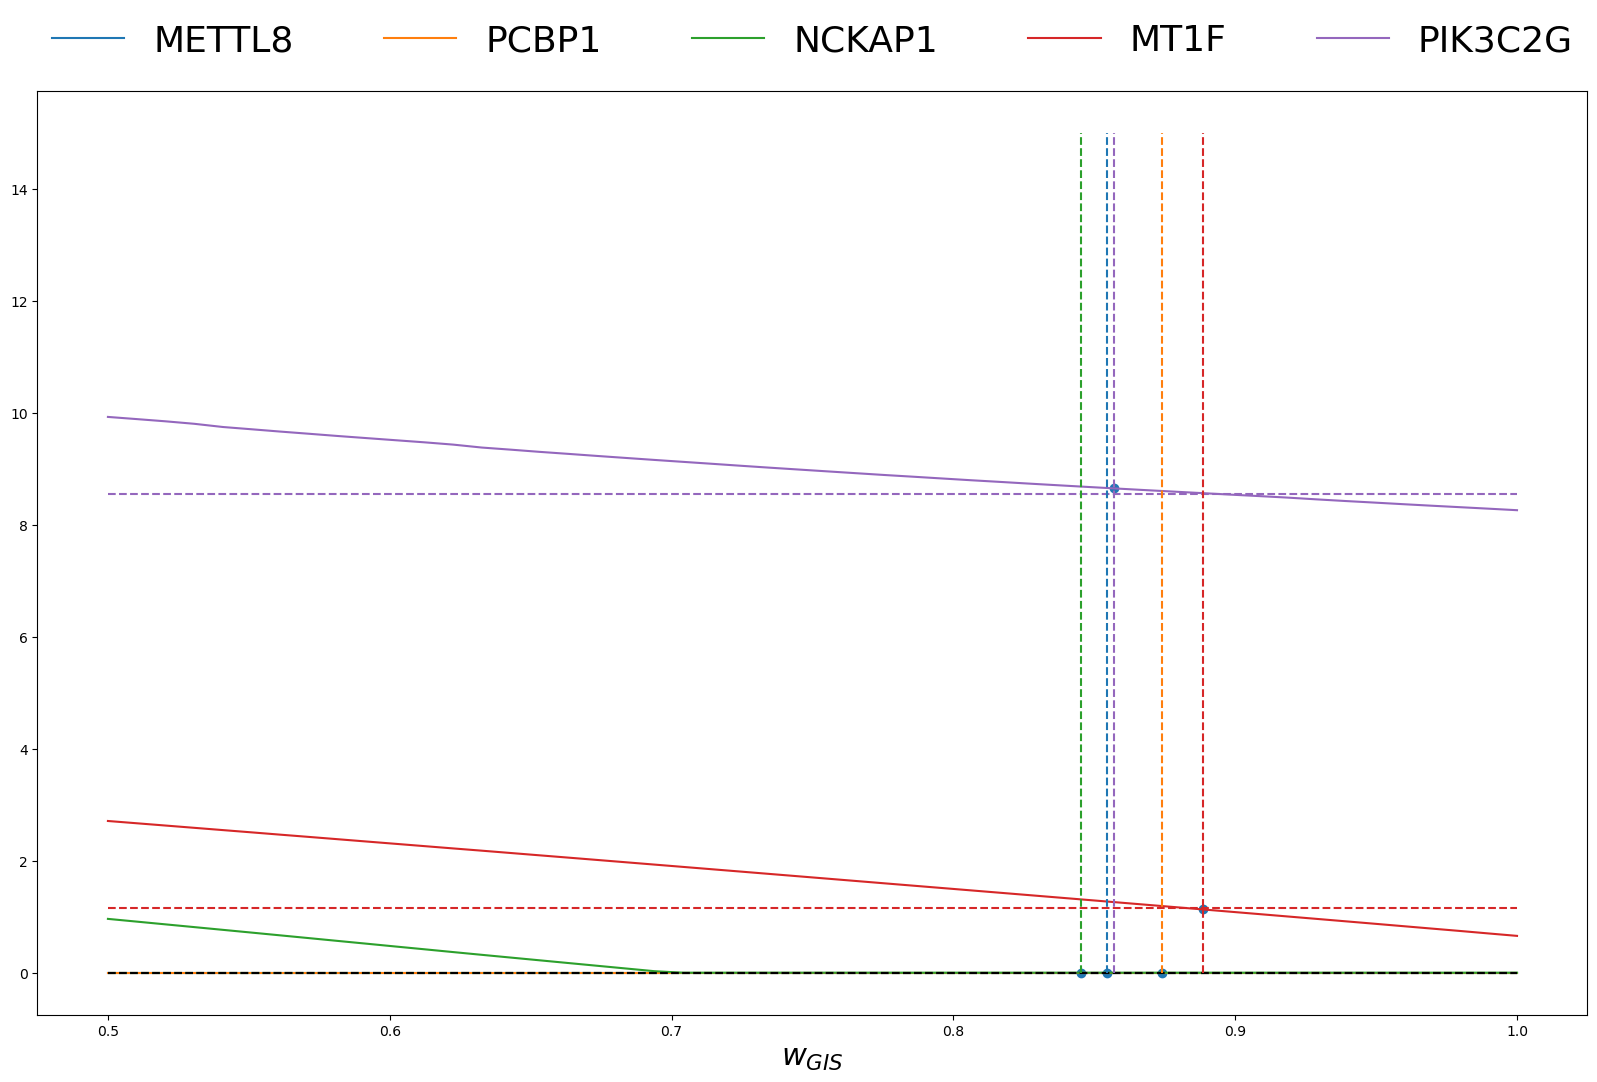

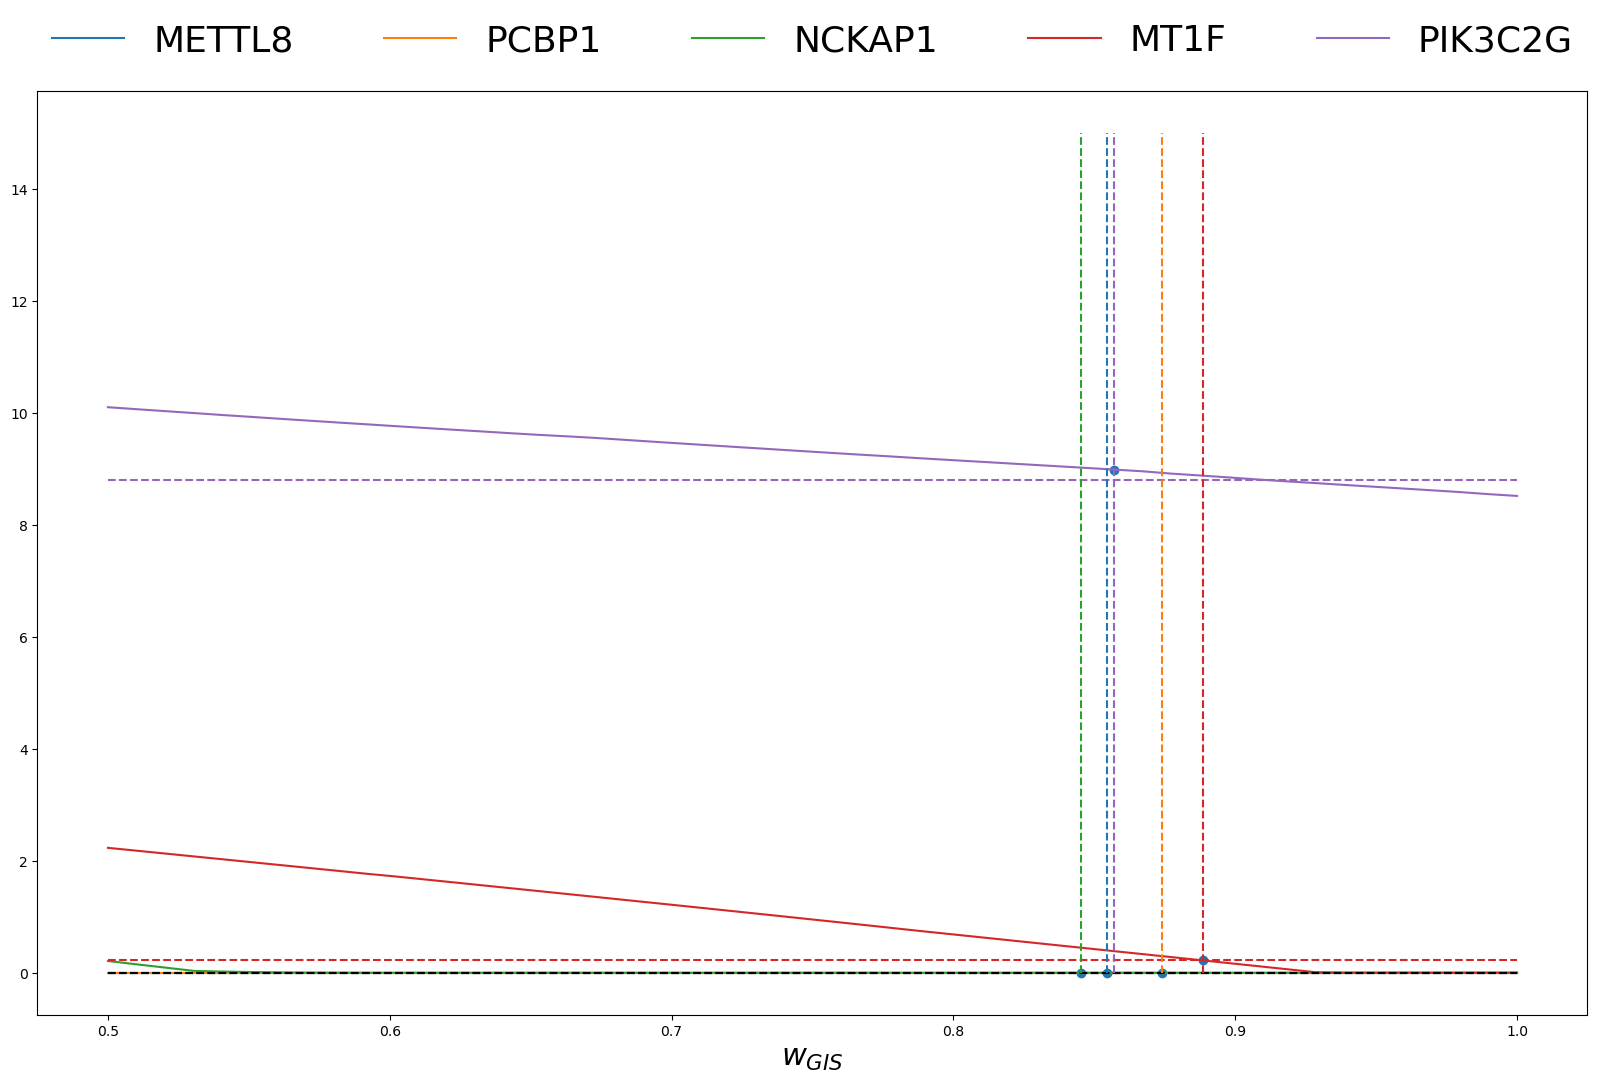

In [18]:
for f,file in enumerate(files):

    dct = load_dictionary(os.path.join(dire, file))
    features = list(dct.keys())
    dct_plot = {'GIS lasso': values}
    for feat in dct:
        dct_plot[feat] = abs(np.array(dct[feat][-50:]))
    #lambdas = ['C = 5.0', 'C = 4.0', 'C = 2.0', 'C = 1.0'] 
    lambdas = ['λ = 0.2', 'λ = 0.25', 'λ = 0.5', 'λ = 1.0'] 
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

    true_values = get_GIS_scores_lasso_func([], list(dct.keys()), k=1, v=1, go=True, reactome=False,
                                       hpo=False, notebook=True, dire_1=dire_1, dire_2=dire_2)
    print(list(dct.keys()), true_values)
    df = pd.DataFrame(dct_plot)
    ax = df.plot(x='GIS lasso', y = features, kind='line', figsize=(20, 12))
    ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode="expand", borderaxespad=0, ncol=5, fontsize=26).get_frame().set_alpha(0)
    ax.plot(values, [abs(dct[features[0]][0])] * 50, linestyle="--", label=features[0], color= colors[0])
    ax.plot(values, [abs(dct[features[1]][0])] * 50, linestyle="--", label=features[1], color= colors[1])
    ax.plot(values, [abs(dct[features[2]][0])] * 50, linestyle="--", label=features[2], color= colors[2])
    ax.plot(values, [abs(dct[features[3]][0])] * 50, linestyle="--", label=features[3], color= colors[3])
    ax.plot(values, [abs(dct[features[4]][0])] * 50, linestyle="--", label=features[3], color= colors[4])
    ax.plot(values, [0] * 50, linestyle="--", color= 'black')
    #ys = np.linspace(abs(dct[features[2]][0]) -1.0, abs(dct[features[0]][0]) + 1.0, 5)
    ys = np.linspace(0, 14 + 1.0, 5)
    ax.plot([true_values[0]]*5, ys, linestyle="--", label=features[0], color= colors[0])
    ax.plot([true_values[1]]*5, ys, linestyle="--", label=features[1], color= colors[1])
    ax.plot([true_values[2]]*5, ys, linestyle="--", label=features[2], color= colors[2])
    ax.plot([true_values[3]]*5, ys, linestyle="--", label=features[3], color= colors[3])
    ax.plot([true_values[4]]*5, ys, linestyle="--", label=features[4], color= colors[4])
    ys = [abs(dct[features[0]][1]), abs(dct[features[1]][1]), abs(dct[features[2]][1]), abs(dct[features[3]][1]), abs(dct[features[4]][1])]
    ax.scatter(true_values, ys)
    #ax.set_title(lambdas[f])
    ax.set_xlabel('$w_{GIS}$', fontdict={'family': "Serif", 'size':22})
    plt_l.tick_params(axis='both', which='major', labelsize=20)
    
    #plt_l.text(3, , 'Student Marks', fontsize = 18, color = 'g') 
    ax.figure.savefig(os.path.join(dire_results, 'plots/'+ 'pp_'+ lambdas[f]+ '.png'), bbox_inches='tight',pad_inches = 0)